In [2]:
library(xts)
library(highfrequency)
library(zoo)
library(rugarch)
library(forecast)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'highfrequency' was built under R version 4.3.3"
Warning message:
"package 'rugarch' was built under R version 4.3.3"
Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Warning message:
"package 'forecast' was built under R version 4.3.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
data <- load("2.RData")

# PART 1

In [4]:
summary(aaba)
head(aaba)
tail(aaba)

     Index                 ret                   RV          
 Min.   :2010-01-05   Min.   :-0.1456009   Min.   :0.006004  
 1st Qu.:2011-07-04   1st Qu.:-0.0102603   1st Qu.:0.011095  
 Median :2013-01-10   Median : 0.0000000   Median :0.013482  
 Mean   :2013-01-08   Mean   : 0.0003804   Mean   :0.015105  
 3rd Qu.:2014-07-14   3rd Qu.: 0.0109030   3rd Qu.:0.017246  
 Max.   :2016-01-22   Max.   : 0.1408073   Max.   :0.064166  
      RV_p               RV_n                RS                 RK        
 Min.   :0.003792   Min.   :0.003450   Min.   :-7.11046   Min.   : 2.131  
 1st Qu.:0.007637   1st Qu.:0.007560   1st Qu.:-0.58050   1st Qu.: 3.749  
 Median :0.009484   Median :0.009435   Median : 0.02804   Median : 4.872  
 Mean   :0.010604   Mean   :0.010522   Mean   : 0.05455   Mean   : 6.327  
 3rd Qu.:0.012354   3rd Qu.:0.012188   3rd Qu.: 0.66002   3rd Qu.: 7.027  
 Max.   :0.058040   Max.   :0.053660   Max.   : 6.07520   Max.   :59.116  

                    ret         RV        RV_p        RV_n          RS
2010-01-05  0.015812921 0.01300468 0.008650219 0.009710589 -0.71344554
2010-01-06 -0.005827522 0.01127652 0.007593807 0.008336312 -0.12428705
2010-01-07 -0.017689140 0.01359373 0.008427547 0.010666117 -1.13501968
2010-01-08 -0.006565228 0.01184399 0.009301831 0.007331852  1.29791010
2010-01-11  0.004182856 0.01570602 0.008794856 0.013012671 -2.42049970
2010-01-12 -0.005980879 0.01490788 0.010413341 0.010668040  0.02802119
                  RK
2010-01-05 14.170914
2010-01-06  2.848451
2010-01-07  8.112962
2010-01-08  9.459843
2010-01-11 14.951509
2010-01-12  2.650517

                    ret         RV       RV_p       RV_n         RS        RK
2016-01-14 -0.038625036 0.03254541 0.02515310 0.02065249  0.5873096  3.974951
2016-01-15 -0.014579000 0.02998108 0.02387234 0.01813772  1.4368795  7.835860
2016-01-19  0.019280151 0.02722255 0.01720726 0.02109449 -1.1457304  7.803336
2016-01-20 -0.029233897 0.03754555 0.02481343 0.02817733 -0.6167864  4.309256
2016-01-21 -0.008313176 0.02866310 0.02119128 0.01930033  0.2018993  3.055611
2016-01-22  0.041559114 0.02964534 0.02041901 0.02149209 -0.3155532 11.556668

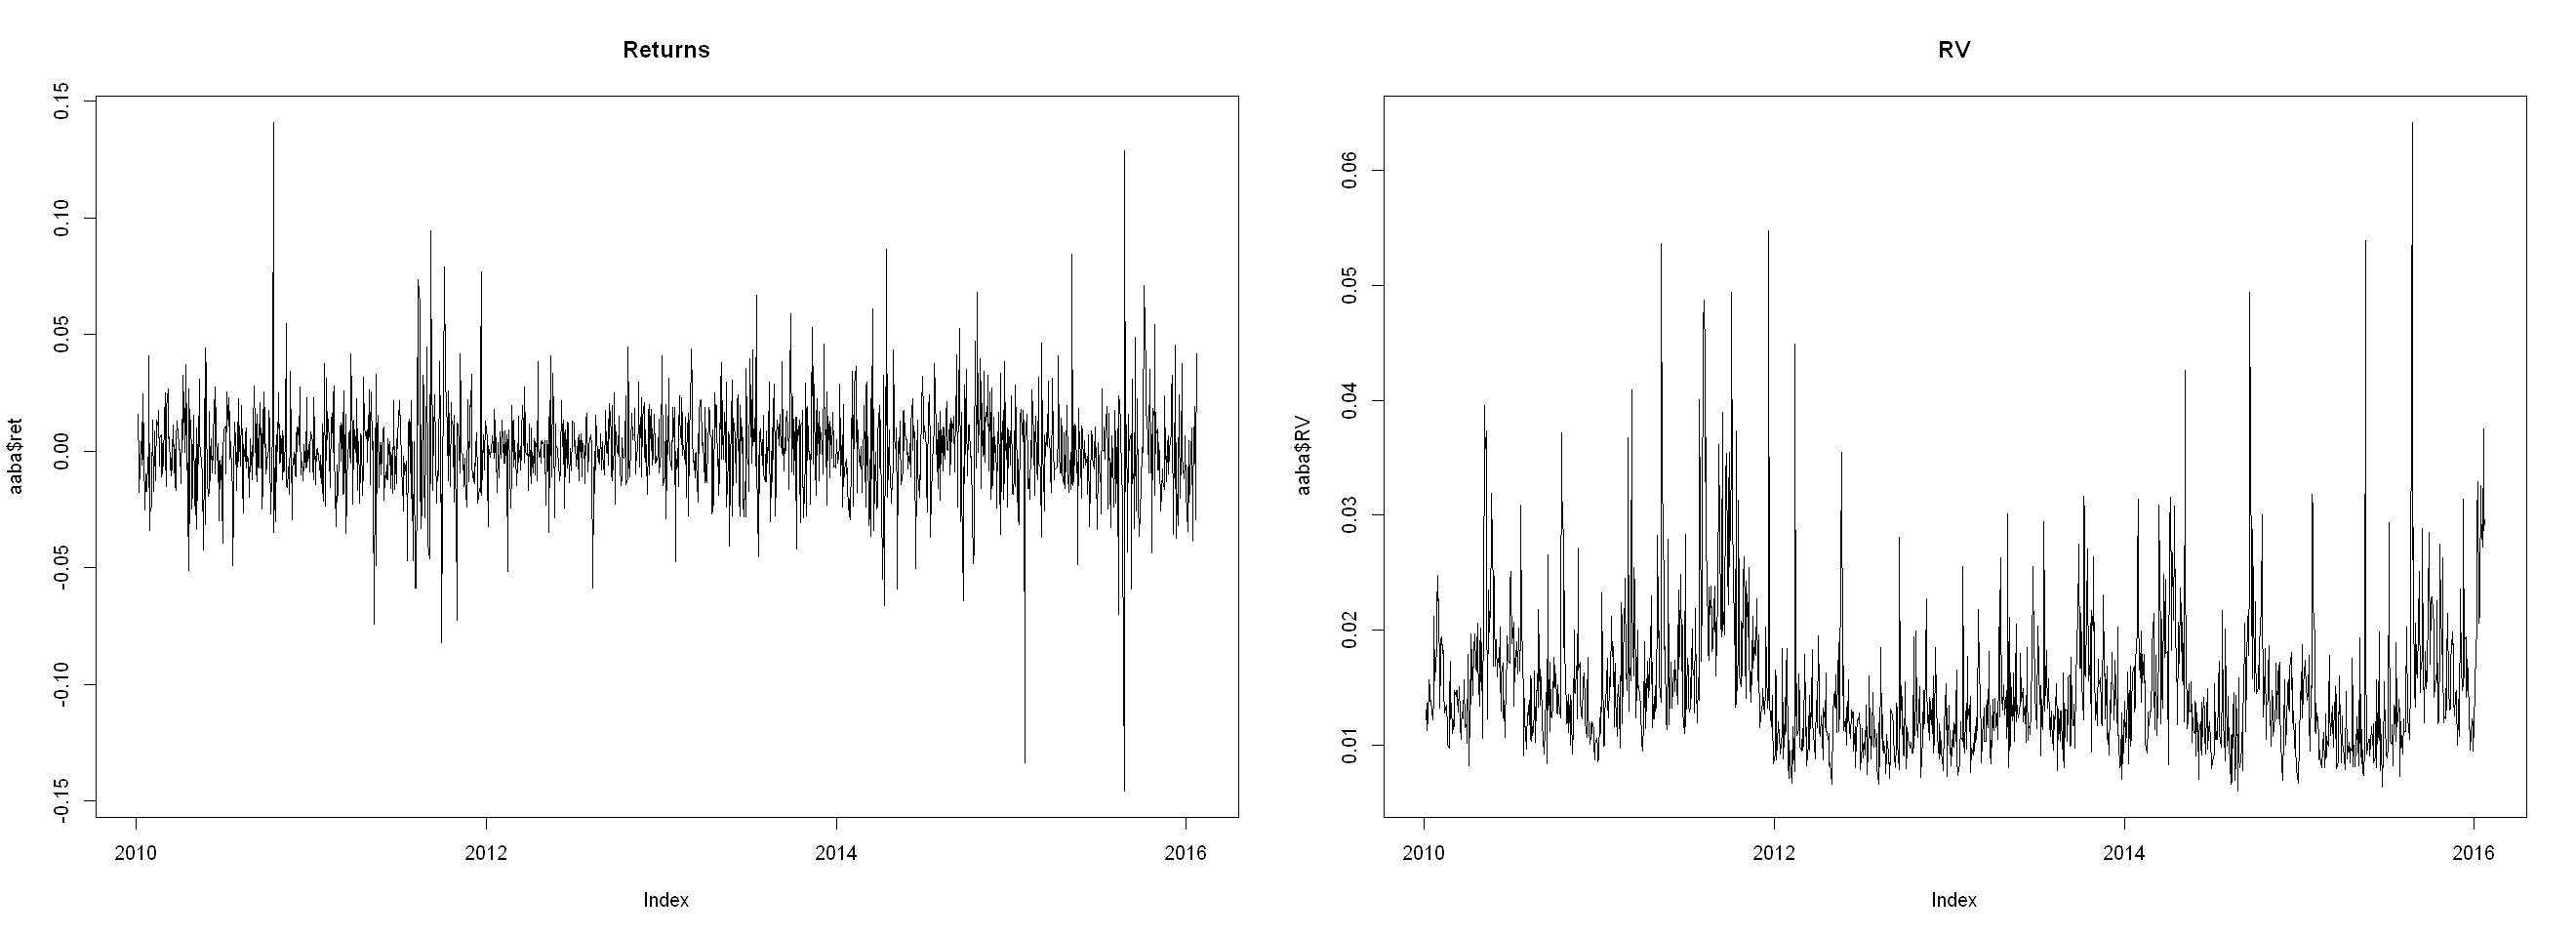

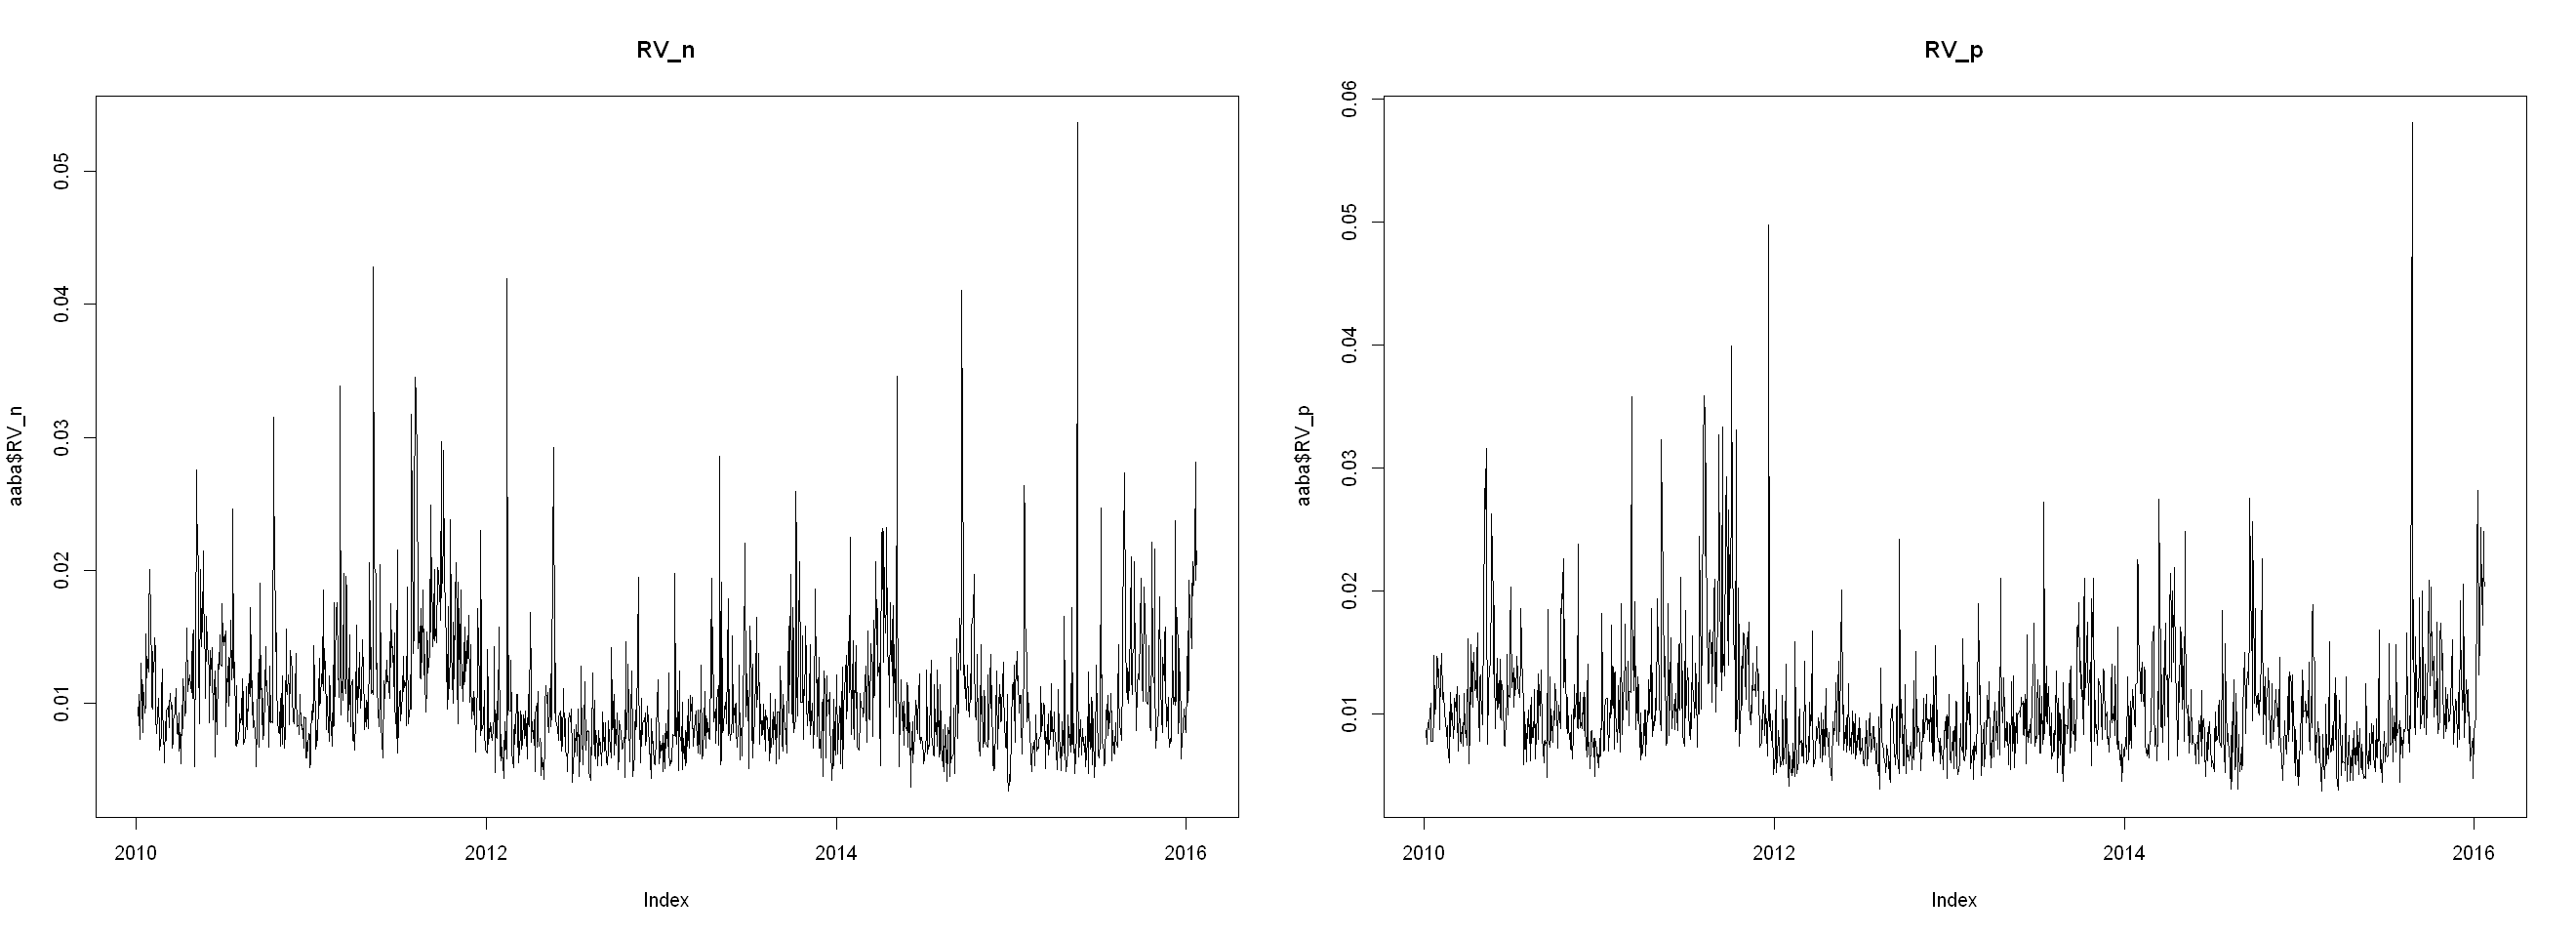

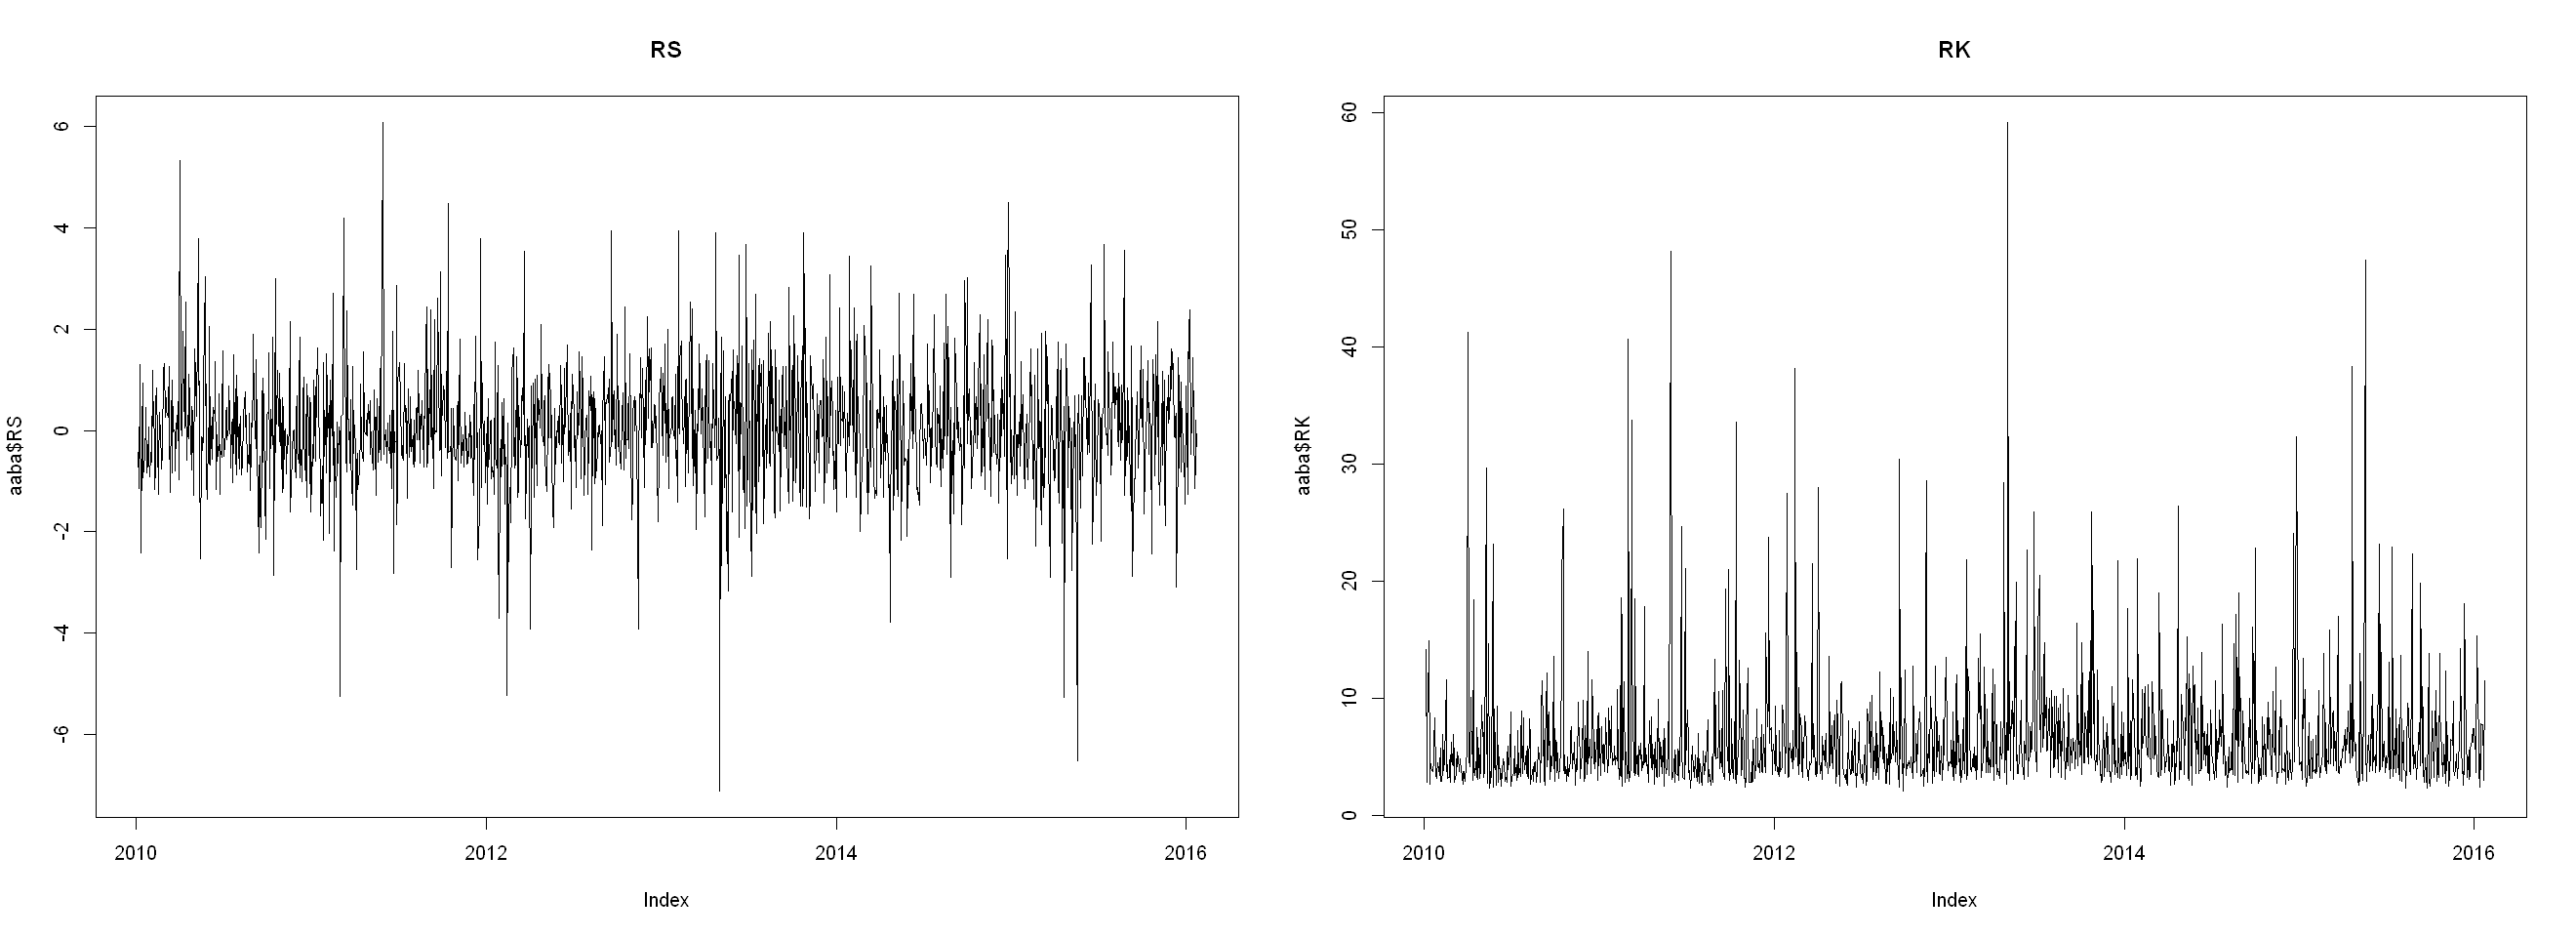

In [5]:
options(repr.plot.width = 22, repr.plot.height = 8)
par(mfrow = c(1, 2))

plot.zoo(aaba$ret,main = "Returns")
plot.zoo(aaba$RV, main = "RV")
plot.zoo(aaba$RV_n, main = "RV_n")
plot.zoo(aaba$RV_p, main = "RV_p")
plot.zoo(aaba$RS, main = "RS")
plot.zoo(aaba$RK, main = "RK")

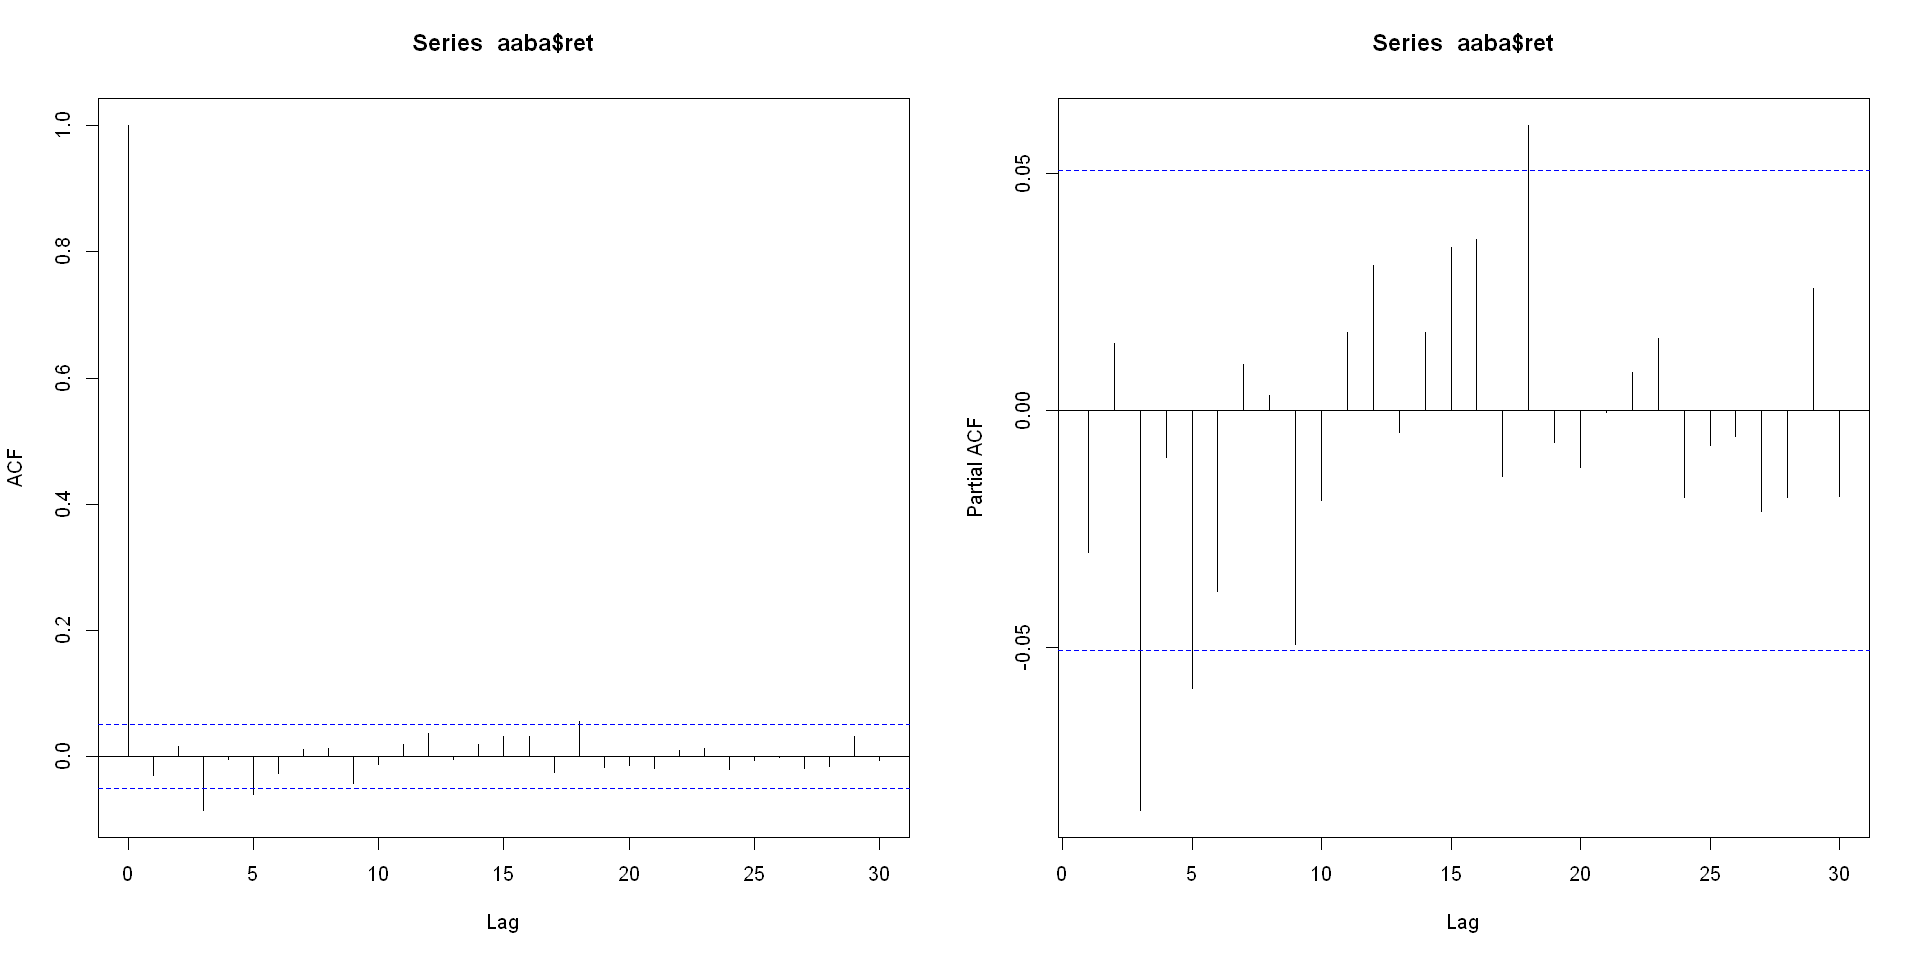

In [6]:
options(repr.plot.width = 16, repr.plot.height = 8)
par(mfrow = c(1, 2))

acf(aaba$ret, lag = 30)
pacf(aaba$ret, lag = 30)

# PART 2

## AR(1)-RV

In [7]:
AR_RV <- Arima(aaba$RV, order = c(1, 0, 0))
summary(AR_RV)

Series: aaba$RV 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.5305  0.0151
s.e.  0.0219  0.0003

sigma^2 = 2.856e-05:  log likelihood = 5720.11
AIC=-11434.22   AICc=-11434.2   BIC=-11418.28

Training set error measures:
                       ME        RMSE         MAE       MPE     MAPE      MASE
Training set 4.738511e-06 0.005340401 0.003540377 -9.001822 23.78579 0.8995801
                    ACF1
Training set -0.09672341

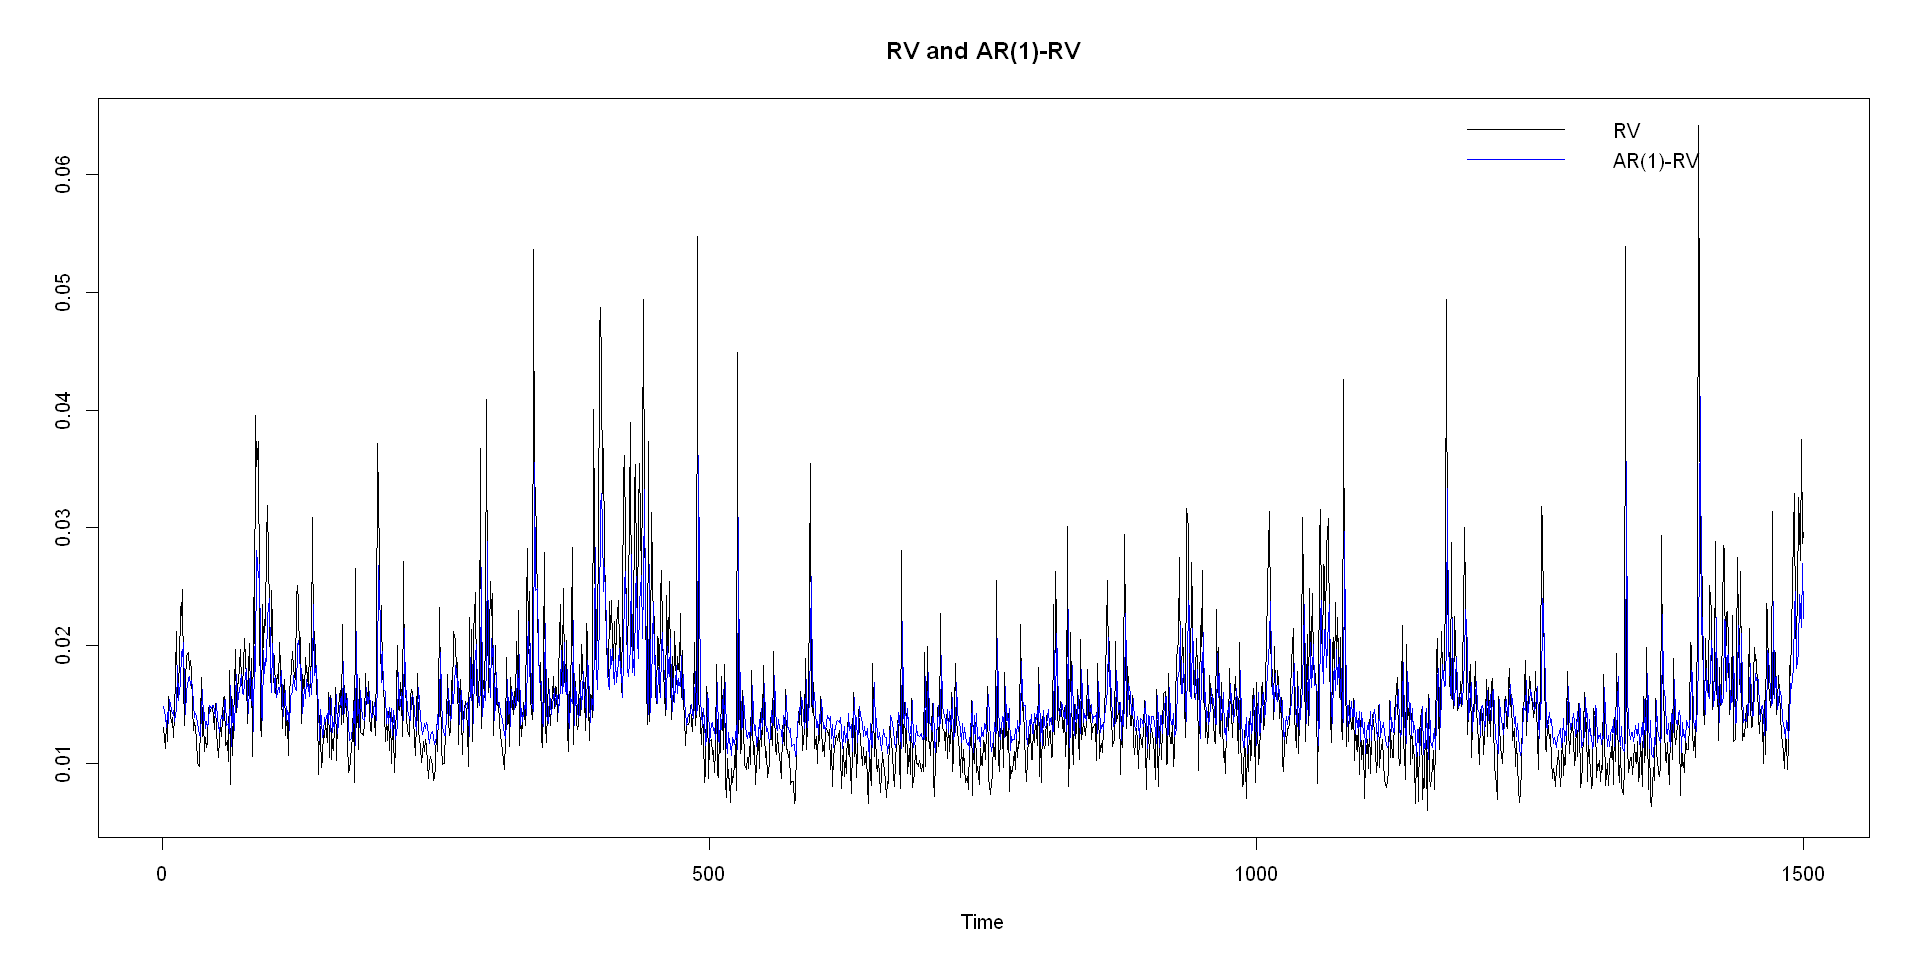

In [8]:
plot.ts((aaba$RV), ylab = NA, main = "RV and AR(1)-RV")
lines(fitted(AR_RV), col = "blue")
legend("topright", legend = c("RV", "AR(1)-RV"),
       col = c("black", "blue"), lwd = 1, bty = "n")

## HAR

In [9]:
L <- nrow(aaba)

In [10]:
RV5 <- unlist(lapply(lapply(1:(L - 4), function (t) {return(aaba$RV[t:(t + 4)])}), mean))
RV22 <- unlist(lapply(lapply(1:(L - 21), function (t) {return(aaba$RV[t:(t + 21)])}), mean))

In [11]:
HAR<- HARmodel(data = aaba$RV , periods = c(1,5,22), RVest = c("rCov"),
                type = "HAR", h = 1, transform = "sqrt", inputType = "RM")
summary(HAR)


Call:
"sqrt(RV1) = beta0  +  beta1 * sqrt(RV1) +  beta2 * sqrt(RV5) +  beta3 * sqrt(RV22)"

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049625 -0.011312 -0.003057  0.007587  0.130609 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
beta0 0.019093   0.004011   4.760 2.12e-06 ***
beta1 0.318196   0.040486   7.859 7.39e-15 ***
beta2 0.272548   0.053382   5.106 3.73e-07 ***
beta3 0.247189   0.053711   4.602 4.54e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01817 on 1474 degrees of freedom
Multiple R-squared:  0.3715,	Adjusted R-squared:  0.3703 
F-statistic: 290.5 on 3 and 1474 DF,  p-value: < 2.2e-16


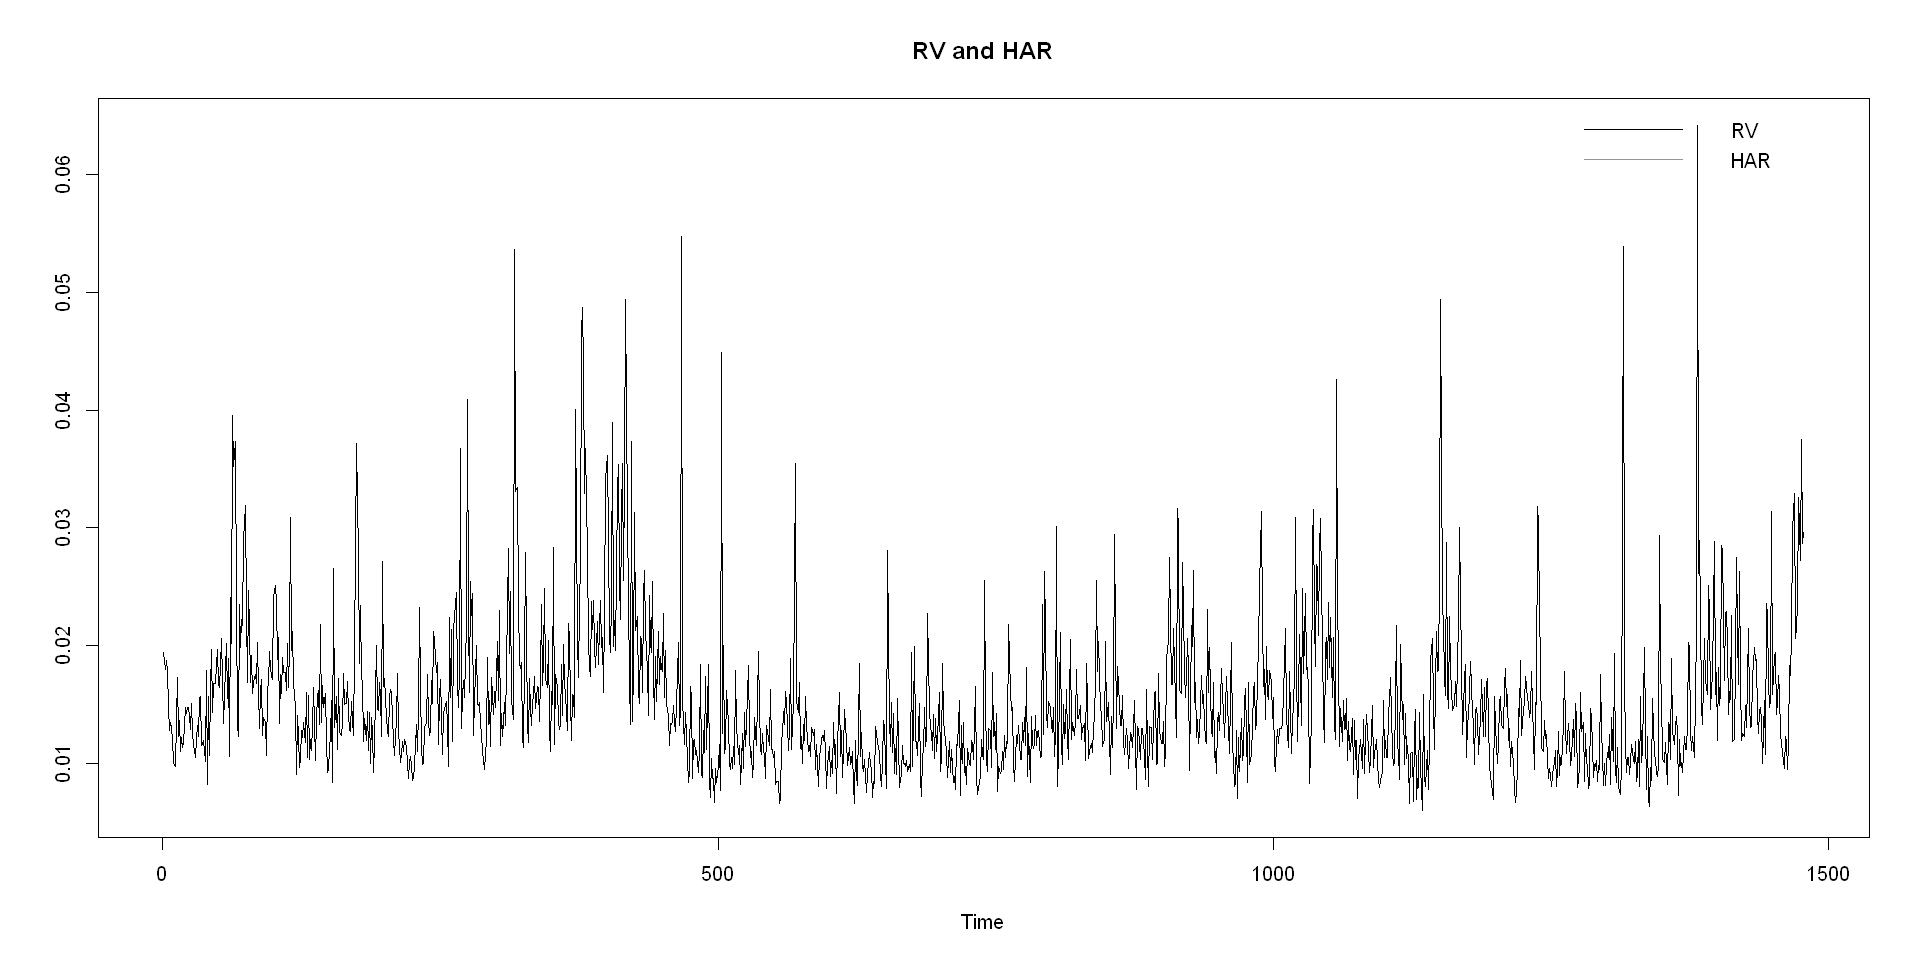

In [12]:
plot.ts((aaba$RV[23:L]), ylab = NA,  main = "RV and HAR")
lines(as.numeric(HAR$fitted.values), col = "green", lwd = 1)
legend("topright", legend = c("RV", "HAR"),
       col = c("black", "green"), lwd = 1, bty = "n")

## HAR-RS

In [13]:
HAR_RS<-lm(aaba$RV[23:L] ~ aaba$RV_n[22:(L - 1)] + aaba$RV_p[22:(L - 1)] + RV5[18:(length(RV5) - 1)] + RV22[1:(length(RV22)- 1)])
summary(HAR_RS)


Call:
lm(formula = aaba$RV[23:L] ~ aaba$RV_n[22:(L - 1)] + aaba$RV_p[22:(L - 
    1)] + RV5[18:(length(RV5) - 1)] + RV22[1:(length(RV22) - 
    1)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.013968 -0.002847 -0.000994  0.001604  0.047554 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0024929  0.0005733   4.349 1.46e-05 ***
aaba$RV_n[22:(L - 1)]      0.2681985  0.0410823   6.528 9.13e-11 ***
aaba$RV_p[22:(L - 1)]      0.2091205  0.0423002   4.944 8.54e-07 ***
RV5[18:(length(RV5) - 1)]  0.2579527  0.0534378   4.827 1.53e-06 ***
RV22[1:(length(RV22) - 1)] 0.2448454  0.0559565   4.376 1.30e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005144 on 1473 degrees of freedom
Multiple R-squared:  0.3407,	Adjusted R-squared:  0.339 
F-statistic: 190.3 on 4 and 1473 DF,  p-value: < 2.2e-16


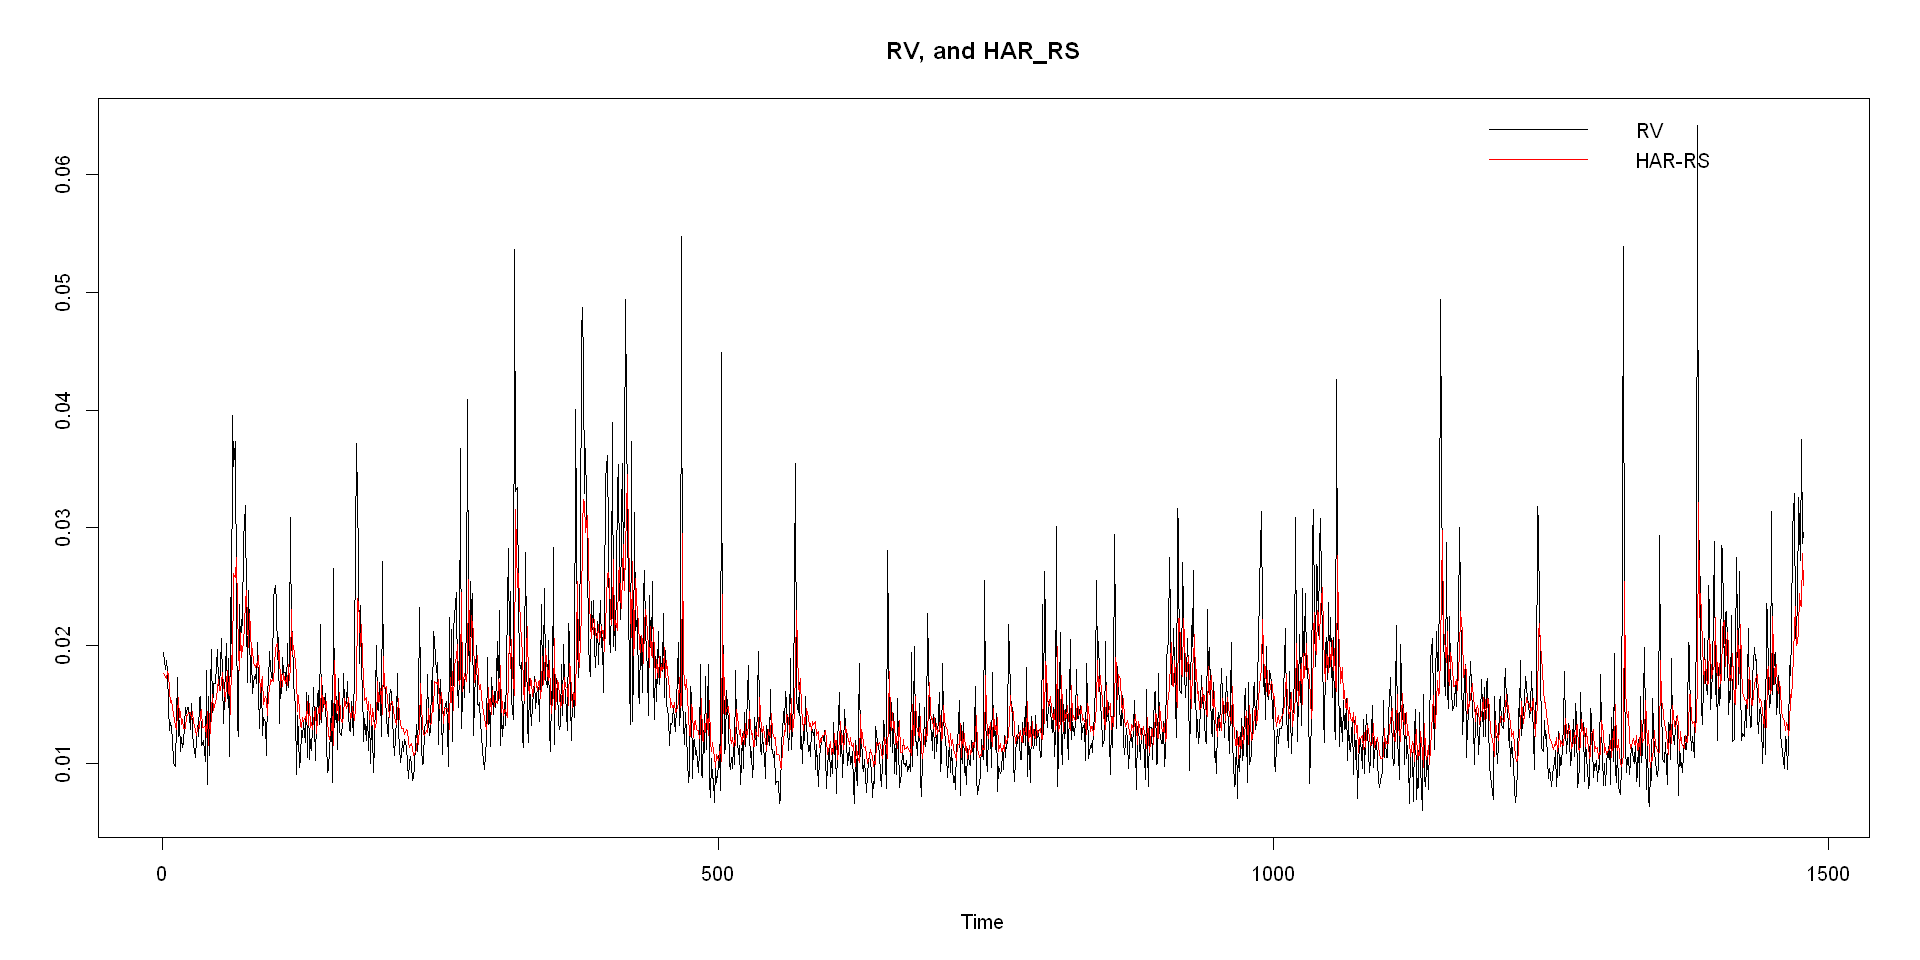

In [14]:
plot.ts((aaba$RV[23:L]), ylab = NA,  main = "RV, and HAR_RS")
lines(as.numeric(HAR_RS$fitted.values), col = "red")
legend("topright", legend = c("RV", "HAR-RS"),
       col = c("black", "red"), lwd = 1, bty = "n")

## HAR-Rskew-RKurt

In [15]:
HAR_Rskew_Rkurt<-lm(aaba$RV[23:L] ~ aaba$RV[22:(L - 1)] + RV5[18:(length(RV5) - 1)] + RV22[1:(length(RV22)- 1)] 
                    + aaba$RS[22:(L - 1)] + aaba$RK[22:(L - 1)])
summary(HAR_Rskew_Rkurt)


Call:
lm(formula = aaba$RV[23:L] ~ aaba$RV[22:(L - 1)] + RV5[18:(length(RV5) - 
    1)] + RV22[1:(length(RV22) - 1)] + aaba$RS[22:(L - 1)] + 
    aaba$RK[22:(L - 1)])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.014057 -0.002859 -0.001008  0.001531  0.046742 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 3.556e-03  5.926e-04   6.001 2.47e-09 ***
aaba$RV[22:(L - 1)]         3.865e-01  3.232e-02  11.957  < 2e-16 ***
RV5[18:(length(RV5) - 1)]   2.308e-01  5.300e-02   4.354 1.43e-05 ***
RV22[1:(length(RV22) - 1)]  2.245e-01  5.556e-02   4.041 5.60e-05 ***
aaba$RS[22:(L - 1)]        -7.605e-05  1.149e-04  -0.662    0.508    
aaba$RK[22:(L - 1)]        -1.803e-04  2.954e-05  -6.104 1.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005095 on 1472 degrees of freedom
Multiple R-squared:  0.3537,	Adjusted R-squared:  0.3515 
F-statistic: 161.1 on 5 an

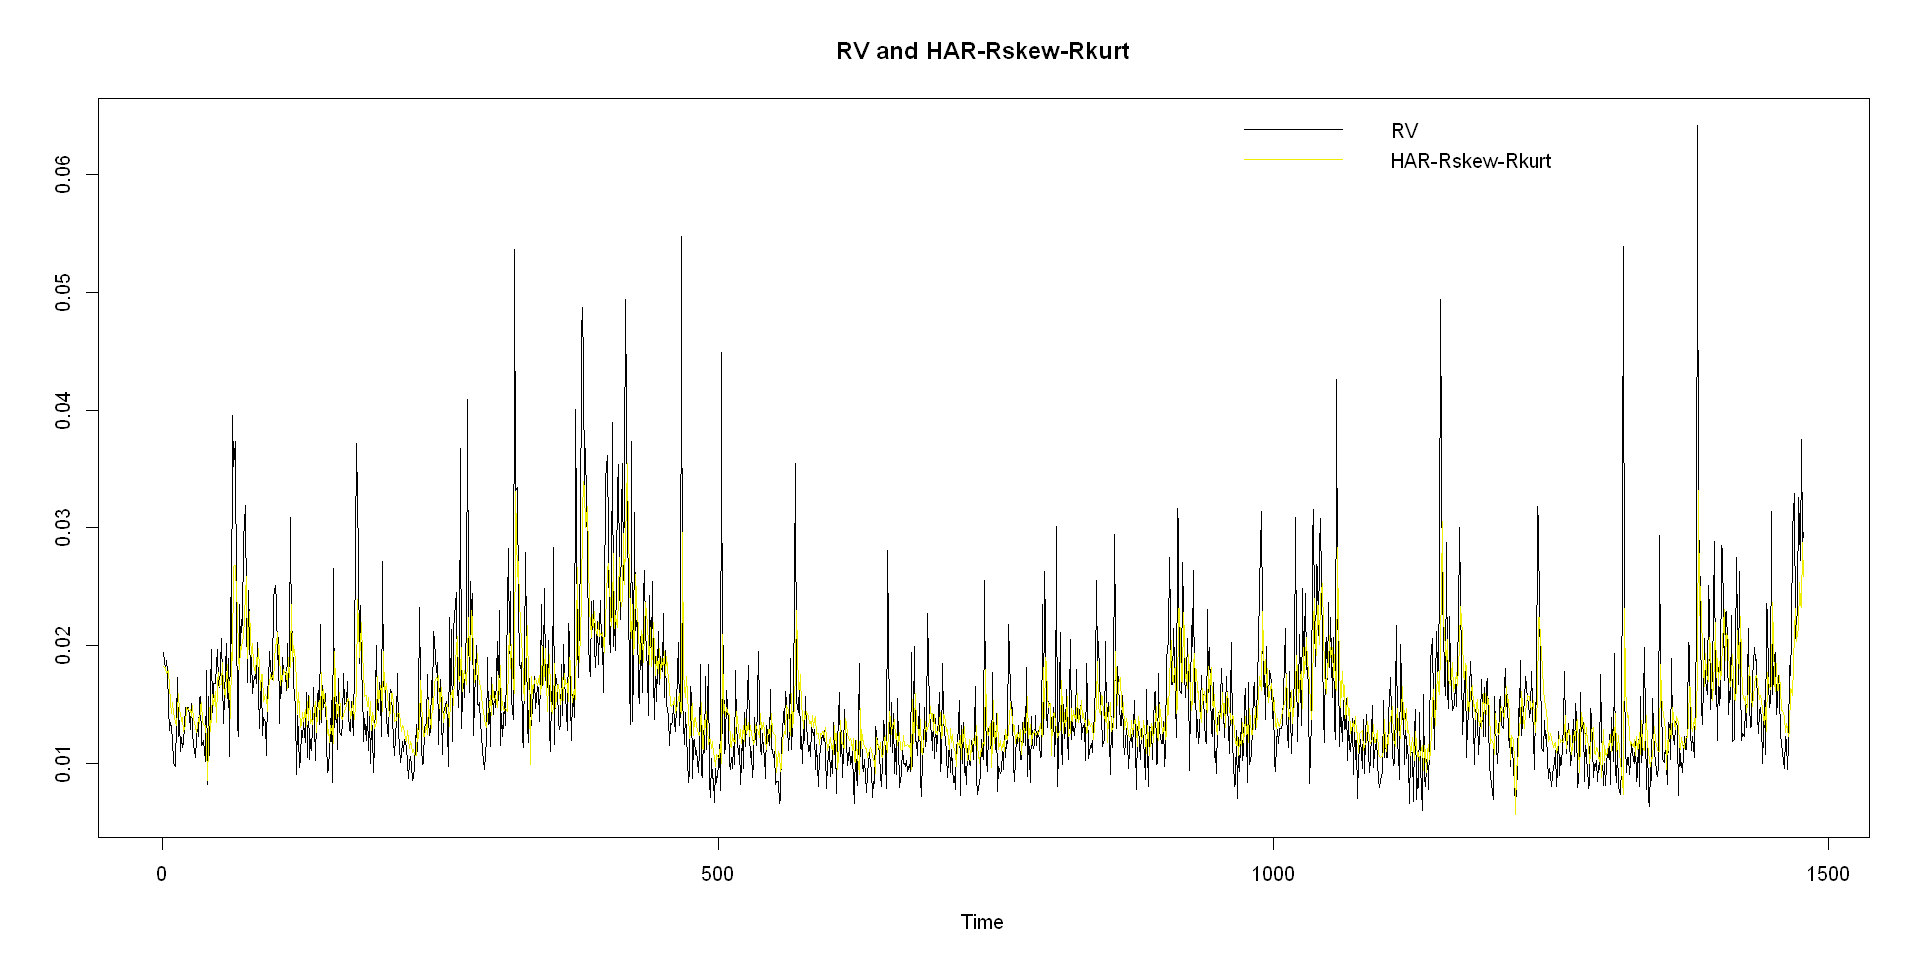

In [16]:
plot.ts((aaba$RV[23:L]), ylab = NA,  main = "RV and HAR-Rskew-Rkurt")
lines(as.numeric(HAR_Rskew_Rkurt$fitted.values), col = "yellow2")
legend("topright", legend = c("RV",  "HAR-Rskew-Rkurt"),
       col = c("black","yellow2"), lwd = 1, bty = "n")


## Realized GARCH

In [17]:
realized_GARCH_spec <- ugarchspec(mean.model = list(armaOrder=c(0, 0), include.mean= TRUE), variance.model = list(model = 'realGARCH', garchOrder = c(1, 1)))

realized_GARCH_fit <- ugarchfit(realized_GARCH_spec, data = aaba$ret, solver = 'hybrid', realizedVol = aaba$RV)

realized_GARCH_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: realGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000397    0.000434  0.91528 0.360046
omega   0.030783    0.255993  0.12025 0.904284
alpha1  1.000000    0.089540 11.16824 0.000000
beta1   0.473405    0.040011 11.83200 0.000000
eta11  -0.022095    0.007034 -3.14099 0.001684
eta21   0.028997    0.002891 10.02925 0.000000
delta   0.388021    0.025043 15.49404 0.000000
lambda  0.265876    0.004903 54.22203 0.000000
xi     -1.143008    0.200029 -5.71422 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000397    0.000393  1.012240 0.311423
omega   0.030783    0.388713  0.079193 0.936879
alpha1  1.000000    0.205903  4.856657 0.000001
b

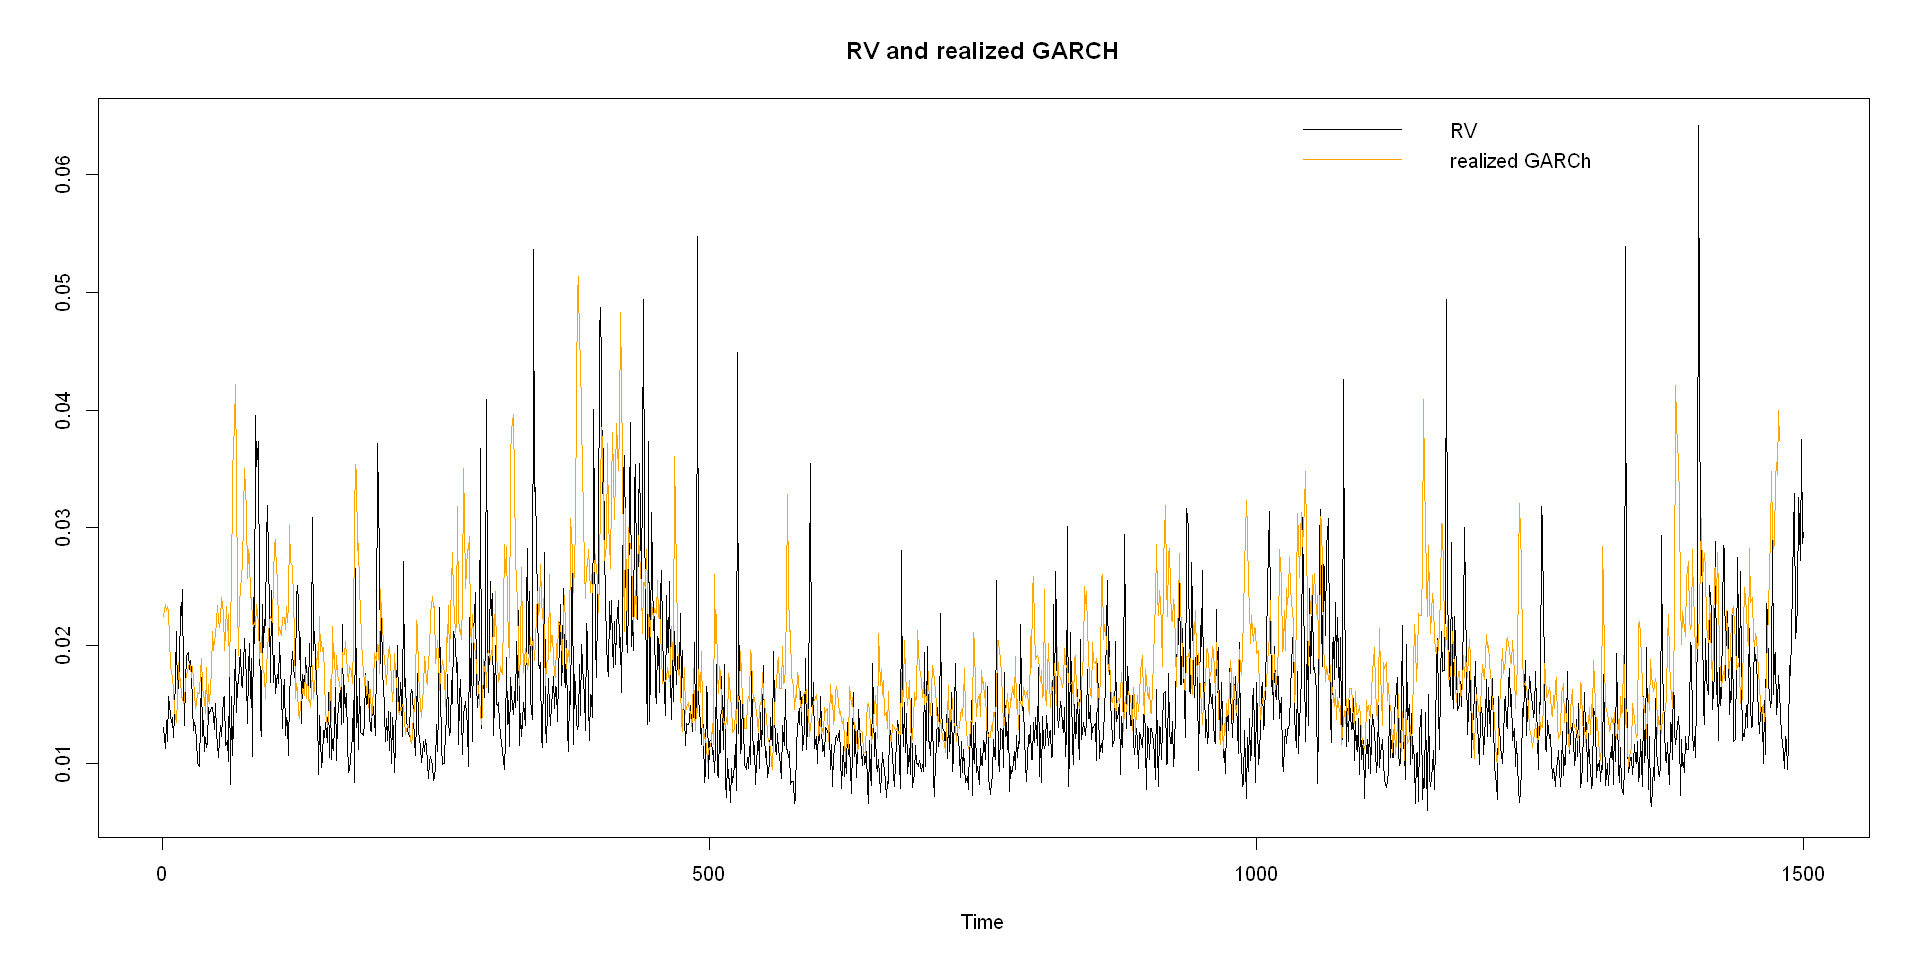

In [18]:
plot.ts((aaba$RV), main = "RV and realized GARCH", ylab = NA)
lines(realized_GARCH_fit@fit$sigma[23:1500], col = "orange")
legend("topright", legend = c("RV",  "realized GARCh"),
       col = c("black","orange"), lwd = 1, bty = "n")

## ARMA-GARCH

In [19]:
ARMA_GARCH_spec <- ugarchspec(mean.model = list(armaOrder=c(1, 1), include.mean= TRUE), variance.model = list(garchOrder = c(1, 1)))

ARMA_GARCH_fit <- ugarchfit(ARMA_GARCH_spec, data = aaba$ret)

ARMA_GARCH_fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000572    0.000475   1.2031 0.228921
ar1    -0.908914    0.067611 -13.4432 0.000000
ma1     0.889245    0.073929  12.0284 0.000000
omega   0.000039    0.000018   2.1453 0.031925
alpha1  0.087964    0.028878   3.0461 0.002318
beta1   0.820554    0.067291  12.1941 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.000572    0.000467   1.22572 0.220304
ar1    -0.908914    0.042122 -21.57828 0.000000
ma1     0.889245    0.045801  19.41538 0.000000
omega   0.000039    0.000047   0.81948 0.412512
alpha1  0.087964    0.070358   1.25024 0.211212
beta1   0.820554    0.173965   4.71677 0.000002



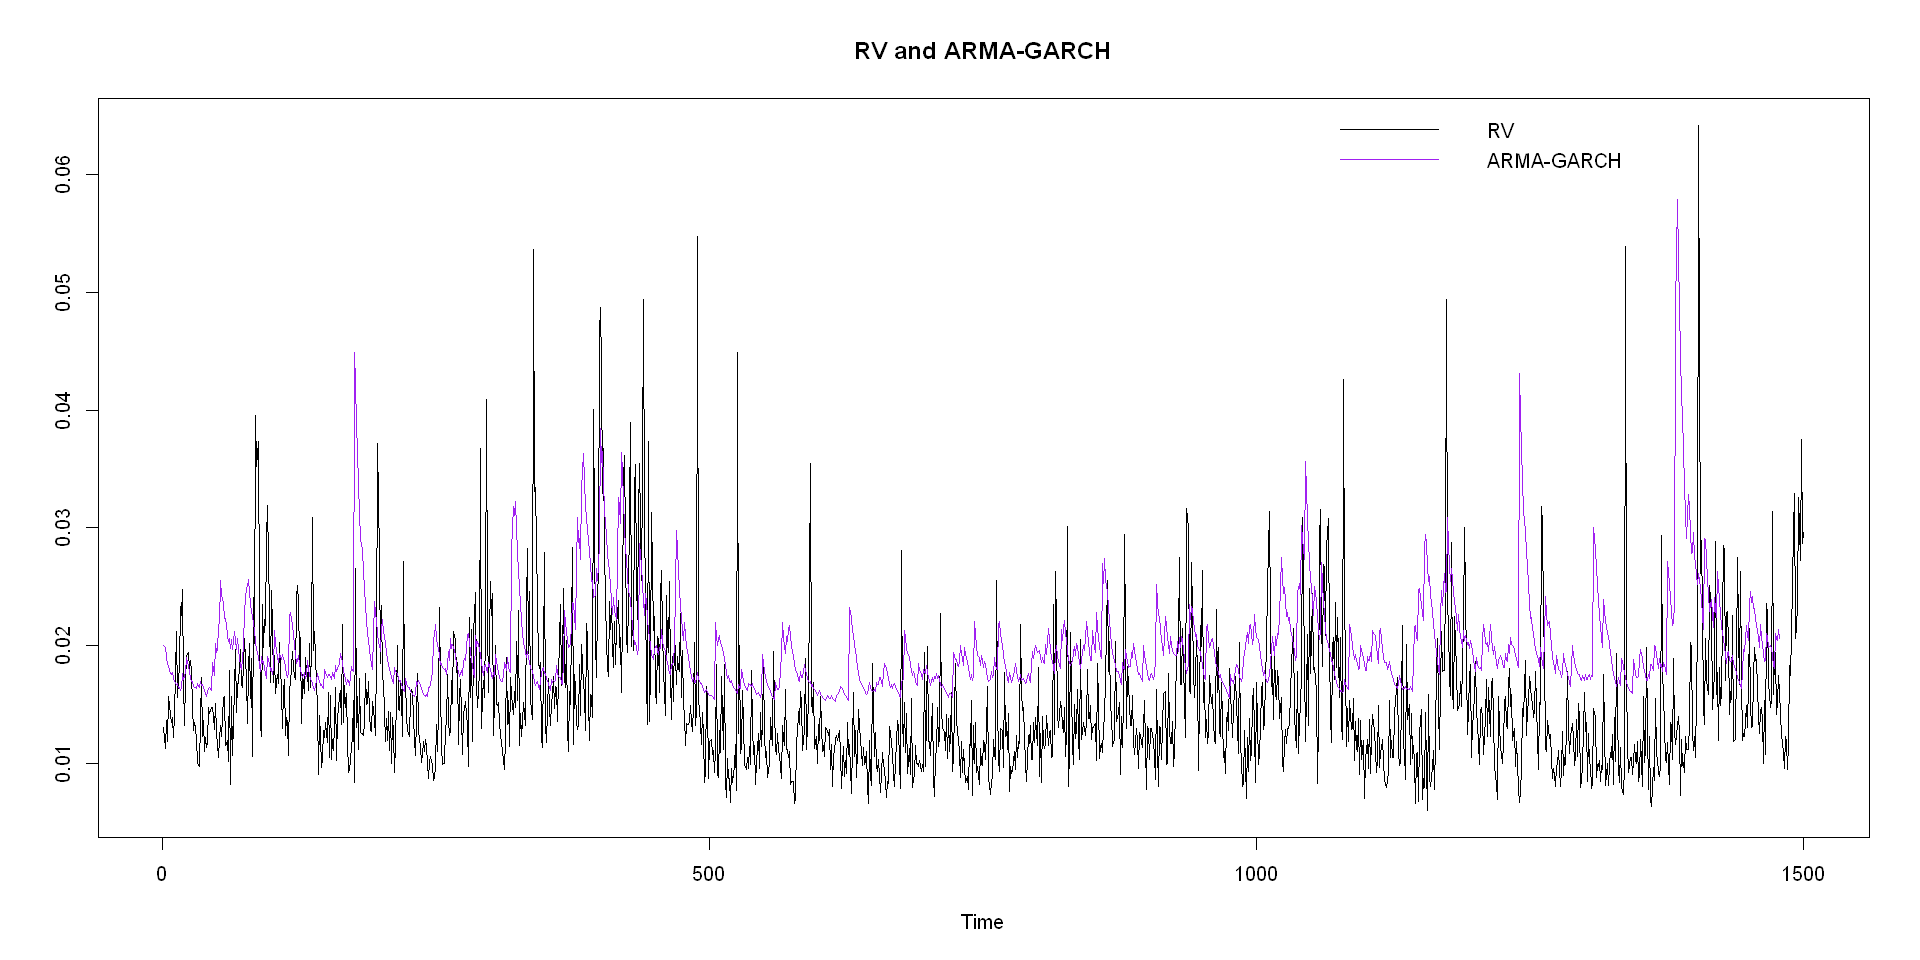

In [20]:
plot.ts((aaba$RV), main = "RV and ARMA-GARCH", ylab = NA)
lines(ARMA_GARCH_fit@fit$sigma[23:1500], col = "purple")
legend("topright", legend = c("RV",  "ARMA-GARCH"),
       col = c("black","purple"), lwd = 1, bty = "n")

# PART 3
## (i) Expanding window

## AR(1)-RV (expanding window)

In [21]:
n <- 750
w <- (L-n)

AR_RV_expand <- lapply(1:w, function(x) Arima(aaba$RV[1:(n+x),], order = c(1, 0, 0)))

AR_RV_expand_fit <- (lapply(AR_RV_expand, predict, n.ahead = 1))
AR_RV_expand_fit <- sapply(AR_RV_expand_fit, function(x) x$pred)
AR_RV_expand_fit <-xts(AR_RV_expand_fit,order.by = index(aaba[(n+1):(n+w)]))

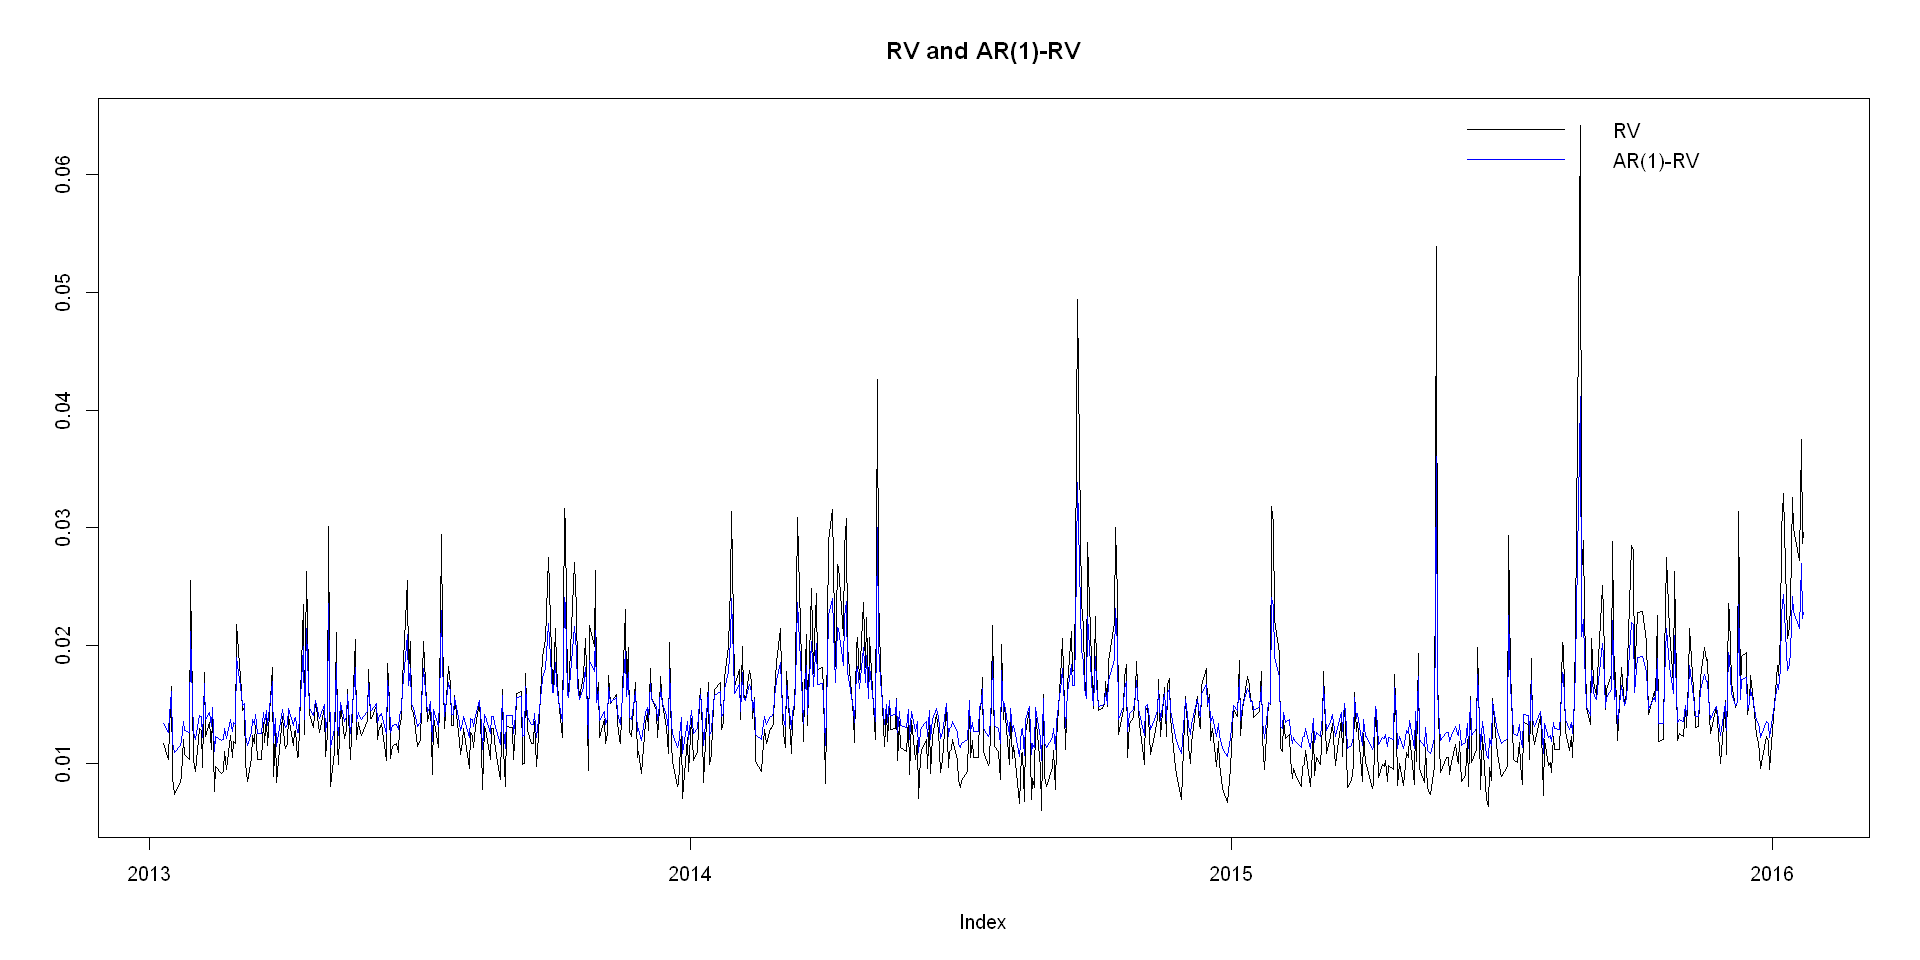

In [22]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and AR(1)-RV")
lines(zoo(AR_RV_expand_fit), col = "blue", lwd = 1)
legend("topright", legend = c("RV", "AR(1)-RV"),
       col = c("black", "blue"), lwd = 1, bty = "n")

## HAR (expanding window)

In [23]:
HAR_expand <-lapply(1:w, function(x) HARmodel(data = aaba$RV[1:(n+x),] , periods = c(1,5,22), RVest = c("rCov"),
                                             type = "HAR", h = 1, transform = "sqrt", inputType = "RM"))

HAR_expand_fit <-unlist(lapply(HAR_expand,predict))
HAR_expand_fit <-xts(HAR_expand_fit,order.by = index(aaba[(n+1):(n+w)]))

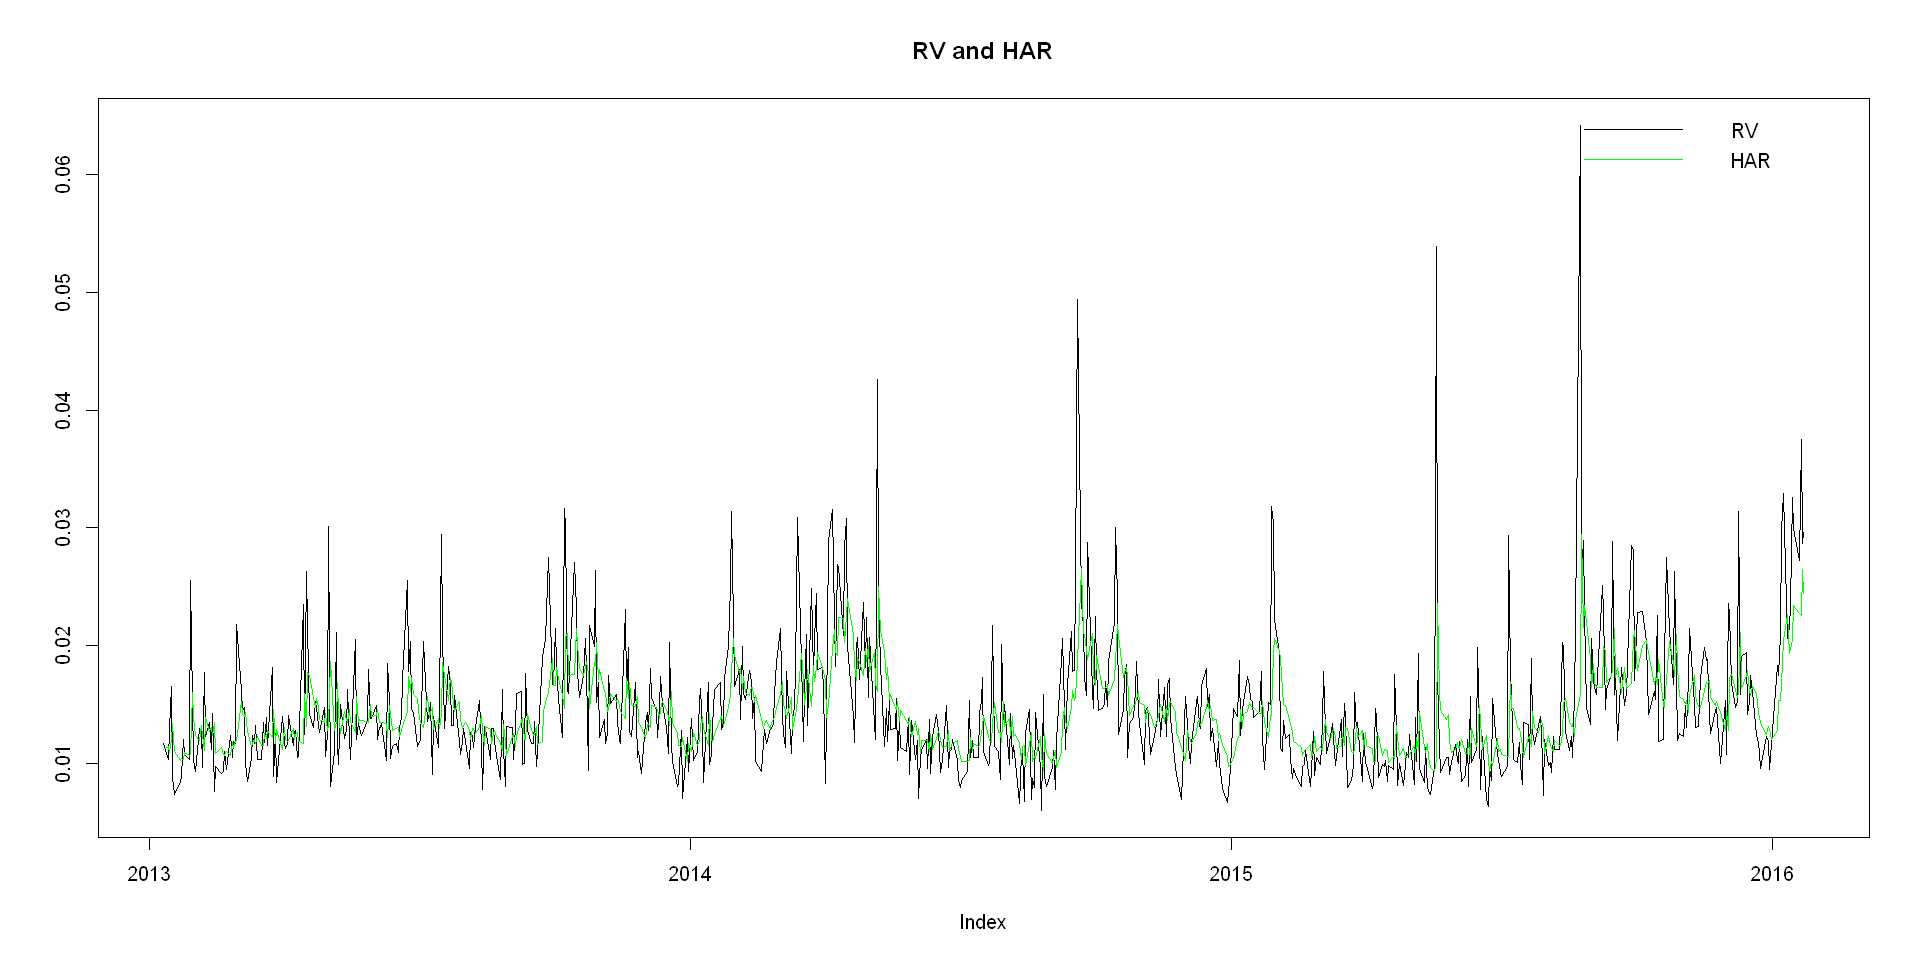

In [24]:
plot.zoo((aaba$RV[(n+1):(n+w)]), ylab = NA,  main = "RV and HAR")
lines(zoo(HAR_expand_fit), col = "green", lwd = 1)
legend("topright", legend = c("RV", "HAR"),
       col = c("black", "green"), lwd = 1, bty = "n")

## HAR-RS (expanding window)

In [25]:
aaba_har <- data.frame(aaba$RV[23:L], RV_1 = aaba$RV[22:(L-1)], aaba$RV_p[22:(L-1)], aaba$RV_n[22:(L-1)], RV5 = RV5[18:(L-5)],RV22 = RV22[1:(L-22)],
                       aaba$RS[22:(L-1)], aaba$RK[22:(L-1)])

N <- nrow(aaba_har) - 750

In [26]:
HAR_RS_expand_fit <- vector(length = N)

for(i in 1:w){
  HAR_RS_expand <- lm(aaba_har$RV[1:(N+i-1)] ~ aaba_har$RV_n[1:(N+i-1)] + aaba_har$RV_p[1:(N+i-1)] 
                      + aaba_har$RV5[1:(N+i-1)] + aaba_har$RV22[1:(N+i-1)])
  HAR_RS_expand_fit[i] <-  predict(HAR_RS_expand, aaba_har[(N+i),])[i]
}

HAR_RS_expand_fit <- xts((HAR_RS_expand_fit),order.by = index(aaba[(n+1):(n+w)]))


Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message:
"'newdata' had 1 row but variables found have 729 rows"
Warning message:
"'newdata' had 1 row but variables found have 730 rows"
Warning message:
"'newdata' had 1 row but variables found have 731 rows"
Warning message:
"'newdata' had 1 row but variables found have 732 rows"
Warning message:
"'newdata' had 1 row but variables found have 733 rows"
Warning message:
"'newdata' had 1 row but variables found have 734 rows"
Warning message:
"'newdata' had 1 row but variables found have 735 rows"
Warning message:
"'newdata' had 1 row but variables found have 736 rows"
Warning message:
"'newdata' had 1 row but variables found have 737 rows"
Warning message:
"'newdata' had 1 row but variables found have 738 rows"
Warning message:
"'newdata' had 1 row but variables found have 739 rows"
Warning message:
"'newdata' had 1 row but variables found have 740 rows"
Warning message:
"'newdata' had 1 row but variables

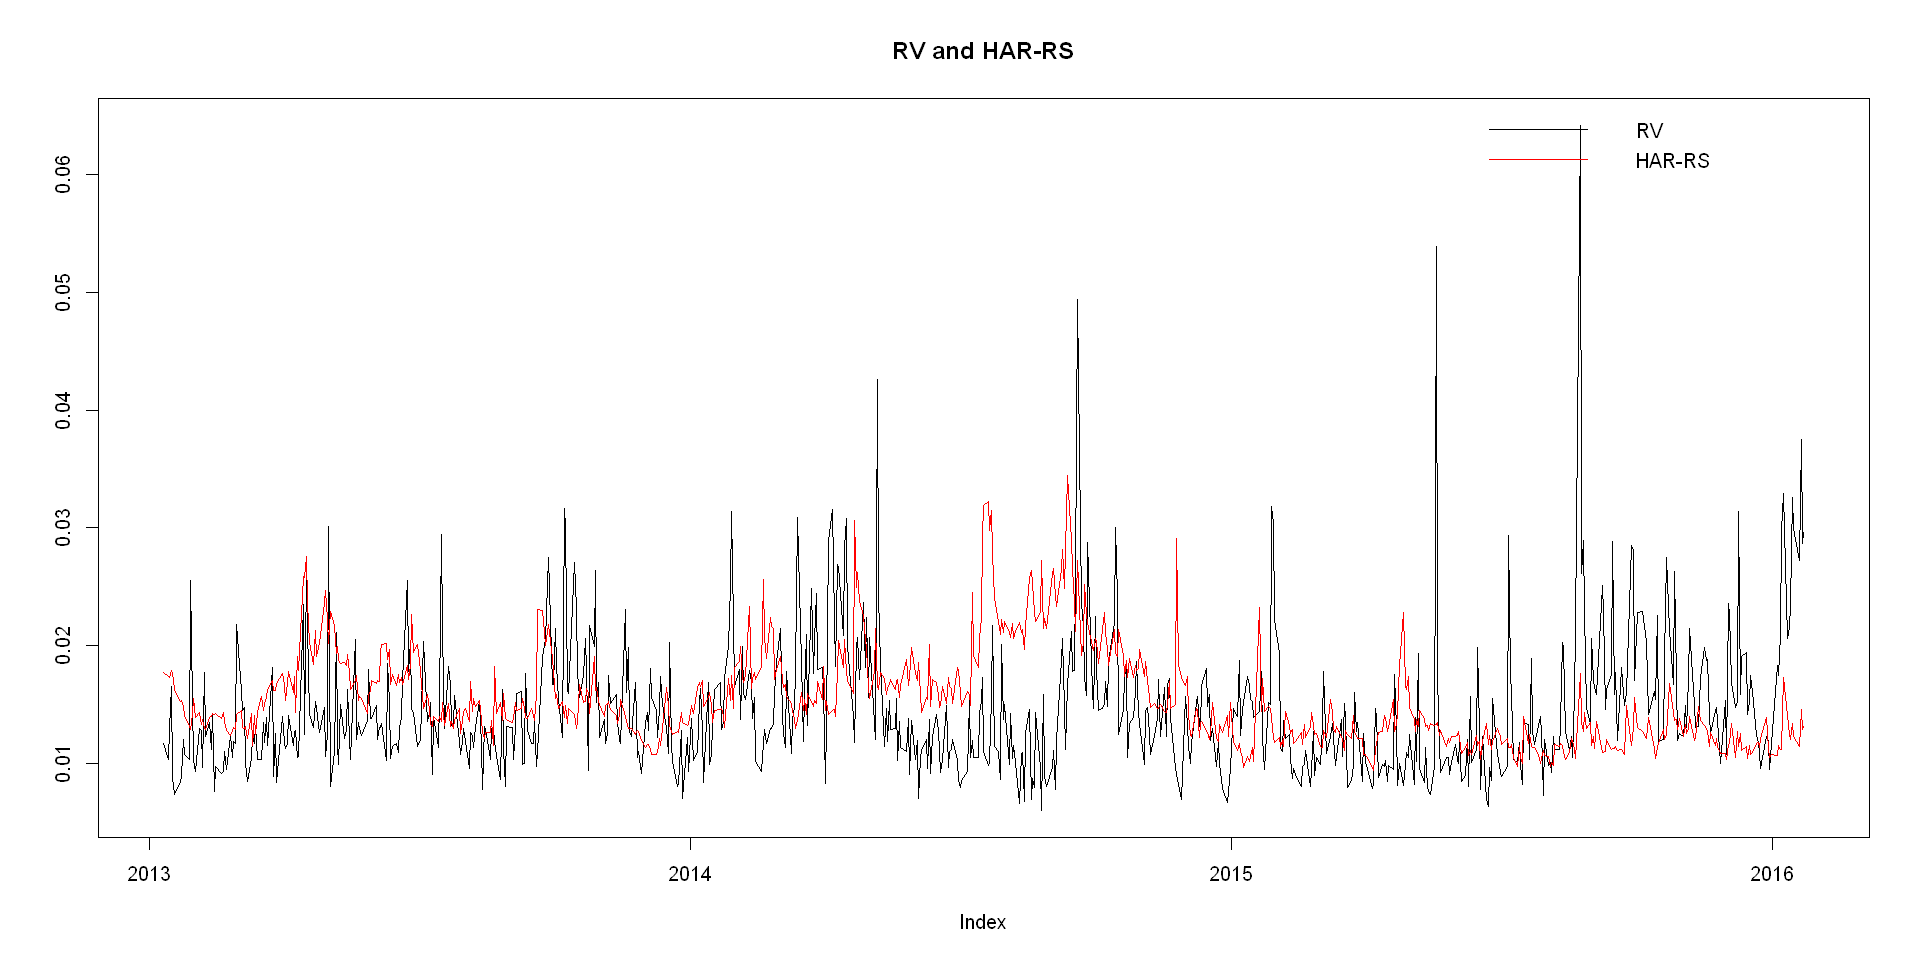

In [27]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and HAR-RS")
lines(zoo(HAR_RS_expand_fit), col = "red", lwd = 1)
legend("topright", legend = c("RV", "HAR-RS"),
       col = c("black", "red"), lwd = 1, bty = "n")

## HAR-Rskew-Rkurt (expanding window)

In [28]:
HAR_Rskew_expand_fit <- vector()

for(i in 1:w){
  HAR_Rskew_expand <- lm(aaba_har$RV[1:(N+i-1)] ~ aaba_har$RV.1[1:(N+i-1)]
                      + aaba_har$RV5[1:(N+i-1)] + aaba_har$RV22[1:(N+i-1)]
                      + aaba_har$RS[1:(N+i-1)] + aaba_har$RK[1:(N+i-1)])
 HAR_Rskew_expand_fit[i] <- predict(HAR_Rskew_expand, aaba_har[(N+i),])[i]
}

HAR_Rskew_expand_fit <- xts((HAR_Rskew_expand_fit),order.by = index(aaba[(n+1):(n+w)]))

Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message:
"'newdata' had 1 row but variables found have 729 rows"
Warning message:
"'newdata' had 1 row but variables found have 730 rows"
Warning message:
"'newdata' had 1 row but variables found have 731 rows"
Warning message:
"'newdata' had 1 row but variables found have 732 rows"
Warning message:
"'newdata' had 1 row but variables found have 733 rows"
Warning message:
"'newdata' had 1 row but variables found have 734 rows"
Warning message:
"'newdata' had 1 row but variables found have 735 rows"
Warning message:
"'newdata' had 1 row but variables found have 736 rows"
Warning message:
"'newdata' had 1 row but variables found have 737 rows"
Warning message:
"'newdata' had 1 row but variables found have 738 rows"
Warning message:
"'newdata' had 1 row but variables found have 739 rows"
Warning message:
"'newdata' had 1 row but variables found have 740 rows"
Warning message:
"'newdata' had 1 row but variables

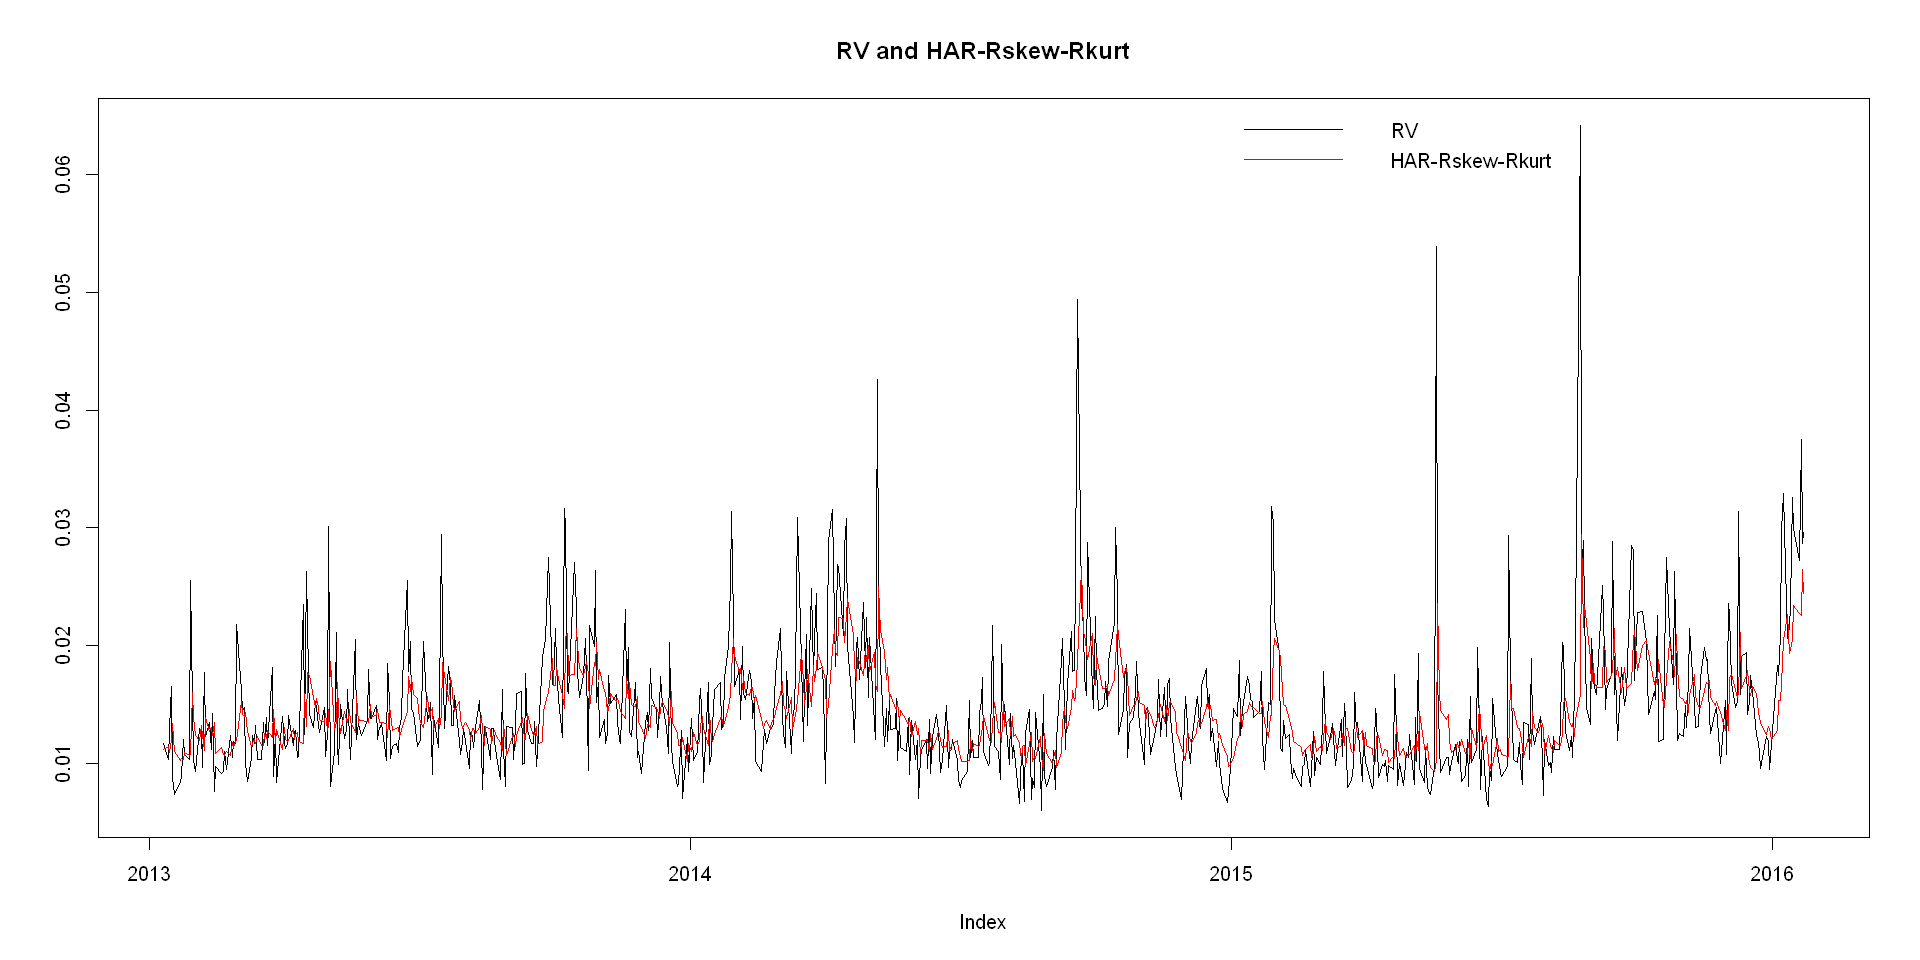

In [29]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and HAR-Rskew-Rkurt")
lines(zoo(HAR_expand_fit), col = "red", lwd = 1)
legend("topright", legend = c("RV", "HAR-Rskew-Rkurt"),
       col = c("black", "red"), lwd = 1, bty = "n")

## realized GARCH (expanding window)

In [30]:
realized_GARCH_expand<-ugarchroll(realized_GARCH_spec, 100*aaba$ret[1:(w+n),], n.ahead = 1, forecast.length = w, 
                               n.start = NULL, refit.every = 1, refit.window = c("expanding"), 
                               window.size = n, solver = "solnp", fit.control = list(), 
                               solver.control = list(), calculate.VaR = FALSE, 
                               cluster = NULL, keep.coef = TRUE,realizedVol = 100*aaba$RV)

realized_GARCH_expand 

realized_GARCH_expand_fit<- xts(realized_GARCH_expand@forecast[["density"]]$Sigma, order.by = index(aaba[(n+1):(n+w)]))/100

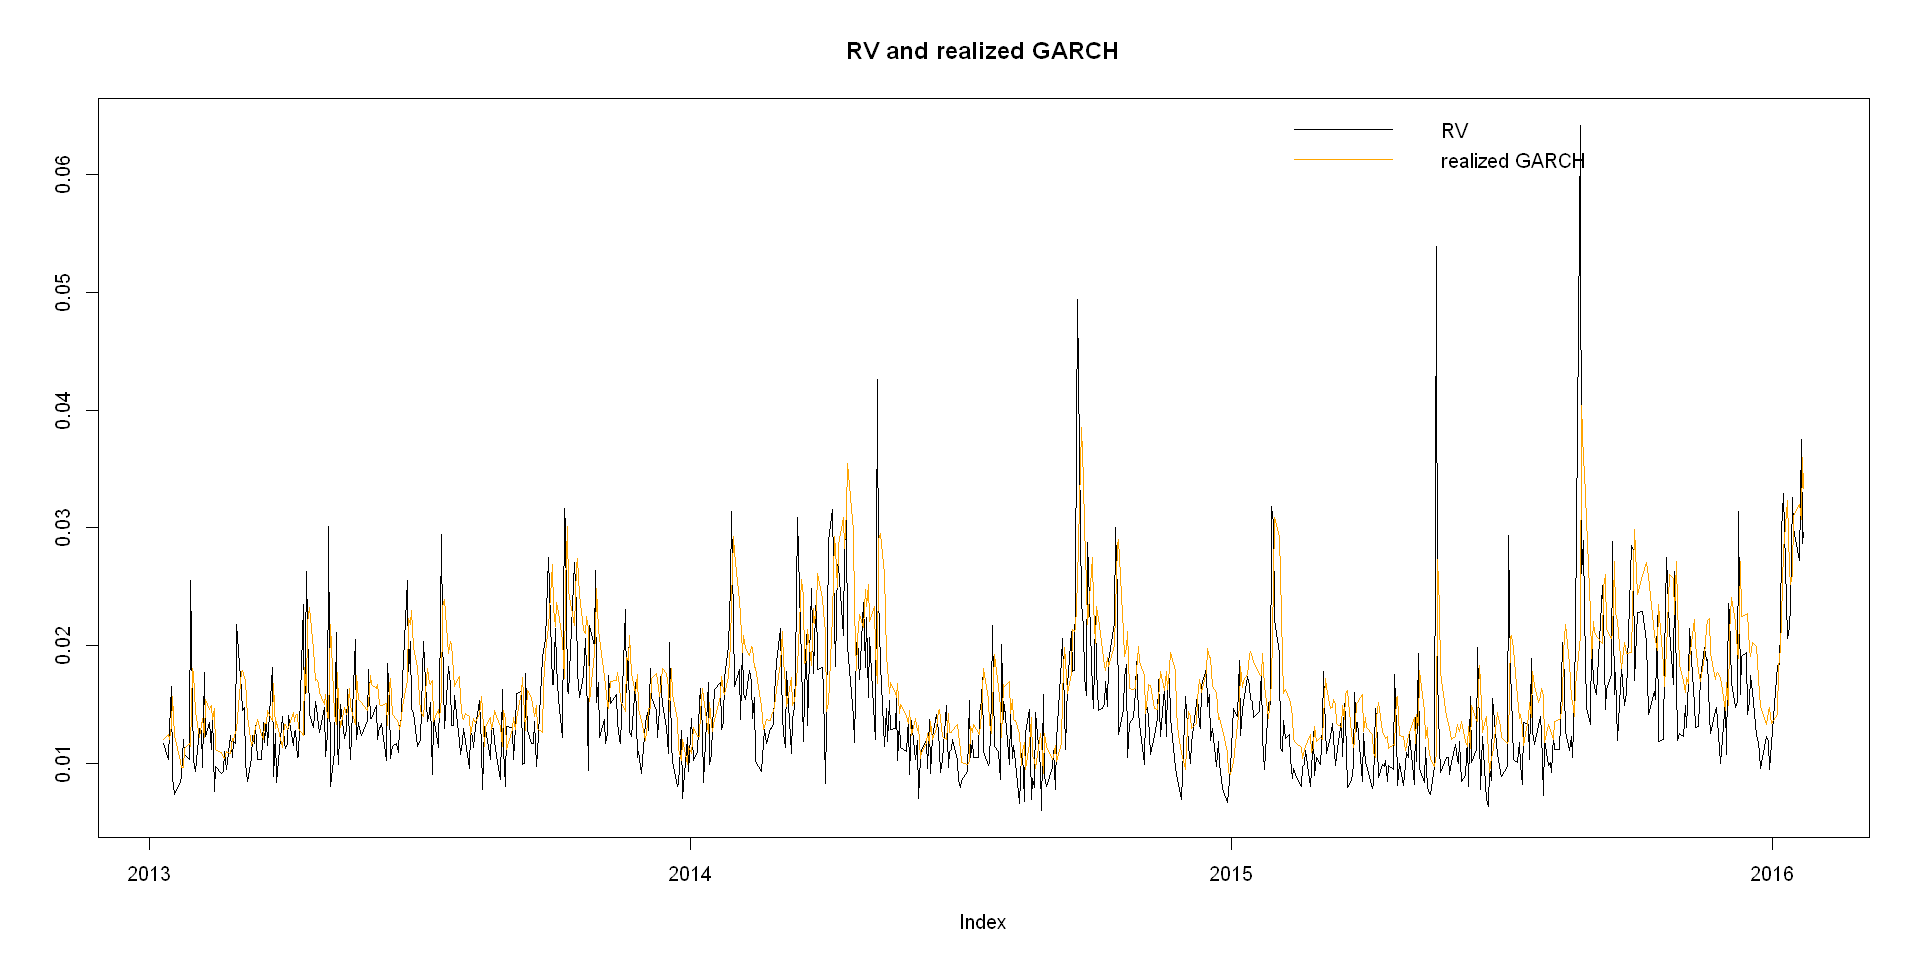

In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and realized GARCH")
lines(zoo(realized_GARCH_expand_fit), col = "orange", lwd = 1)
legend("topright", legend = c("RV", "realized GARCH"),
       col = c("black", "orange"), lwd = 1, bty = "n")

## ARMA-GARCH (expanding window)

In [ ]:
ARMA_GARCH_expand  <-ugarchroll(ARMA_GARCH_spec, 100*aaba$ret[1:(w+n),], n.ahead = 1, forecast.length = w, 
                                n.start = NULL, refit.every = 1, refit.window = c("expanding"), 
                                window.size = n, solver = "solnp", fit.control = list(), 
                                solver.control = list(), calculate.VaR = FALSE, 
                                cluster = NULL, keep.coef = TRUE)

ARMA_GARCH_expand

ARMA_GARCH_expand_fit<- xts(ARMA_GARCH_expand@forecast[["density"]]$Sigma,
                                order.by = index(aaba[(n+1):(n+w)]))/100


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mea


*-------------------------------------*
*              GARCH Roll             *
*-------------------------------------*
No.Refits		: 750
Refit Horizon	: 1
No.Forecasts	: 750
GARCH Model		: sGARCH(1,1)
Distribution	: norm 

Forecast Density:
                Mu  Sigma Skew Shape Shape(GIG) Realized
2013-01-11  0.2598 2.2455    0     0          0  -0.5236
2013-01-14 -0.0714 1.8493    0     0          0   1.4591
2013-01-15  0.0730 1.7946    0     0          0  -0.1553
2013-01-16  0.0509 1.5784    0     0          0   3.1117
2013-01-17 -0.1198 2.2330    0     0          0   1.0492
2013-01-18  0.1075 1.9073    0     0          0  -0.2488

..........................
               Mu  Sigma Skew Shape Shape(GIG) Realized
2016-01-14 0.1807 1.9547    0     0          0  -3.8625
2016-01-15 0.2766 2.1590    0     0          0  -1.4579
2016-01-19 0.2825 2.1332    0     0          0   1.9280
2016-01-20 0.1849 2.3914    0     0          0  -2.9234
2016-01-21 0.3122 2.3952    0     0          0  -0.

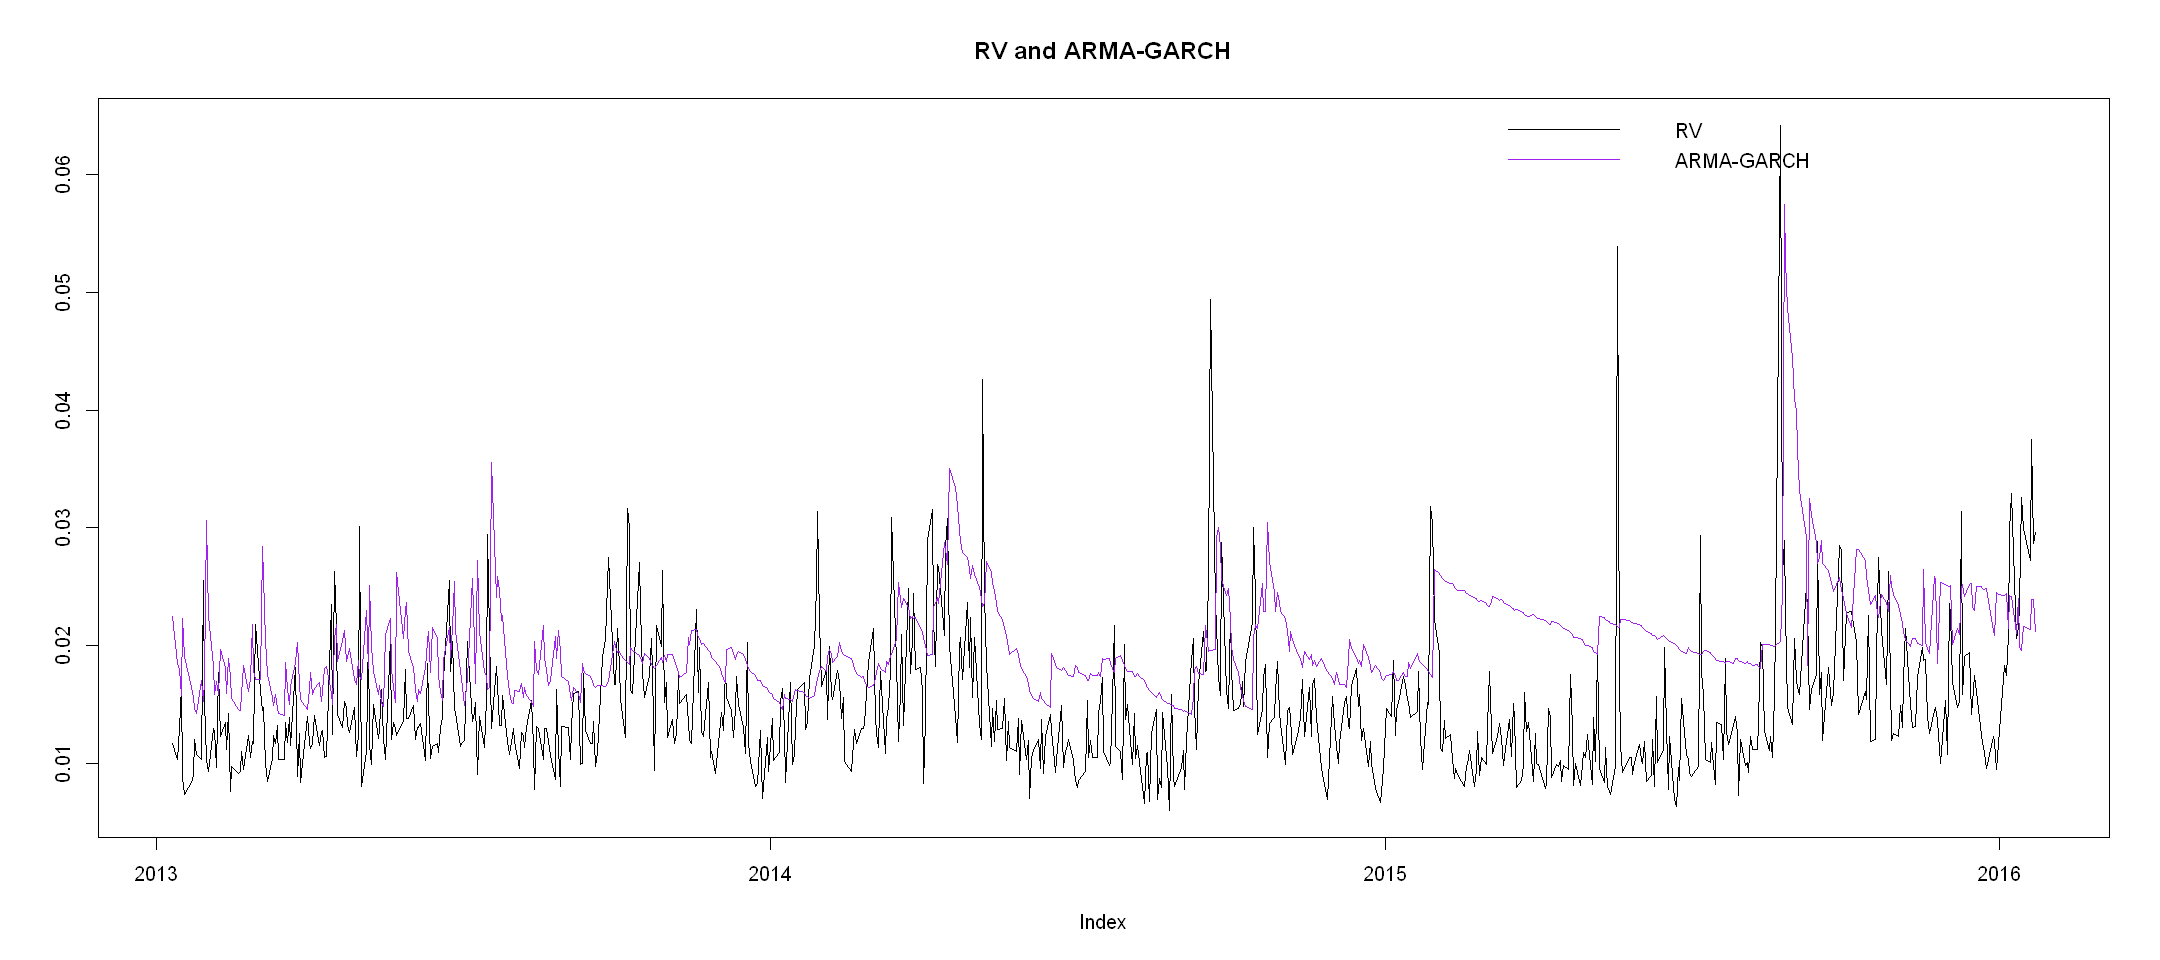

In [ ]:
plot.zoo((aaba$RV[751:1500]), ylab = NA,  main = "RV and ARMA-GARCH")
lines(zoo(ARMA_GARCH_expand_fit), col = "purple", lwd = 1)
legend("topright", legend = c("RV", "ARMA-GARCH"),
       col = c("black", "purple"), lwd = 1, bty = "n")

### Comparison of errors

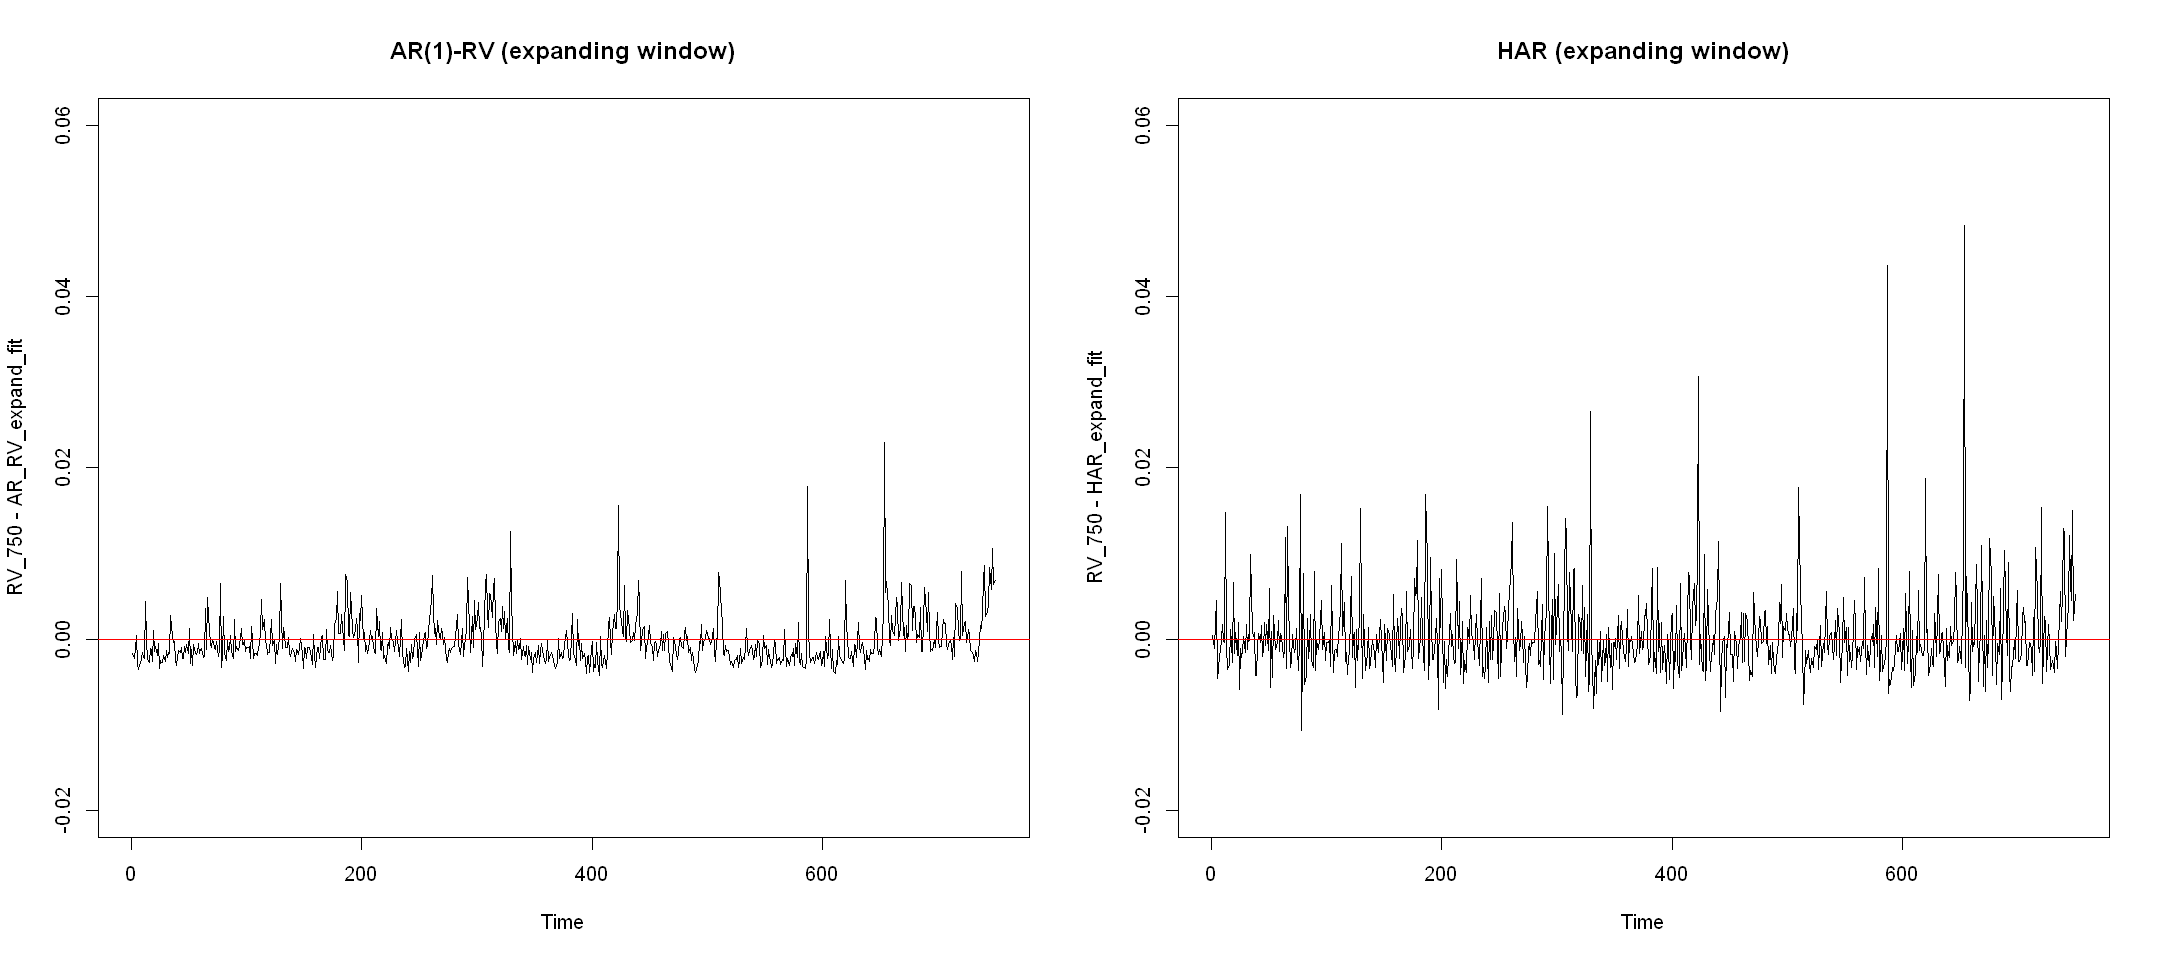

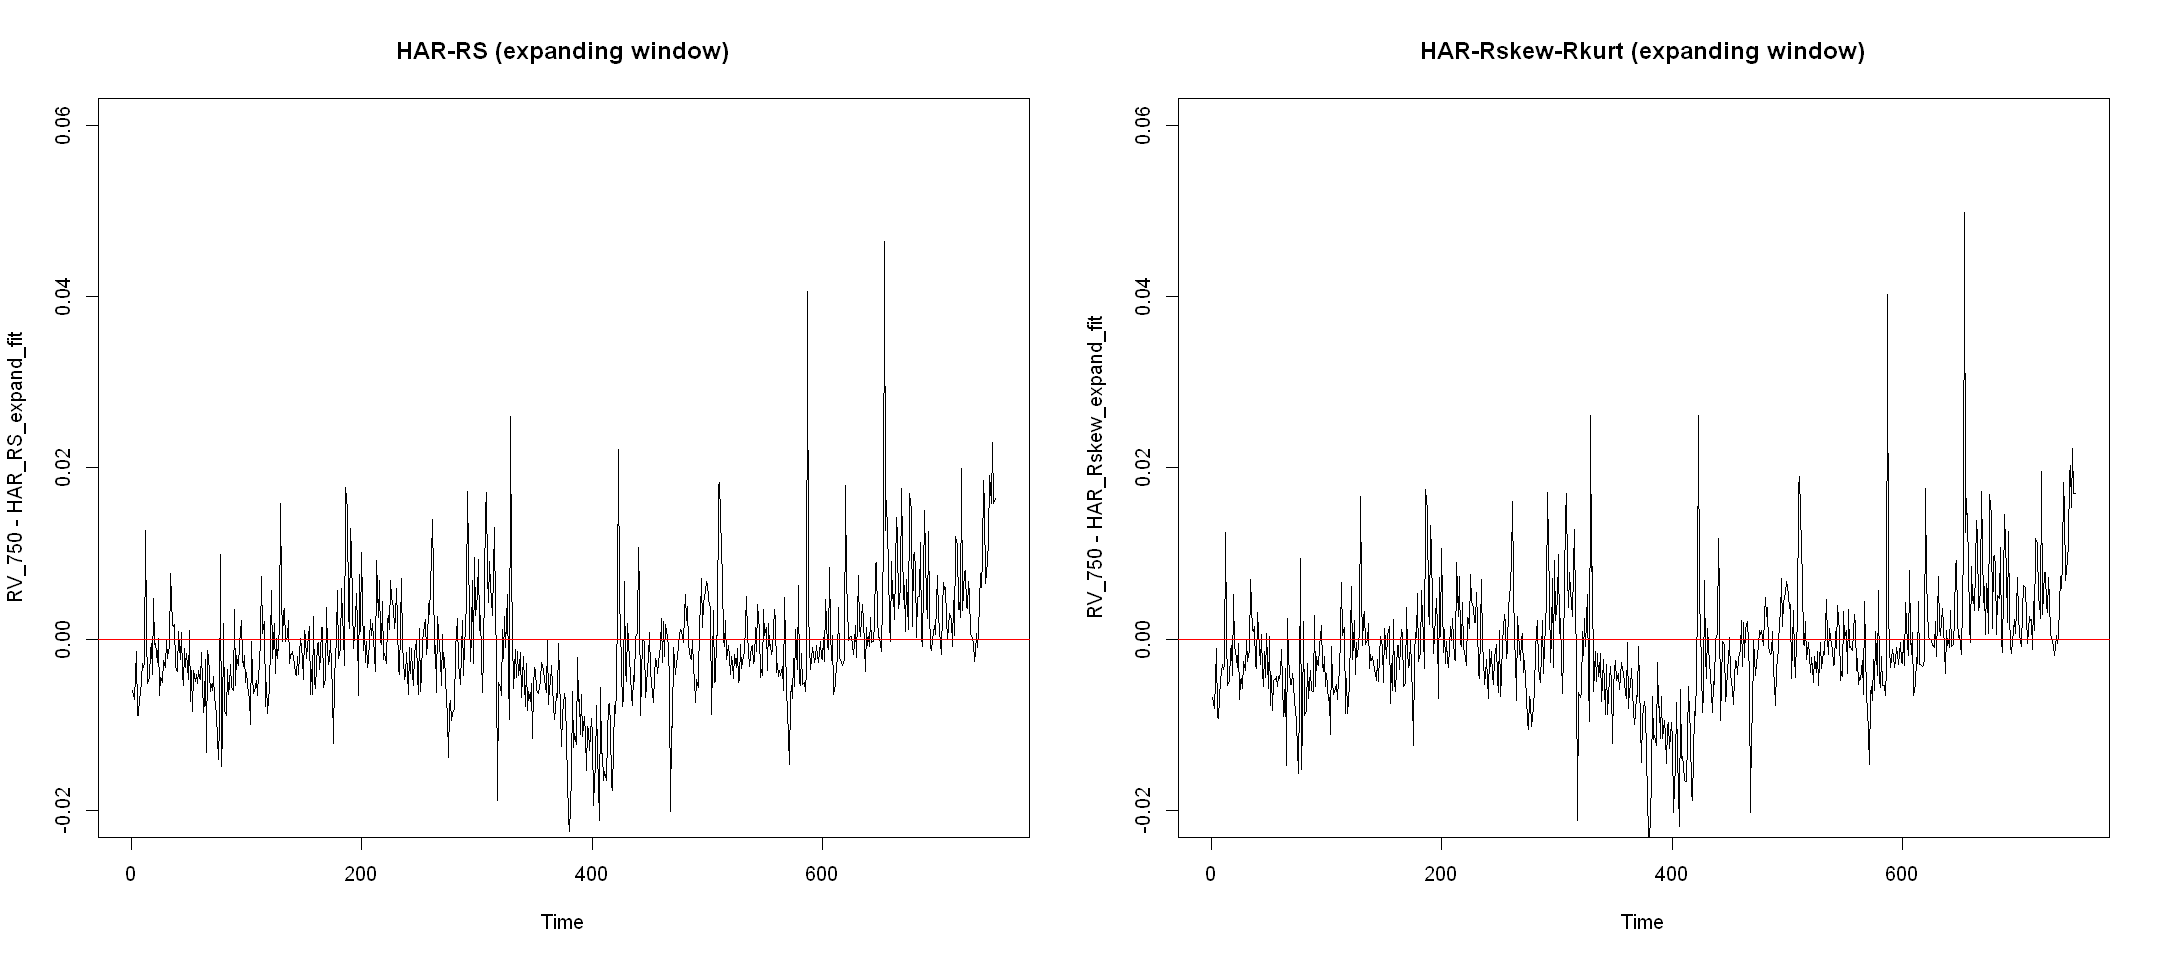

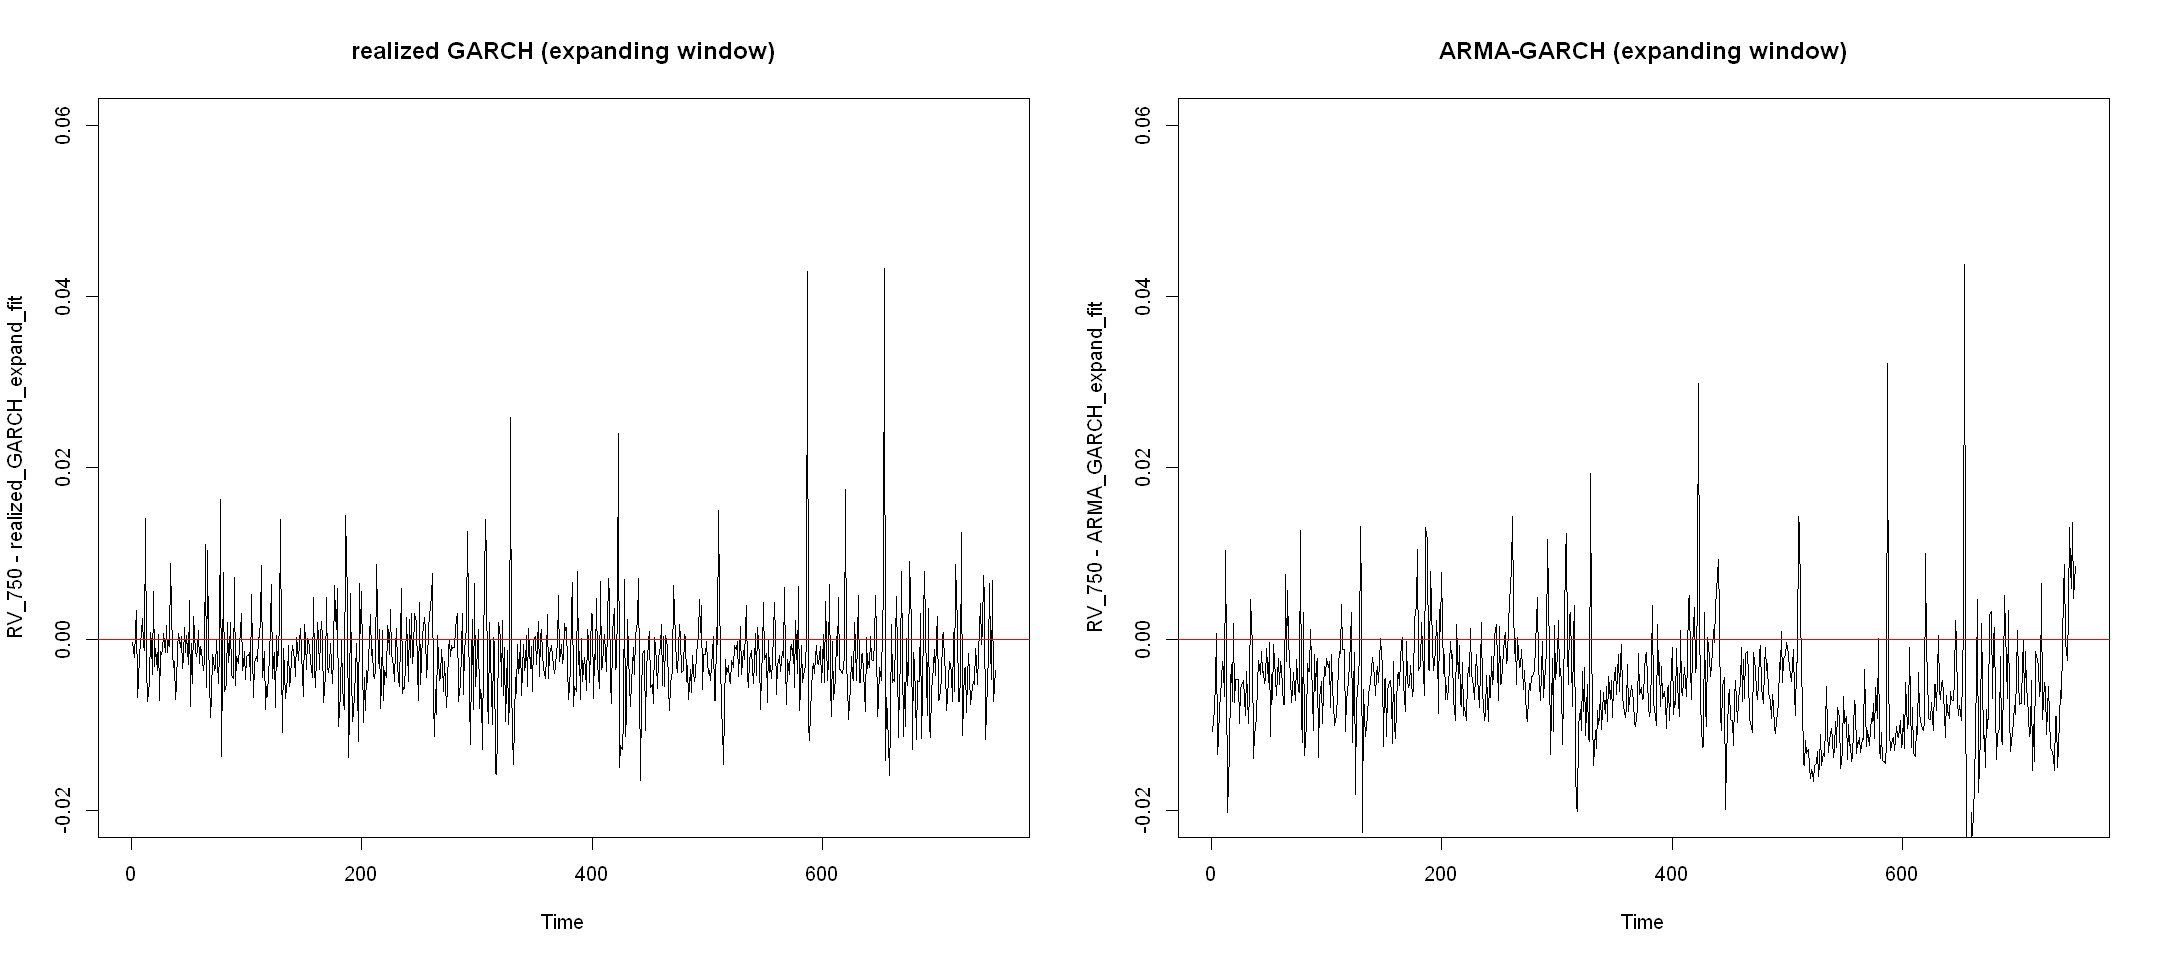

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 8)
par(mfrow = c(1, 2))

RV_750 <- aaba$RV[(n + 1):(n + w)]

plot.ts(RV_750 - AR_RV_expand_fit, ylim = c(-0.02, 0.06), main = "AR(1)-RV (expanding window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - HAR_expand_fit, ylim = c(-0.02, 0.06), main = "HAR (expanding window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - HAR_RS_expand_fit, ylim = c(-0.02, 0.06), main = "HAR-RS (expanding window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - HAR_Rskew_expand_fit, ylim = c(-0.02, 0.06), main = "HAR-Rskew-Rkurt (expanding window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - realized_GARCH_expand_fit, ylim = c(-0.02, 0.06), main = "realized GARCH (expanding window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

plot.ts(RV_750 - ARMA_GARCH_expand_fit, ylim = c(-0.02, 0.06), main = "ARMA-GARCH (expanding window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

The first model comparison is done by plotting the difference between the true and predicted values. Once the predictions are identical to the actual value, this would imply having a perfect model, there would be only a constant 0 line. Therefore, the higher volatility on the graphs above, the less precise a model is.

On the first impression, AR(1)-RV seems to be the closest to the red line and thus potentially best for forecasting.  

### MSE & MAE

In [ ]:
#MSE
MSE_loss <-function(r_vol, forecast){
  return((r_vol - forecast)^2)}

MSE_AR_RV_expand <- MSE_loss(RV_750, AR_RV_expand_fit)
MSE_HAR_expand <- MSE_loss(RV_750, HAR_expand_fit)
MSE_HAR_RS_expand <- MSE_loss(RV_750, HAR_RS_expand_fit)
MSE_HAR_Rskew_expand <- MSE_loss(RV_750, HAR_Rskew_expand_fit)
MSE_real_GARCH_expand <- MSE_loss(RV_750, realized_GARCH_expand_fit)
MSE_ARMA_GARCH_expand <- MSE_loss(RV_750, ARMA_GARCH_expand_fit)

MSE_expand <- c(mean(MSE_AR_RV_expand), mean(MSE_HAR_expand), mean(MSE_HAR_RS_expand)
                , mean(MSE_HAR_Rskew_expand), mean(MSE_real_GARCH_expand),mean(MSE_ARMA_GARCH_expand))

# Data frame with the results
MSE_df <- data.frame(
  Model = c("AR_RV_expand", "HAR_expand", "HAR_RS_expand", "HAR_Rskew_expand", "real_GARCH_expand", "ARMA_GARCH_expand"),
  Mean_MSE = MSE_expand
)
print(MSE_df)

              Model     Mean_MSE
1      AR_RV_expand 7.532706e-06
2        HAR_expand 2.535306e-05
3     HAR_RS_expand 4.897295e-05
4  HAR_Rskew_expand 5.102383e-05
5 real_GARCH_expand 3.453078e-05
6 ARMA_GARCH_expand 7.550734e-05


The MSE loss function measures the mean squared error between values predicted by our model and true values, therefore, we aim to minizie this metric. 

Comparing our expanding window models in term of MSE, we would choose AR(1)-RV that reveals the lowest MSE and its predictions are thus closest to the targeted true values. Value of the AR(1)-RV loss function is significantly lower in this case suggesting quite a large difference in predicting capacity.      

In [ ]:
#MAE
MAE_loss <-function(r_vol, forecast){
  return(abs(r_vol - forecast))}
  
MAE_AR_RV_expand <- MAE_loss(RV_750, AR_RV_expand_fit)
MAE_HAR_expand <- MAE_loss(RV_750, HAR_expand_fit)
MAE_HAR_RS_expand <- MAE_loss(RV_750, HAR_RS_expand_fit)
MAE_HAR_Rskew_expand <- MAE_loss(RV_750, HAR_Rskew_expand_fit)
MAE_real_GARCH_expand <- MAE_loss(RV_750, realized_GARCH_expand_fit)
MAE_ARMA_GARCH_expand <- MAE_loss(RV_750, ARMA_GARCH_expand_fit)

MAE_expand <- c(mean(MAE_AR_RV_expand), mean(MAE_HAR_expand), mean(MAE_HAR_RS_expand),
                mean(MAE_HAR_Rskew_expand), mean(MAE_real_GARCH_expand),mean(MAE_ARMA_GARCH_expand))

# Data frame with the results
MAE_df <- data.frame(
  Model = c("AR_RV_expand", "HAR_expand", "HAR_RS_expand", "HAR_Rskew_expand", "real_GARCH_expand", "ARMA_GARCH_expand"),
  Mean_MAE = MAE_expand
)
print(MAE_df)

              Model    Mean_MAE
1      AR_RV_expand 0.001980715
2        HAR_expand 0.003234858
3     HAR_RS_expand 0.005043000
4  HAR_Rskew_expand 0.005112393
5 real_GARCH_expand 0.004327381
6 ARMA_GARCH_expand 0.007147115


Analogically, the lowest MAE metric is obtained by the AR(1)-RV model followed by HAR and realGARCH. Since the loss function is to be minimized, we would prefer these models as it predicts values closest to the true ones.

### Minzer-Zarnowitz regression

In [ ]:
MZR_RV_AR_expand <- lm(RV_750 ~ AR_RV_expand_fit)
summary(MZR_RV_AR_expand)

MZR_HAR_expand <- lm(RV_750 ~ MAE_HAR_expand)
summary(MZR_HAR_expand)

MZR_HAR_RS_expand <- lm(RV_750 ~ HAR_RS_expand_fit)
summary(MZR_HAR_RS_expand)

MZR_HAR_Rskew_expand <- lm(RV_750 ~ HAR_Rskew_expand_fit)
summary(MZR_HAR_Rskew_expand)

MZR_real_GARCH_expand <- lm(RV_750 ~ realized_GARCH_expand_fit)
summary(MZR_real_GARCH_expand)

MZR_ARMA_GARCH_expand <- lm(RV_750 ~ MSE_ARMA_GARCH_expand)
summary(MZR_ARMA_GARCH_expand)


Call:
lm(formula = RV_750 ~ AR_RV_expand_fit)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0028715 -0.0005676 -0.0001646  0.0005784  0.0054818 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.0143146  0.0001534  -93.29   <2e-16 ***
AR_RV_expand_fit  1.9942484  0.0103679  192.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0008296 on 748 degrees of freedom
Multiple R-squared:  0.9802,	Adjusted R-squared:  0.9802 
F-statistic: 3.7e+04 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ MAE_HAR_expand)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0140093 -0.0025891  0.0001474  0.0026085  0.0147923 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.011255   0.000201   55.99   <2e-16 ***
MAE_HAR_expand 1.046634   0.039788   26.31   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004248 on 748 degrees of freedom
Multiple R-squared:  0.4806,	Adjusted R-squared:  0.4799 
F-statistic:   692 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ HAR_RS_expand_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009669 -0.003832 -0.001371  0.002122  0.049351 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0132417  0.0008425  15.717   <2e-16 ***
HAR_RS_expand_fit 0.0891789  0.0527203   1.692   0.0911 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005882 on 748 degrees of freedom
Multiple R-squared:  0.003811,	Adjusted R-squared:  0.002479 
F-statistic: 2.861 on 1 and 748 DF,  p-value: 0.09115



Call:
lm(formula = RV_750 ~ HAR_Rskew_expand_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009252 -0.003843 -0.001437  0.002123  0.049609 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.0138263  0.0008281  16.696   <2e-16 ***
HAR_Rskew_expand_fit 0.0511816  0.0515841   0.992    0.321    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00589 on 748 degrees of freedom
Multiple R-squared:  0.001314,	Adjusted R-squared:  -2.075e-05 
F-statistic: 0.9845 on 1 and 748 DF,  p-value: 0.3214



Call:
lm(formula = RV_750 ~ realized_GARCH_expand_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009556 -0.003034 -0.000999  0.001699  0.047124 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.0046348  0.0006431   7.207  1.4e-12 ***
realized_GARCH_expand_fit 0.5946772  0.0366814  16.212  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00507 on 748 degrees of freedom
Multiple R-squared:   0.26,	Adjusted R-squared:  0.259 
F-statistic: 262.8 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ MSE_ARMA_GARCH_expand)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0296536 -0.0016763 -0.0001051  0.0017269  0.0073721 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.144e-02  1.112e-04  102.86   <2e-16 ***
MSE_ARMA_GARCH_expand 2.396e+01  4.322e-01   55.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002607 on 748 degrees of freedom
Multiple R-squared:  0.8043,	Adjusted R-squared:  0.8041 
F-statistic:  3074 on 1 and 748 DF,  p-value: < 2.2e-16


Theoretically, the Mincer-Zarnowitz regression is used to evaluate the quality of forecasts. It involves regressing the actual values of a variable on the forecasted values. Ideally, the intercept should be close to 0 and statistically not significant - if alpha is significantly different from 0, it indicates a systematic bias in the forecasts. On the other hand, the slope should be close to 1 and statistically significant - if beta is significantly different from 1, it suggests that the forecasts are systematically overestimating or underestimating the actual values. Finally, the R-squared value indicates the proportion of variance in the actual values that is explained by the forecasted values - a higher R-squared value indicates a better fit of the forecast to the actual data.

The following table compares the alpha and beta coefficients:

In [ ]:
alpha_beta <- data.frame(
  Model = c("AR_RV_expand", "HAR_expand", "HAR_RS_expand", "HAR_Rskew_expand", "real_GARCH_expand", "ARMA_GARCH_expand"),
  Alpha = c(coef(MZR_RV_AR_expand)[1], coef(MZR_HAR_expand)[1], coef(MZR_HAR_RS_expand)[1], coef(MZR_HAR_Rskew_expand)[1], coef(MZR_real_GARCH_expand)[1], coef(MZR_ARMA_GARCH_expand)[1]),
  Beta = c(coef(MZR_RV_AR_expand)[2], coef(MZR_HAR_expand)[2], coef(MZR_HAR_RS_expand)[2], coef(MZR_HAR_Rskew_expand)[2], coef(MZR_real_GARCH_expand)[2], coef(MZR_ARMA_GARCH_expand)[2]),
  R_squared = c(summary(MZR_RV_AR_expand)$r.squared, summary(MZR_HAR_expand)$r.squared, summary(MZR_HAR_RS_expand)$r.squared, summary(MZR_HAR_Rskew_expand)$r.squared, summary(MZR_real_GARCH_expand)$r.squared, summary(MZR_ARMA_GARCH_expand)$r.squared)
)
alpha_beta

,Model,Alpha,Beta,R_squared
,<chr>,<dbl>,<dbl>,<dbl>
AR_RV_expand_fit,AR_RV_expand,-0.014314559,1.99424835,0.980183201
MAE_HAR_expand,HAR_expand,0.011255479,1.04663398,0.480550108
HAR_RS_expand_fit,HAR_RS_expand,0.013241730,0.08917894,0.003810742
HAR_Rskew_expand_fit,HAR_Rskew_expand,0.013826303,0.05118163,0.001314390
realized_GARCH_expand_fit,real_GARCH_expand,0.004634774,0.59467717,0.260011883
MSE_ARMA_GARCH_expand,ARMA_GARCH_expand,0.011435608,23.96264407,0.804314165


Comparing simply the coefficients values, the AR(1)-RV model seems to have a statistically significant negative alpha and beta close to 2 suggesting that the forecasted values could be consistently higher and thus our model might not be capturing the true underlying process accurately. Although this model has a really high R^2 (98%), we would need to check the possible overfitting.    

The second and third best models in terms or R^2, HAR and realGARCH, seems to have both alpha close to 0. The GAR model has also a beta coefficient close to 1, which reveals a nice fit to the underlying process. 

On the other hand, the HAR-RS, HAR-Rskew and ARMA-GARCH models tend to have relatively high alpha as well as very low beta and R^2 suggesting they have relatively poor quality of forecasts.

Exploring the statistical significance of model coefficients in the regressions results above, none of our models has alpha statistically different from 0. Therefore, we should attempt to further correct for this bias.

### Diebold-Mariano test

In [ ]:
# Diebold-Mariano test for top 3 models using MSE loss
dm.test(MSE_AR_RV_expand, MSE_HAR_expand, alternative = "two.sided")
dm.test(MSE_AR_RV_expand, MSE_real_GARCH_expand, alternative = "two.sided")
dm.test(MSE_HAR_expand, MSE_real_GARCH_expand, alternative = "two.sided")

# Example of worse model
dm.test(MSE_AR_RV_expand, MSE_HAR_Rskew_expand, alternative = "two.sided")


	Diebold-Mariano Test

data:  MSE_AR_RV_expandMSE_HAR_expand
DM = -1.7708, Forecast horizon = 1, Loss function power = 2, p-value =
0.077
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_expandMSE_real_GARCH_expand
DM = -1.9596, Forecast horizon = 1, Loss function power = 2, p-value =
0.05041
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_expandMSE_real_GARCH_expand
DM = 1.0088, Forecast horizon = 1, Loss function power = 2, p-value =
0.3134
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_expandMSE_HAR_Rskew_expand
DM = -2.3594, Forecast horizon = 1, Loss function power = 2, p-value =
0.01856
alternative hypothesis: two.sided


For the Diebold-Mariano test, we filtered only the top 3 models coming from the previous tests. This test allows us to compare MSE loss of two forecasting models and rejecting the null hypothesis would imply one model being significantly better that the second one. 

Since p-value of the HAR vs realGARCH is not statistically different from 0, we can assume there is no difference in the predictative accuracy between these models. On the other hand, the remaining two combinations could be rejected on 10% significance level implying one model could be slightly better.

Other pair-wise combinations could be done analogically. We added the AR(1)-RV vs HAR-Rskew example to demonstrate the null hypothesis being rejected and thus HAR-Rskew being statistically worse in the predictive accuracy than AR(1)-RV.

In [1]:
# Diebold-Mariano test for top 3 models using MSE loss
dm.test(MSE_AR_RV_expand, MSE_HAR_expand, alternative = "greater")
dm.test(MSE_AR_RV_expand, MSE_real_GARCH_expand, alternative = "greater")

ERROR: Error in dm.test(MSE_AR_RV_expand, MSE_HAR_expand, alternative = "greater"): could not find function "dm.test"


To see which model is potentially better in the predictative accuracy, we use the "greater" alternative of the DM Test. 

We can see that both test fail to reject the null hypothesis. This imply that there is no statistical significance of AR(1)-RV model being better in the predictative accuracy than HAR and realGARCH at the end.

## (ii) Rolling window

In [40]:
# Setting the rolling window size
window_size <- 750
w <- (L - window_size)

## AR(1)-RV (rolling window)

In [41]:
# AR(1)-RV (rolling window)
AR_RV_rolling <- lapply(1:w, function(x) Arima(aaba$RV[x:(x + window_size - 1)], order = c(1, 0, 0)))

AR_RV_rolling_fit <- sapply(AR_RV_rolling, function(x) predict(x, n.ahead = 1)$pred)
AR_RV_rolling_fit <- xts(AR_RV_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

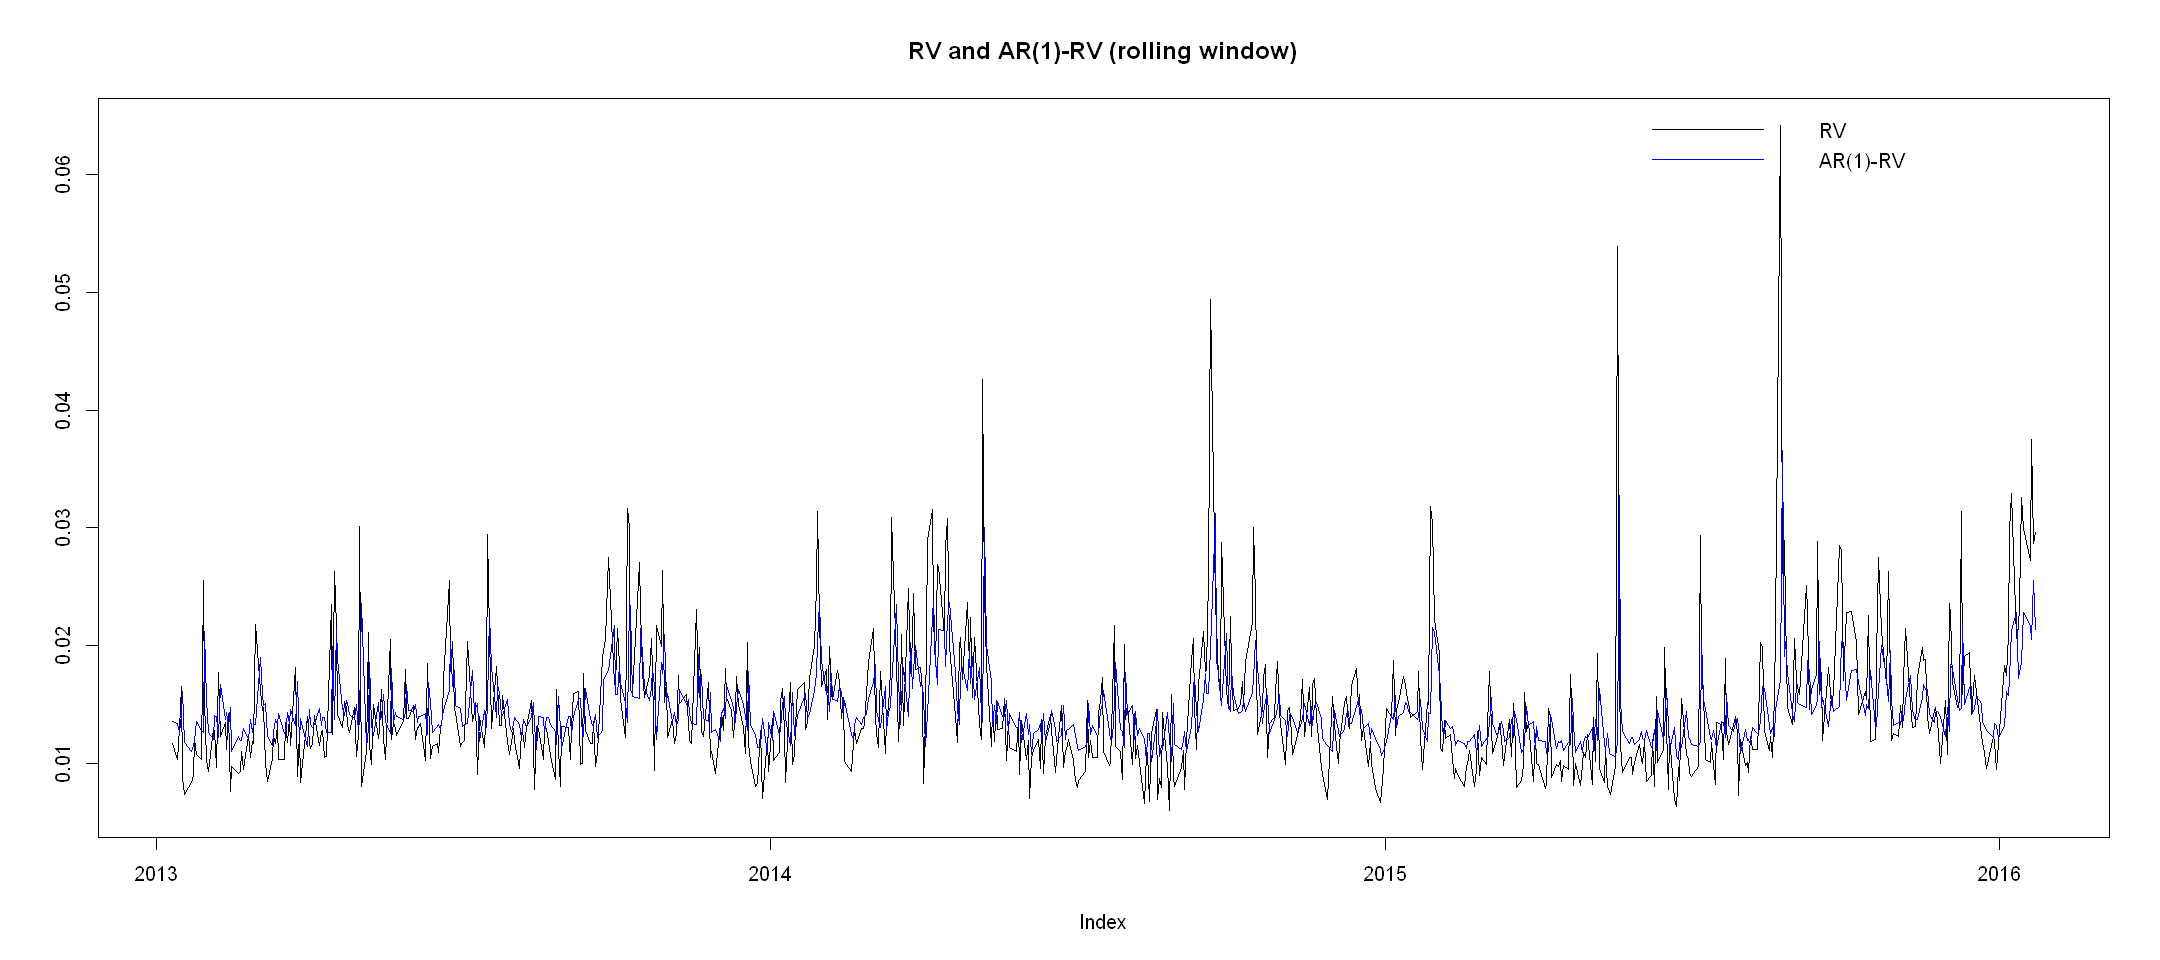

In [42]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and AR(1)-RV (rolling window)")
lines(zoo(AR_RV_rolling_fit), col = "blue", lwd = 1)
legend("topright", legend = c("RV", "AR(1)-RV"), col = c("black", "blue"), lwd = 1, bty = "n")

## HAR (rolling window)

In [43]:
HAR_rolling <- lapply(1:w, function(x) HARmodel(data = aaba$RV[x:(x + window_size - 1)], periods = c(1, 5, 22), RVest = c("rCov"), type = "HAR", h = 1, transform = "sqrt", inputType = "RM"))
HAR_rolling_fit <- unlist(lapply(HAR_rolling, function(x) predict(x))) # Zkusit bez 1
HAR_rolling_fit <- xts(HAR_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

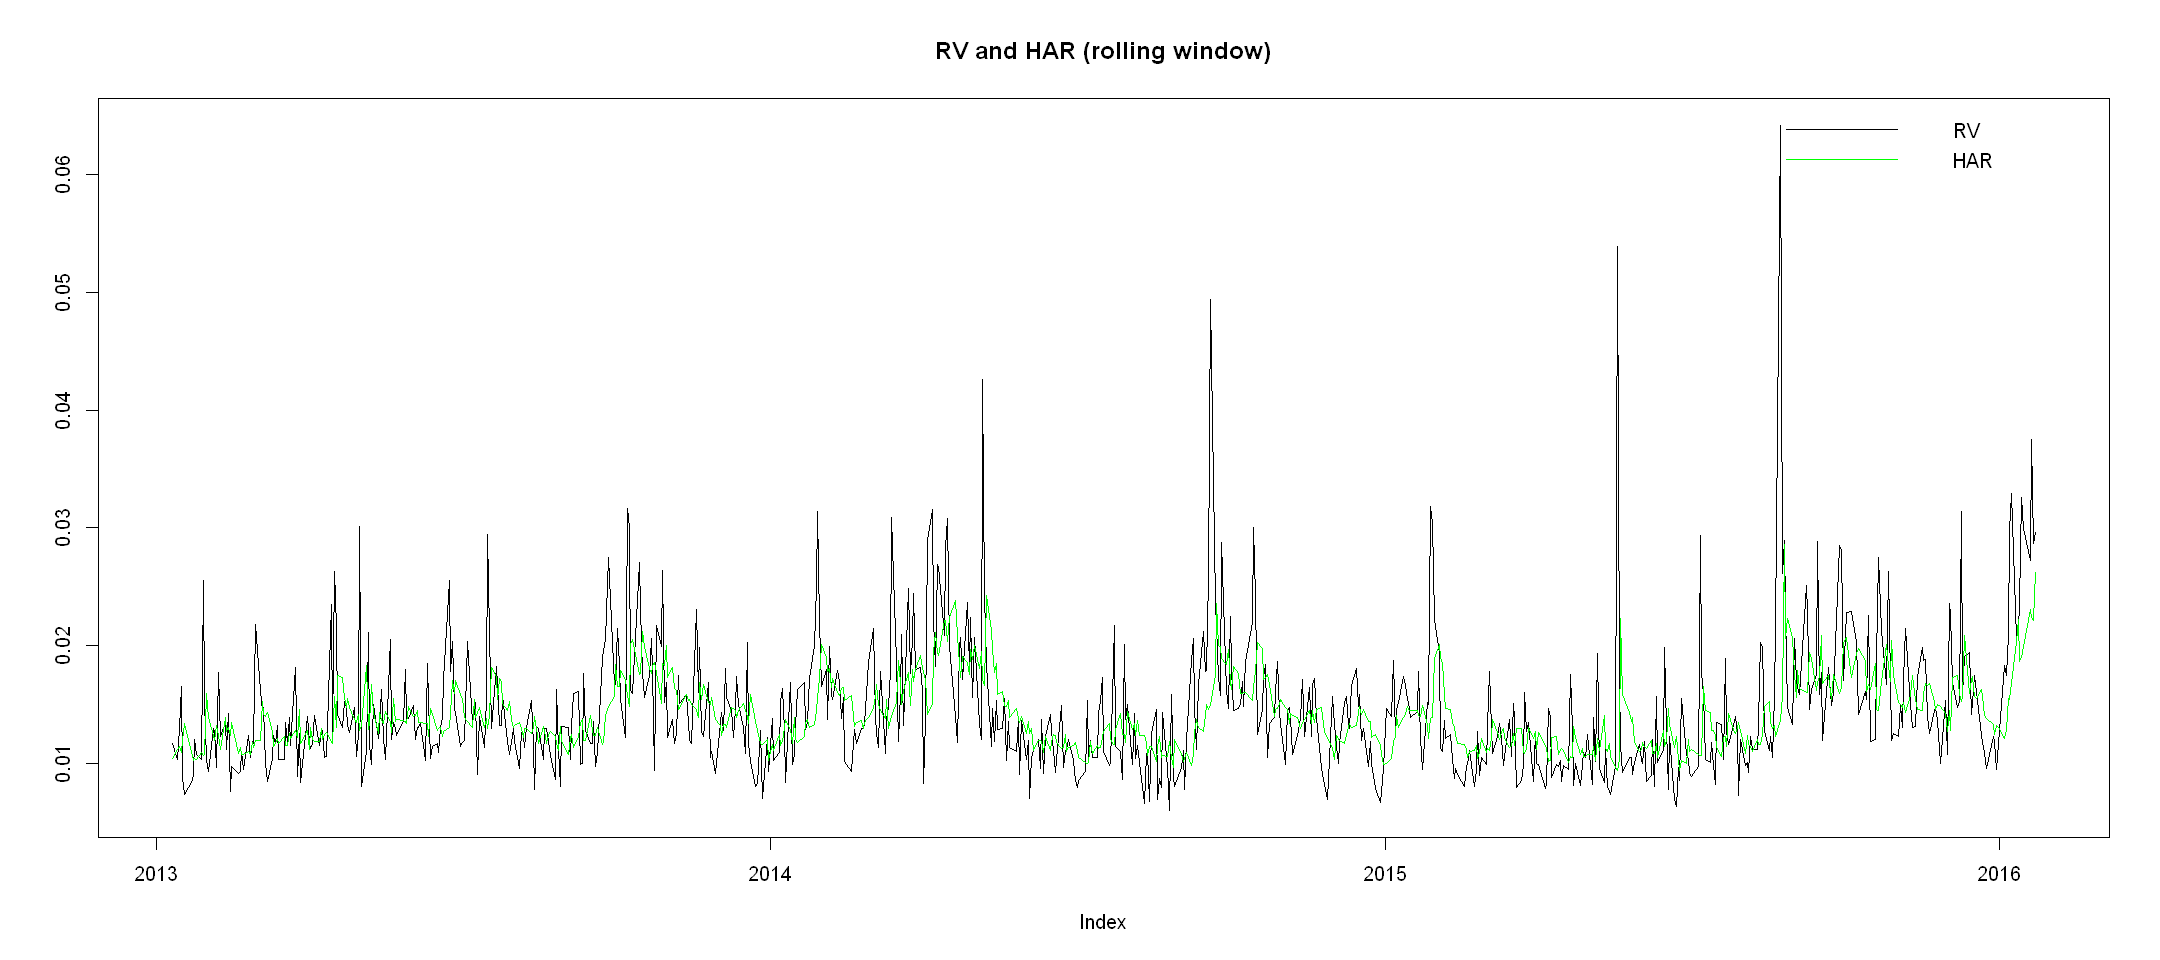

In [44]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and HAR (rolling window)")
lines(zoo(HAR_rolling_fit), col = "green", lwd = 1)
legend("topright", legend = c("RV", "HAR"), col = c("black", "green"), lwd = 1, bty = "n")

## HAR-RS (rolling window)

In [45]:
# Check
HAR_RS_rolling_fit <- vector()
for (i in 1:w) {
  HAR_RS_rolling <- lm(aaba$RV[(i + 22):(i + window_size - 1)] ~ aaba$RV_n[(i + 21):(i + window_size - 2)] + aaba$RV_p[(i + 21):(i + window_size - 2)] + RV5[(i + 17):(i + window_size - 6)] + RV22[i:(i + window_size - 23)])
  HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + window_size - 1], aaba$RV_p[i + window_size - 1], RV5[i + window_size - 5], RV22[i + window_size - 22]))
}
HAR_RS_rolling_fit <- xts(HAR_RS_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_RS_rolling_fit[i] <- predict(HAR_RS_rolling, newdata = data.frame(aaba$RV_n[i + :
"number of items to replace is not a multiple of replacement length"
Warning mess

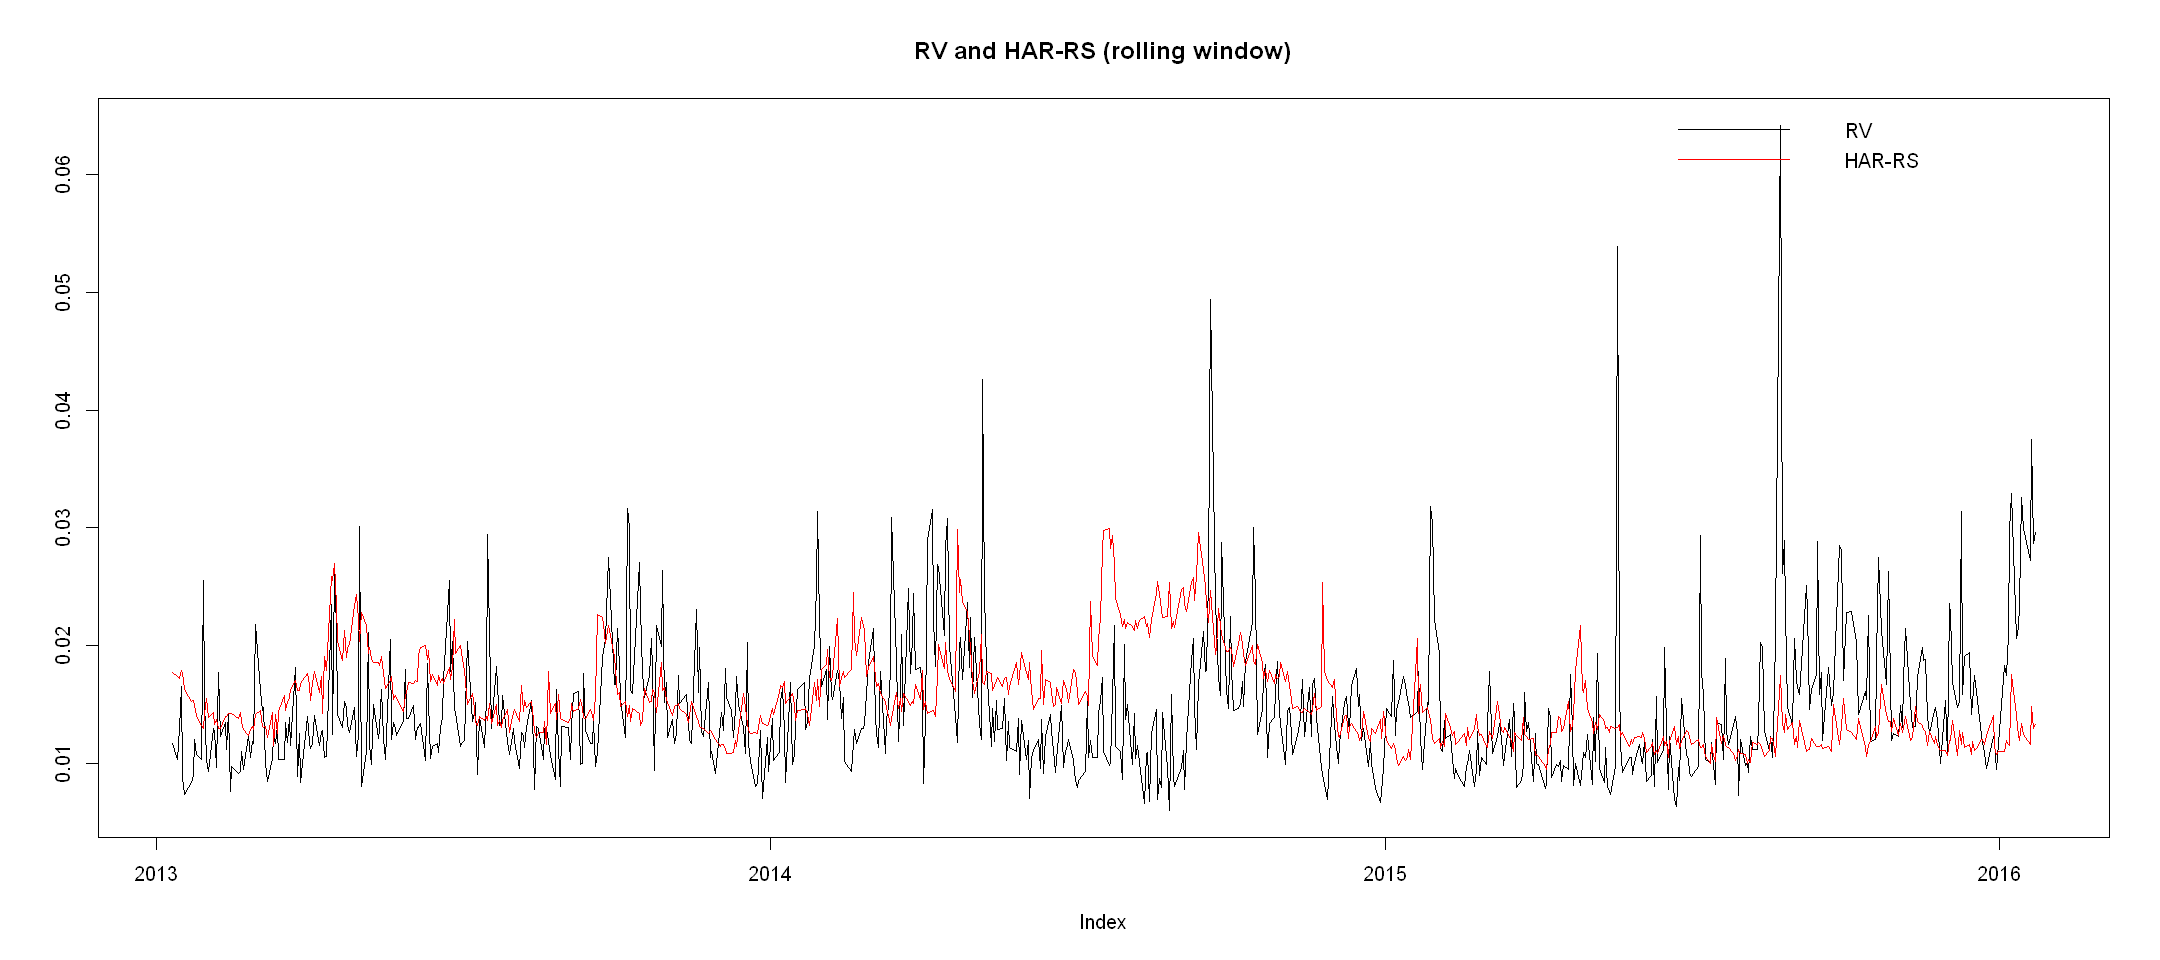

In [46]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and HAR-RS (rolling window)")
lines(zoo(HAR_RS_rolling_fit), col = "red", lwd = 1)
legend("topright", legend = c("RV", "HAR-RS"), col = c("black", "red"), lwd = 1, bty = "n")

## HAR-Rskew-Rkurt (rolling window)

In [47]:
HAR_Rskew_rolling_fit <- vector()
for (i in 1:w) {
  HAR_Rskew_rolling <- lm(aaba$RV[(i + 22):(i + window_size - 1)] ~ aaba$RV[(i + 21):(i + window_size - 2)] + RV5[(i + 17):(i + window_size - 6)] + RV22[i:(i + window_size - 23)] + aaba$RS[(i + 21):(i + window_size - 2)] + aaba$RK[(i + 21):(i + window_size - 2)])
  HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + window_size - 1], RV5[i + window_size - 5], RV22[i + window_size - 22], aaba$RS[i + window_size - 1], aaba$RK[i + window_size - 1]))
}
HAR_Rskew_rolling_fit <- xts(HAR_Rskew_rolling_fit, order.by = index(aaba[(window_size + 1):(window_size + w)]))

Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement length"
Warning message:
"'newdata' had 1 row but variables found have 728 rows"
Warning message in HAR_Rskew_rolling_fit[i] <- predict(HAR_Rskew_rolling, newdata = data.frame(aaba$RV[i + :
"number of items to replace is not a multiple of replacement leng

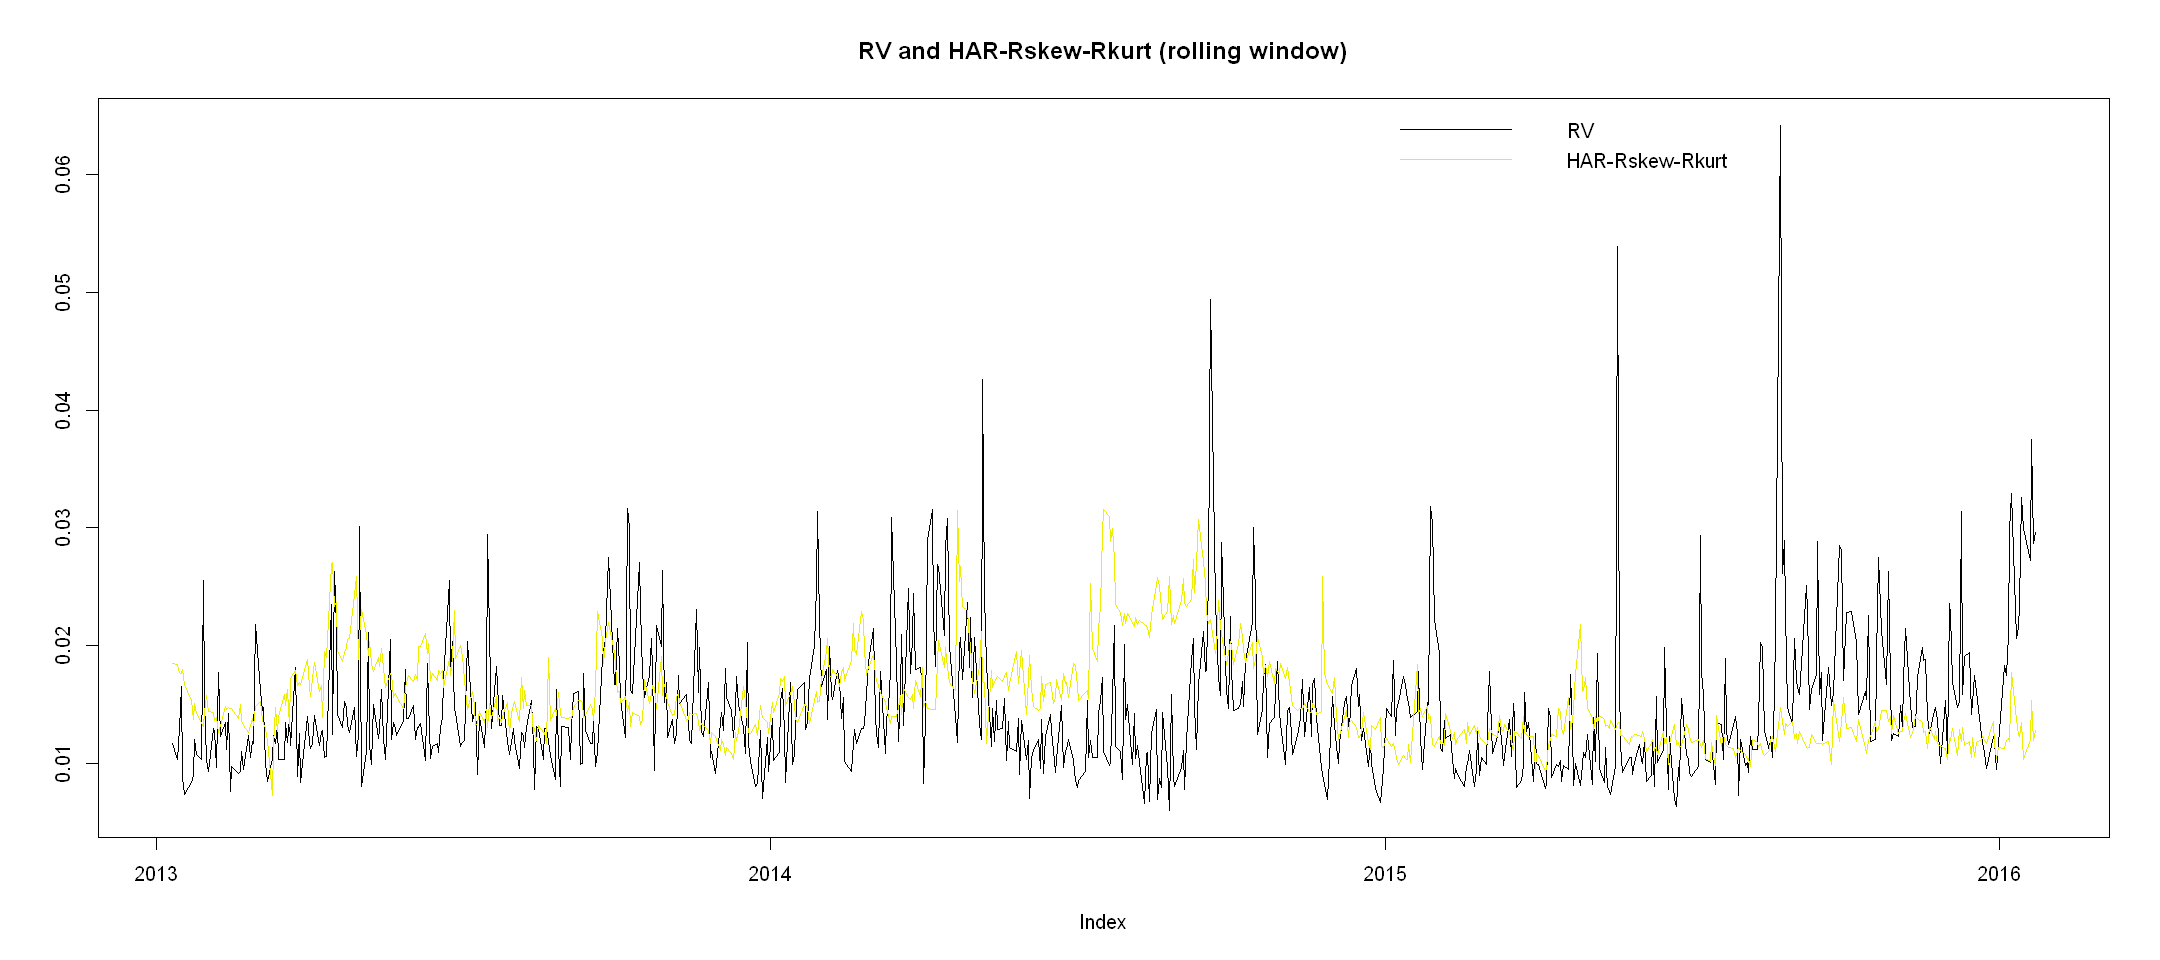

In [48]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and HAR-Rskew-Rkurt (rolling window)")
lines(zoo(HAR_Rskew_rolling_fit), col = "yellow2", lwd = 1)
legend("topright", legend = c("RV", "HAR-Rskew-Rkurt"), col = c("black", "yellow2"), lwd = 1, bty = "n")

## realized GARCH (rolling window)

In [49]:
# Check parametru ze seminare (Seminar 12)
realized_GARCH_rolling <- ugarchroll(realized_GARCH_spec, 100 * aaba$ret, n.ahead = 1, forecast.length = w, refit.every = 1, refit.window = "moving", window.size = window_size, solver = "hybrid", realizedVol = 100 * aaba$RV)
realized_GARCH_rolling_fit <- xts(realized_GARCH_rolling@forecast[["density"]]$Sigma, order.by = index(aaba[(window_size + 1):(window_size + w)])) / 100

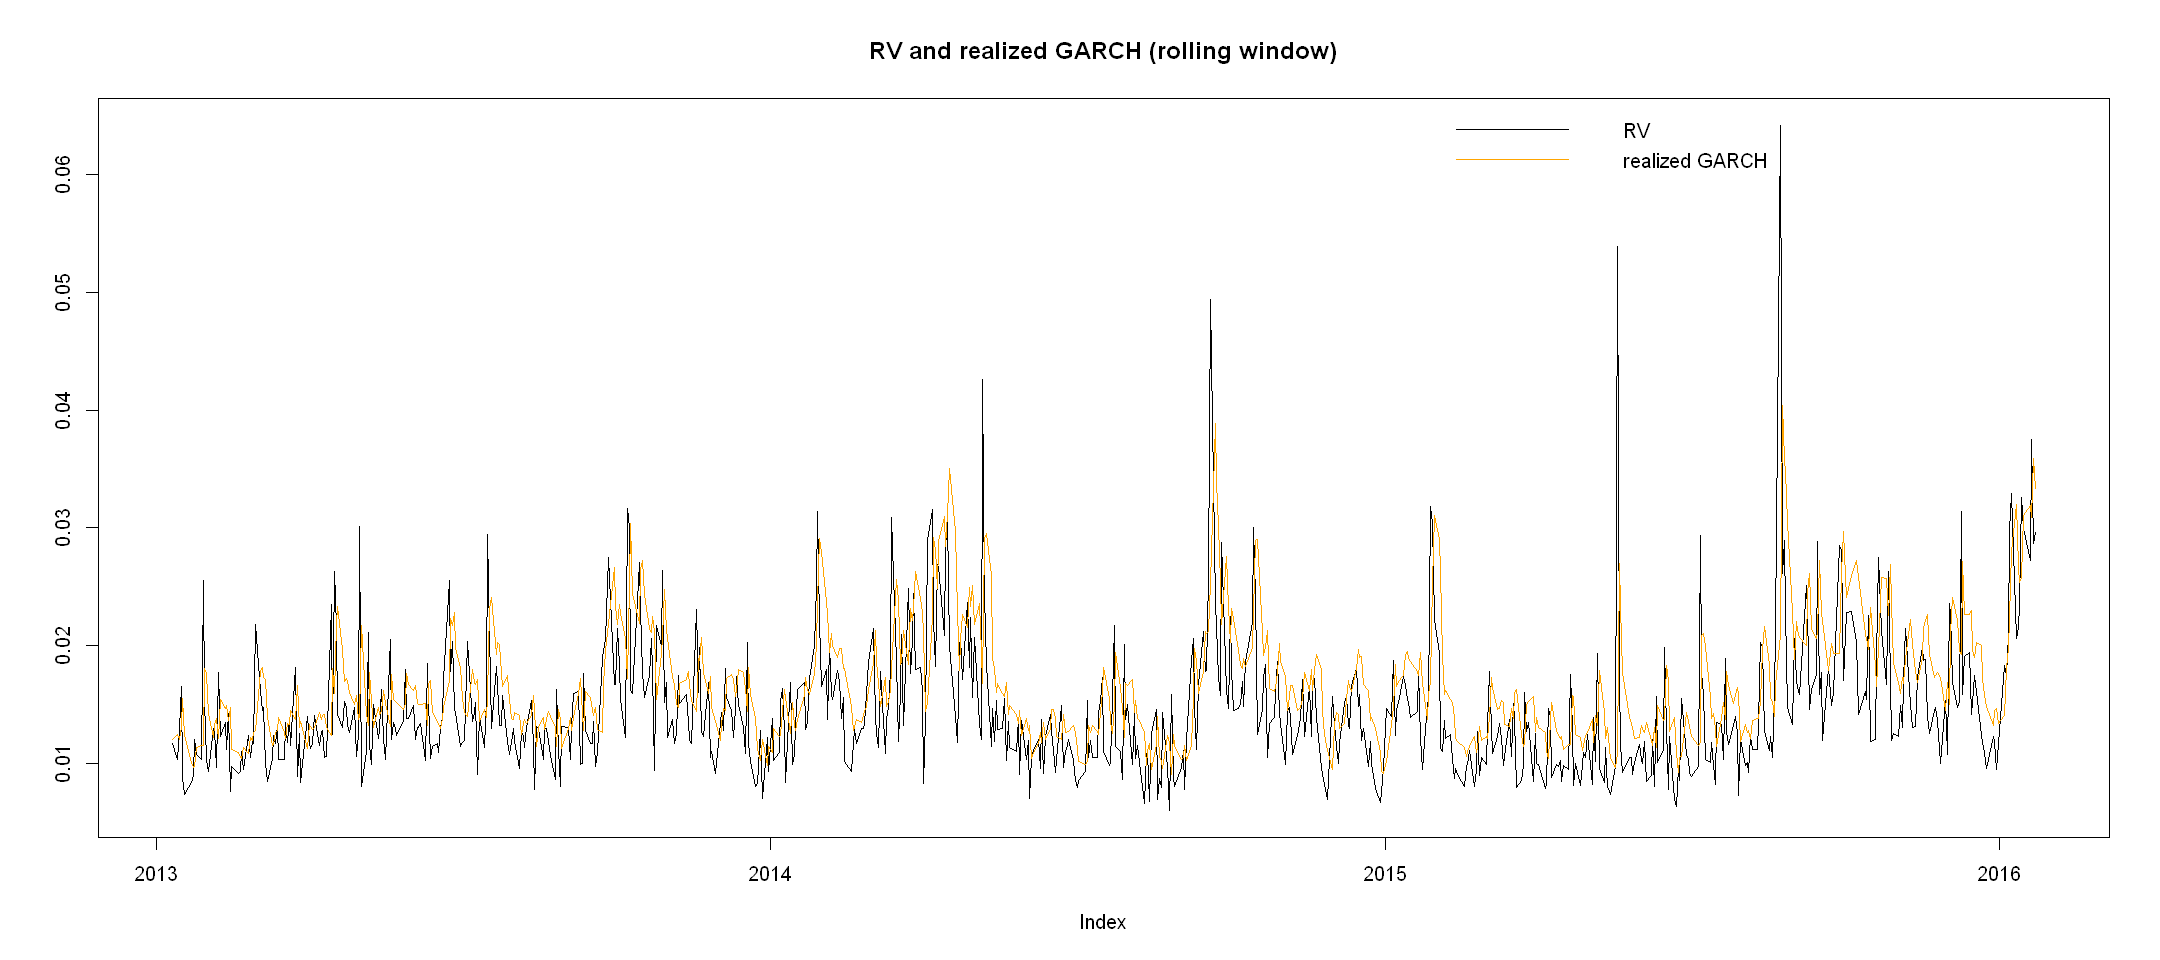

In [50]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and realized GARCH (rolling window)")
lines(zoo(realized_GARCH_rolling_fit), col = "orange", lwd = 1)
legend("topright", legend = c("RV", "realized GARCH"), col = c("black", "orange"), lwd = 1, bty = "n")

## ARMA-GARCH (rolling window)

In [51]:
# Check ze seminar 12
ARMA_GARCH_rolling <- ugarchroll(ARMA_GARCH_spec, 100 * aaba$ret, n.ahead = 1, forecast.length = w, refit.every = 1, refit.window = "moving", window.size = window_size, solver = "hybrid")
ARMA_GARCH_rolling_fit <- xts(ARMA_GARCH_rolling@forecast[["density"]]$Sigma, order.by = index(aaba[(window_size + 1):(window_size + w)])) / 100

Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
"possible convergence problem: optim gave code = 1"
Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mea

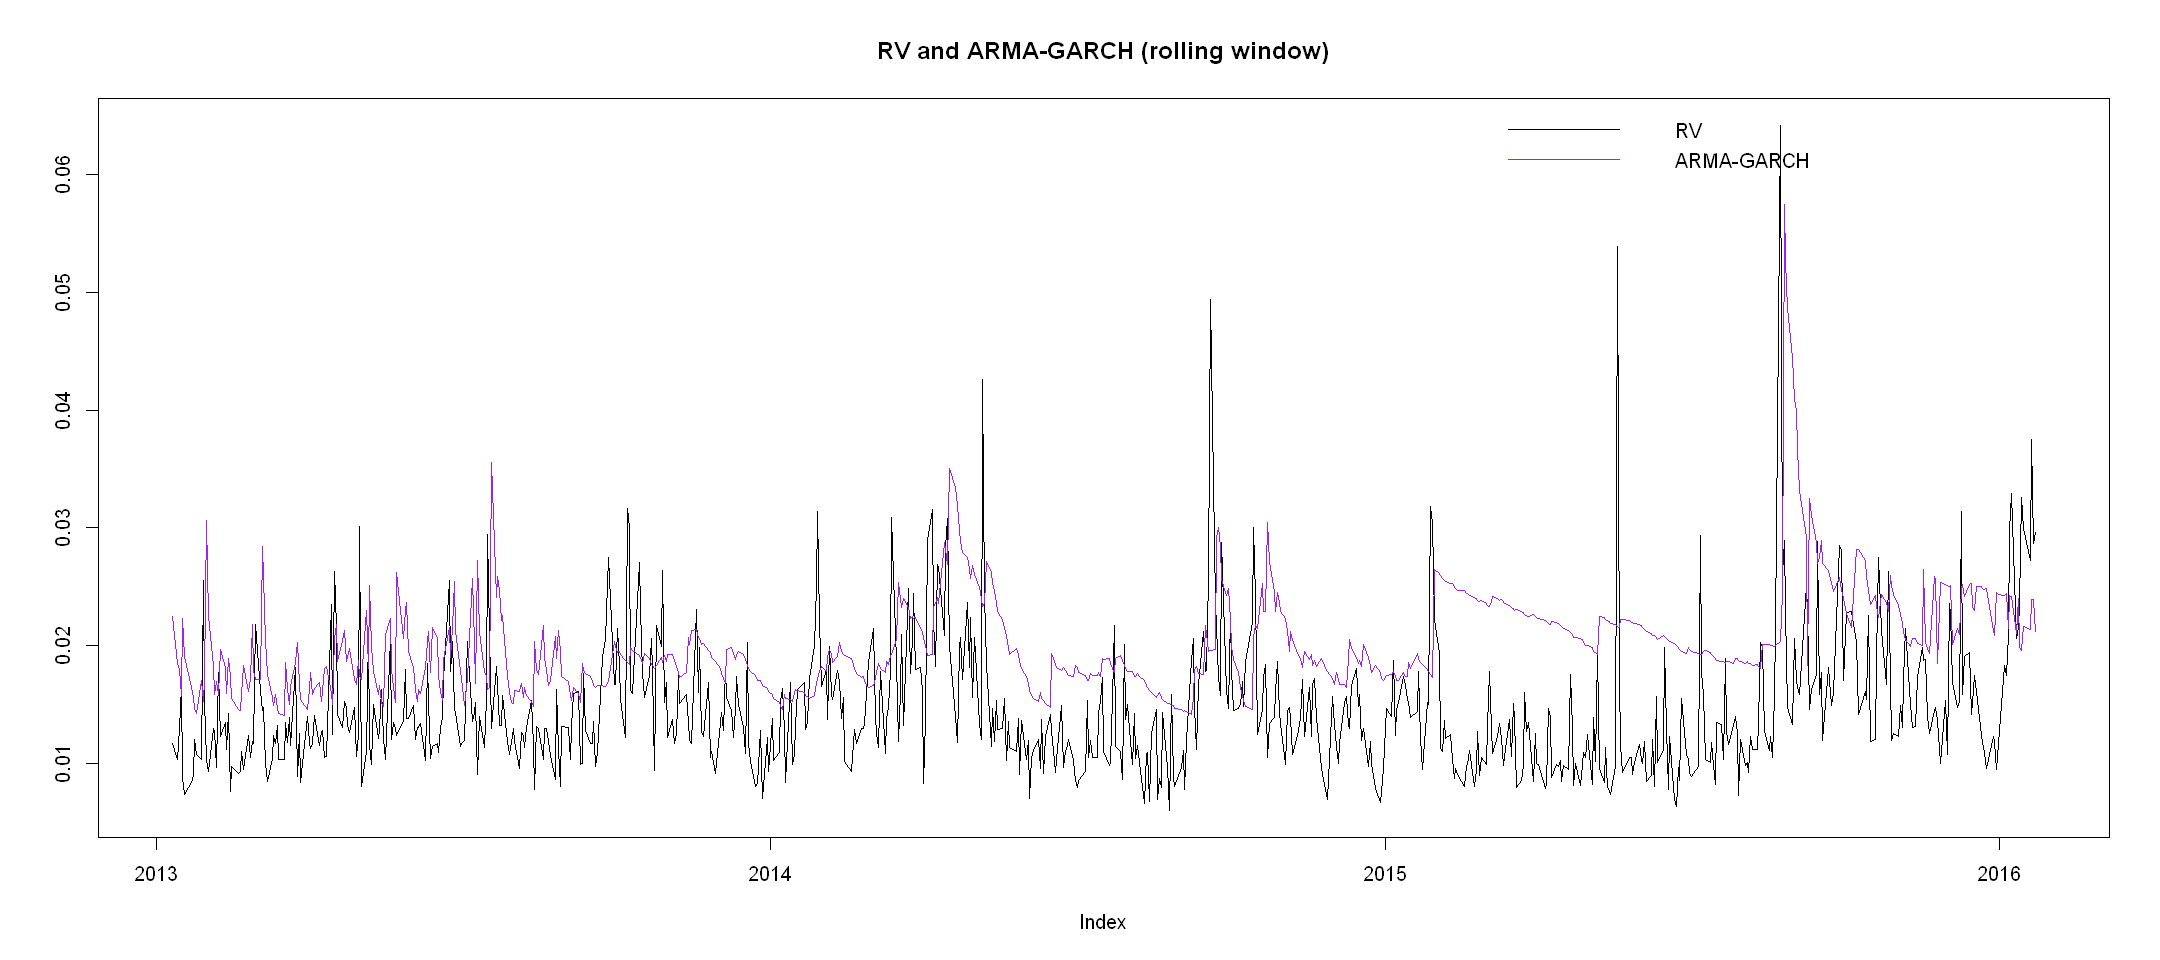

In [52]:
plot.zoo(aaba$RV[(window_size + 1):(window_size + w)], ylab = NA, main = "RV and ARMA-GARCH (rolling window)")
lines(zoo(ARMA_GARCH_rolling_fit), col = "purple", lwd = 1)
legend("topright", legend = c("RV", "ARMA-GARCH"), col = c("black", "purple"), lwd = 1, bty = "n")

### Comparison of errors

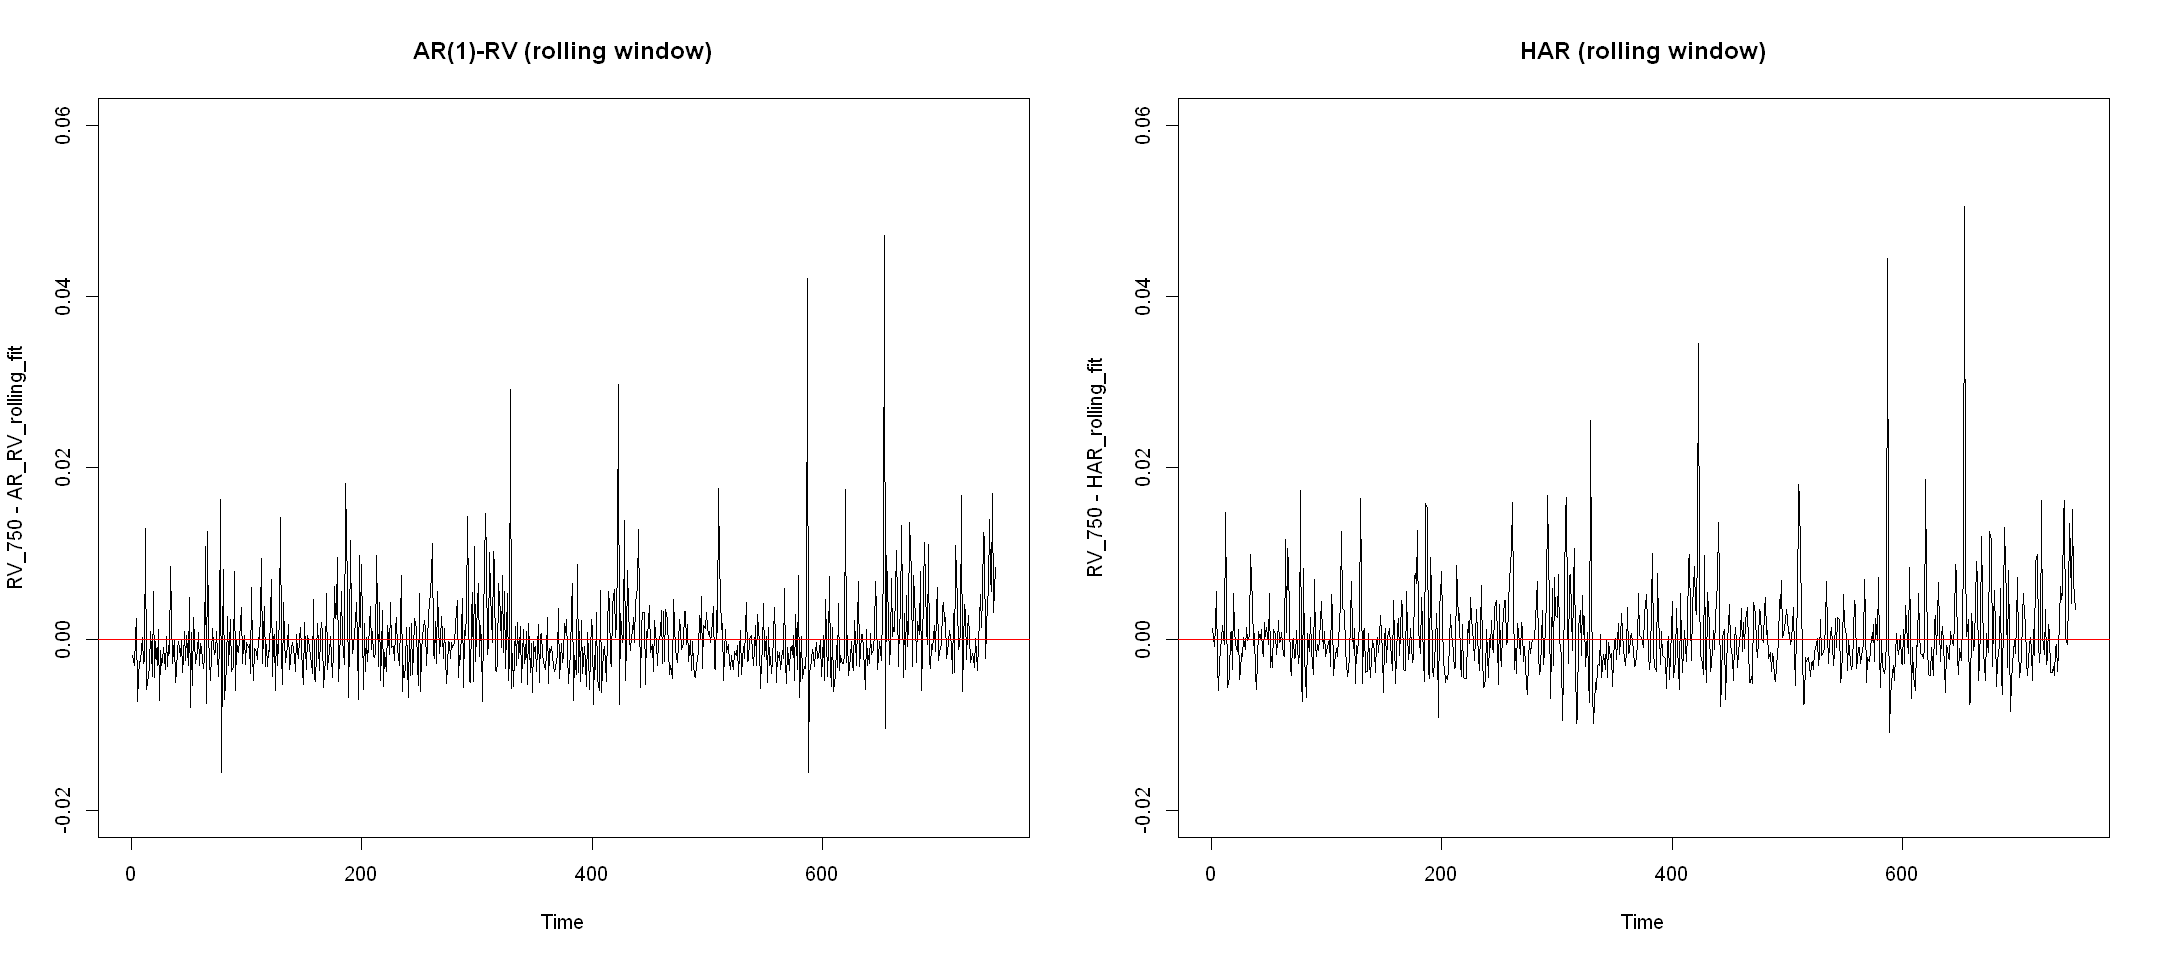

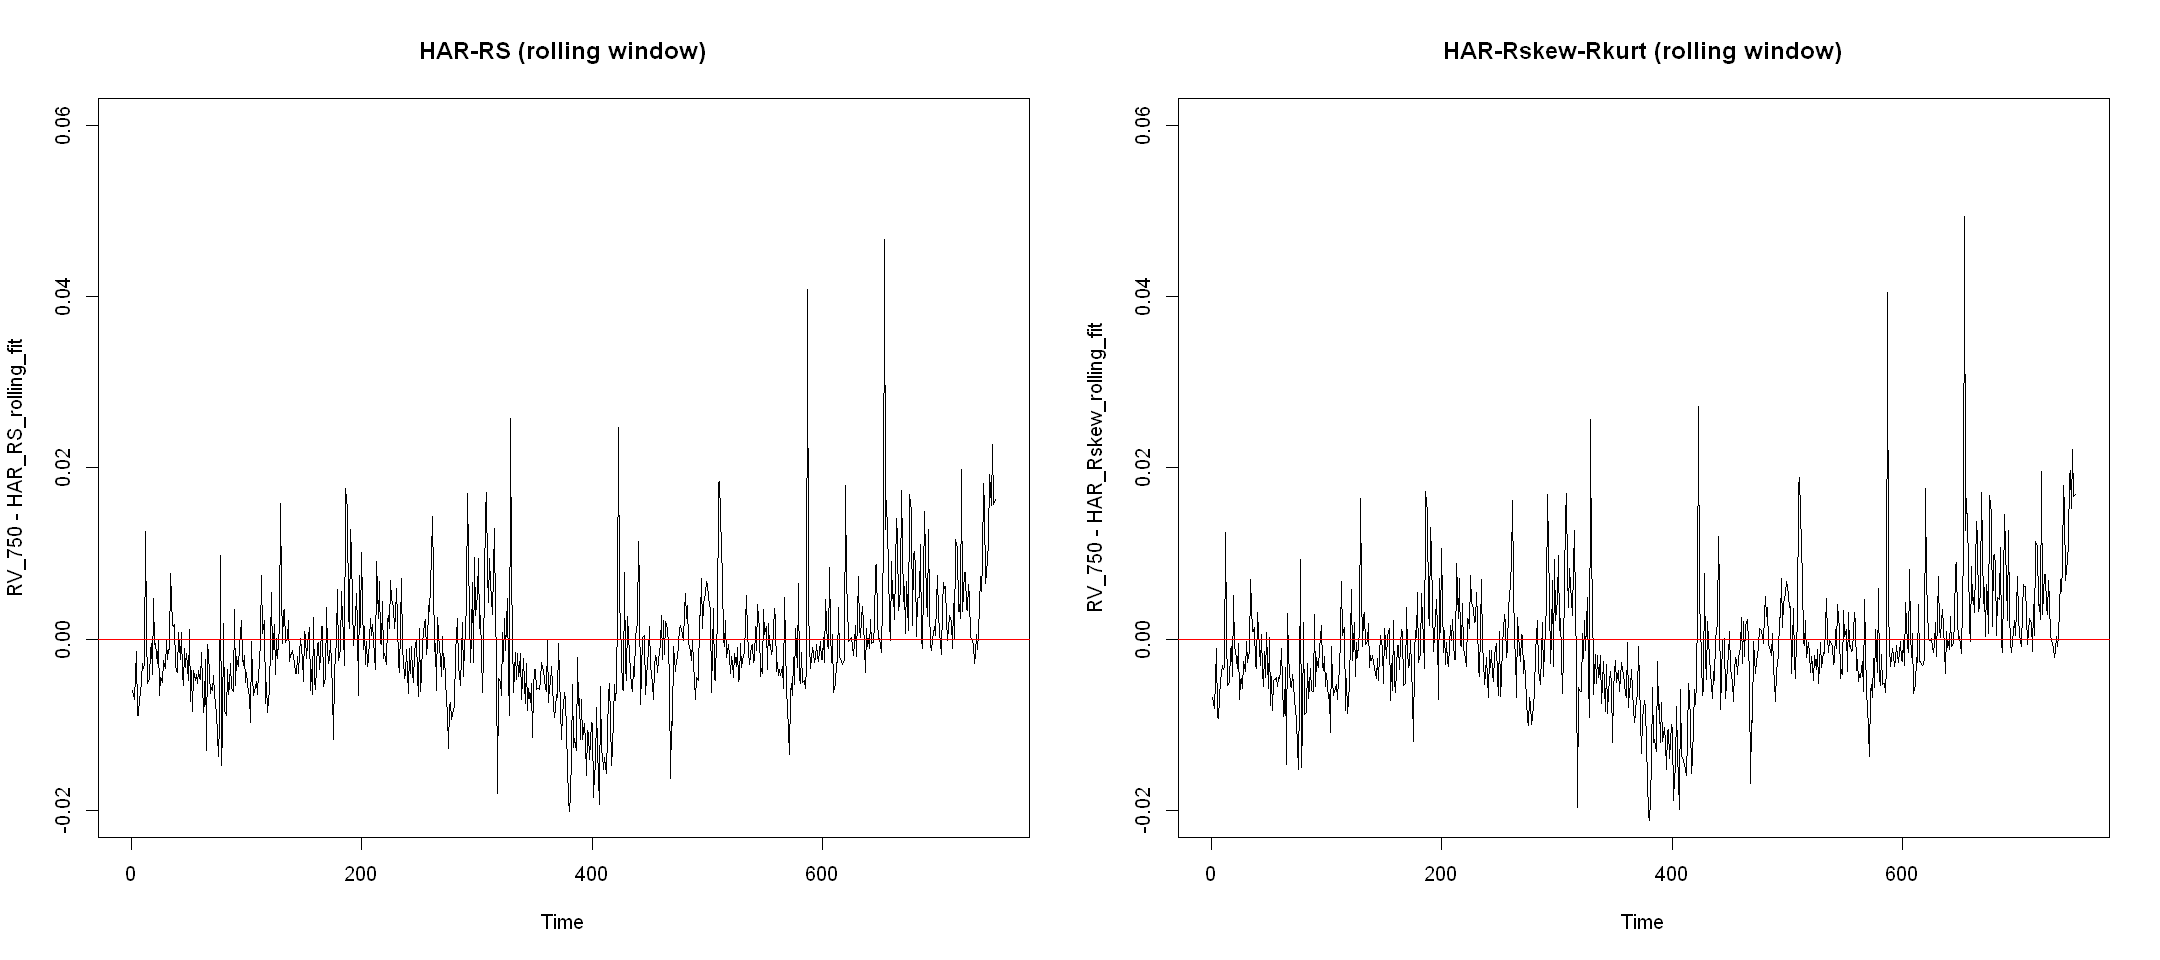

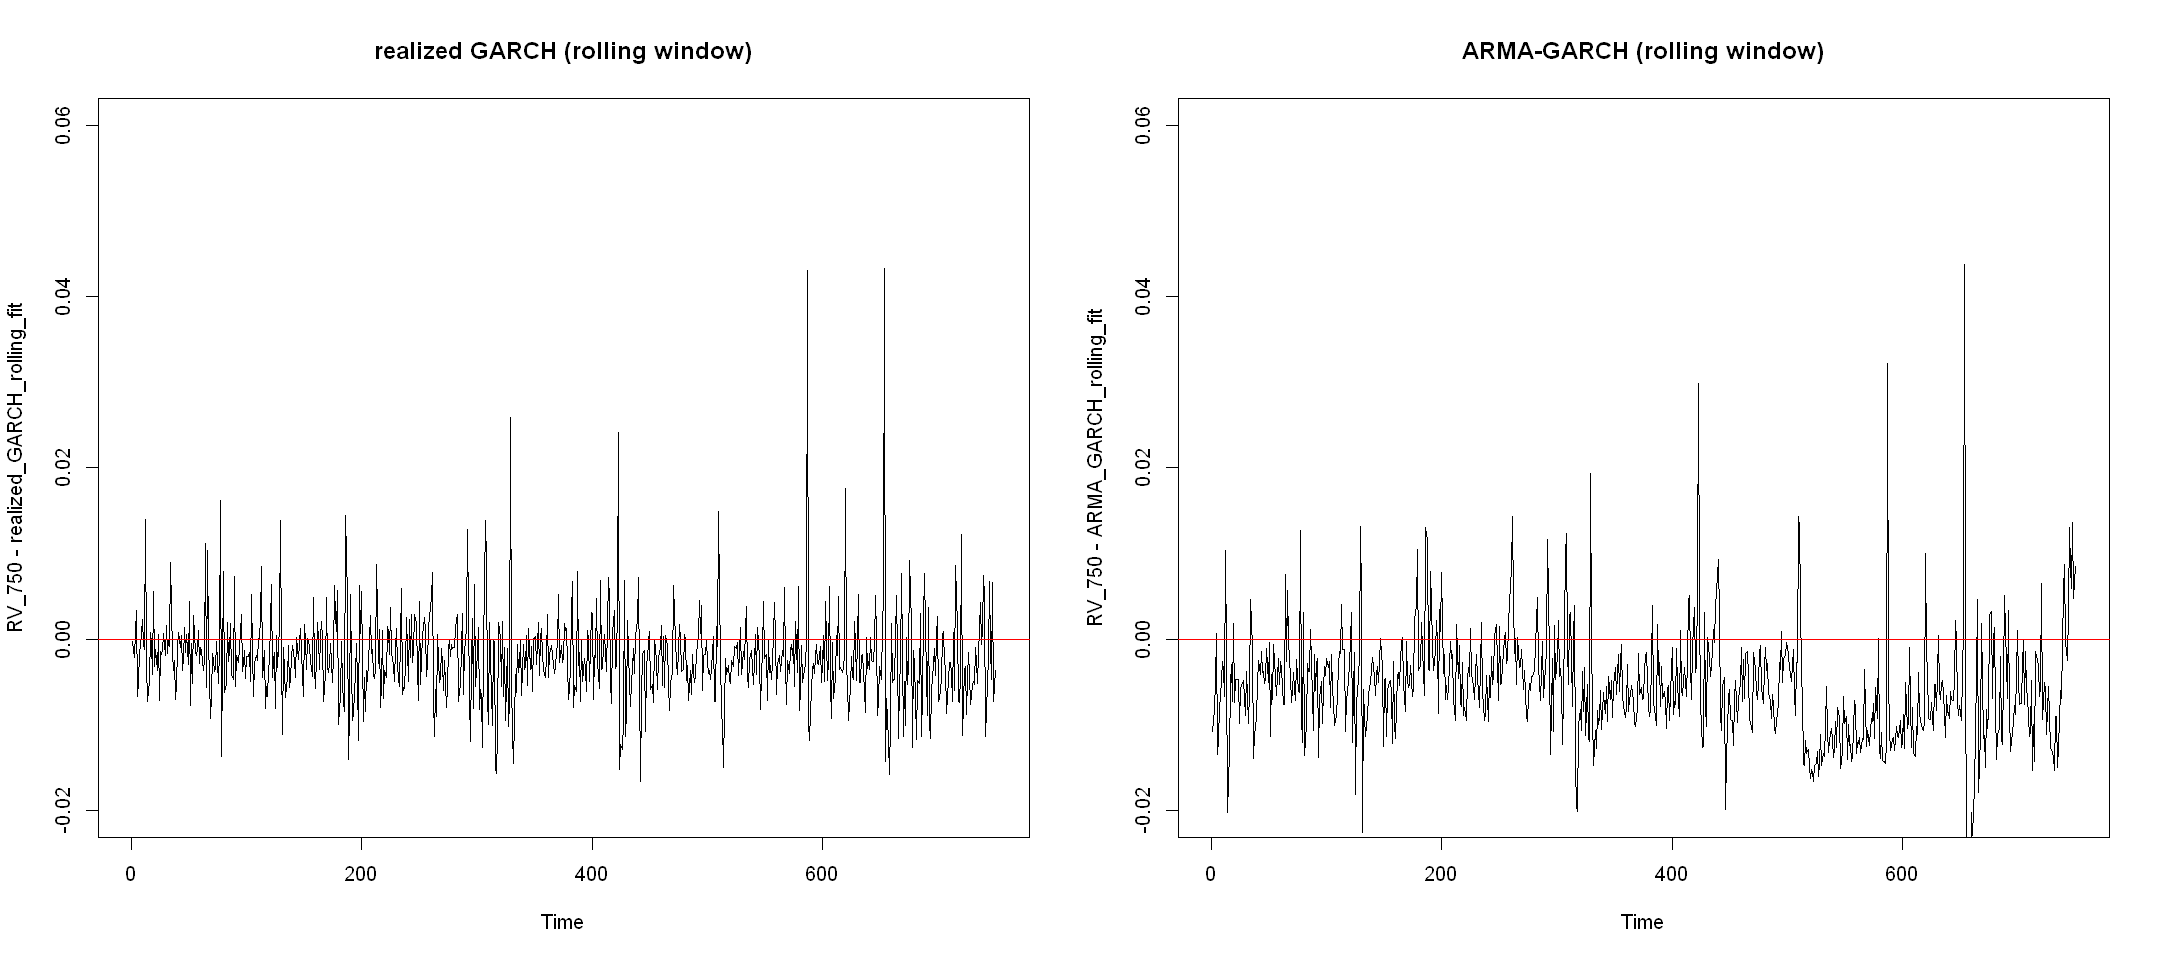

In [82]:
# Setting plot dimensions
options(repr.plot.width = 18, repr.plot.height = 8)
par(mfrow = c(1, 2))

RV_750 <- aaba$RV[(window_size + 1):(window_size + w)]

# AR(1)-RV errors
plot.ts(RV_750 - AR_RV_rolling_fit, ylim = c(-0.02, 0.06), main = "AR(1)-RV (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# HAR errors
plot.ts(RV_750 - HAR_rolling_fit, ylim = c(-0.02, 0.06), main = "HAR (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# HAR-RS errors
plot.ts(RV_750 - HAR_RS_rolling_fit, ylim = c(-0.02, 0.06), main = "HAR-RS (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# HAR-Rskew-Rkurt errors
plot.ts(RV_750 - HAR_Rskew_rolling_fit, ylim = c(-0.02, 0.06), main = "HAR-Rskew-Rkurt (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# realized GARCH errors
plot.ts(RV_750 - realized_GARCH_rolling_fit, ylim = c(-0.02, 0.06), main = "realized GARCH (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

# ARMA-GARCH errors
plot.ts(RV_750 - ARMA_GARCH_rolling_fit, ylim = c(-0.02, 0.06), main = "ARMA-GARCH (rolling window)")
abline(h = 0, col = "red", lwd = 1, lty = 1)

The first model comparison is done by plotting the difference between the true and predicted values. Once the predictions are identical to the actual value, this would imply having a perfect model, there would be only a constant 0 line. Therefore, the higher volatility on the graphs above, the less precise a model is.

On the first impression, AR(1)-RV, HAR and realGARCH seems to be the closest to the red line and thus potentially best for forecasting.  

### MSE & MAE

In [58]:
# MSE function (def Lecture 12, page 4)
MSE_loss <- function(r_vol, forecast) {
  return((r_vol - forecast)^2)
}

# Calculate MSE for each model
MSE_AR_RV_rolling <- MSE_loss(RV_750, AR_RV_rolling_fit)
MSE_HAR_rolling <- MSE_loss(RV_750, HAR_rolling_fit)
MSE_HAR_RS_rolling <- MSE_loss(RV_750, HAR_RS_rolling_fit)
MSE_HAR_Rskew_rolling <- MSE_loss(RV_750, HAR_Rskew_rolling_fit)
MSE_real_GARCH_rolling <- MSE_loss(RV_750, realized_GARCH_rolling_fit)
MSE_ARMA_GARCH_rolling <- MSE_loss(RV_750, ARMA_GARCH_rolling_fit)

# Calculate mean MSE for each model (mean of the MSEs for each forecasted value = time)
MSE_rolling <- c(mean(MSE_AR_RV_rolling), mean(MSE_HAR_rolling), mean(MSE_HAR_RS_rolling), mean(MSE_HAR_Rskew_rolling), mean(MSE_real_GARCH_rolling), mean(MSE_ARMA_GARCH_rolling))

# Data frame with the results
MSE_df <- data.frame(
  Model = c("AR_RV_rolling", "HAR_rolling", "HAR_RS_rolling", "HAR_Rskew_rolling", "real_GARCH_rolling", "ARMA_GARCH_rolling"),
  Mean_MSE = MSE_rolling
)
print(MSE_df)

               Model     Mean_MSE
1      AR_RV_rolling 2.696451e-05
2        HAR_rolling 2.971406e-05
3     HAR_RS_rolling 4.702359e-05
4  HAR_Rskew_rolling 4.876669e-05
5 real_GARCH_rolling 3.446912e-05
6 ARMA_GARCH_rolling 7.550734e-05


The MSE loss function measures the mean squared error between values predicted by our model and true values, therefore, we aim to minizie this metric. 

Comparing our rolling window models in term of MSE, we would choose AR(1)-RV that reveals the lowest MSE and its predictions are thus closest to the targeted true values.    

In [60]:
# MAE function (def Lecture 12, page 4)
MAE_loss <- function(r_vol, forecast) {
  return(abs(r_vol - forecast))
}

# Calculate MAE for each model
MAE_AR_RV_rolling <- MAE_loss(RV_750, AR_RV_rolling_fit)
MAE_HAR_rolling <- MAE_loss(RV_750, HAR_rolling_fit)
MAE_HAR_RS_rolling <- MAE_loss(RV_750, HAR_RS_rolling_fit)
MAE_HAR_Rskew_rolling <- MAE_loss(RV_750, HAR_Rskew_rolling_fit)
MAE_real_GARCH_rolling <- MAE_loss(RV_750, realized_GARCH_rolling_fit)
MAE_ARMA_GARCH_rolling <- MAE_loss(RV_750, ARMA_GARCH_rolling_fit)

# Calculate mean MAE for each model (mean of the MAEs for each forecasted value = time)
MAE_rolling <- c(mean(MAE_AR_RV_rolling), mean(MAE_HAR_rolling), mean(MAE_HAR_RS_rolling), mean(MAE_HAR_Rskew_rolling), mean(MAE_real_GARCH_rolling), mean(MAE_ARMA_GARCH_rolling))

# Data frame with the results
MAE_df <- data.frame(
  Model = c("AR_RV_rolling", "HAR_rolling", "HAR_RS_rolling", "HAR_Rskew_rolling", "real_GARCH_rolling", "ARMA_GARCH_rolling"),
  Mean_MAE = MAE_rolling
)
print(MAE_df)

               Model    Mean_MAE
1      AR_RV_rolling 0.003450700
2        HAR_rolling 0.003540061
3     HAR_RS_rolling 0.004942103
4  HAR_Rskew_rolling 0.005016336
5 real_GARCH_rolling 0.004320490
6 ARMA_GARCH_rolling 0.007147115


Analogically, the lowest MAE metric is obtained by the AR(1)-RV model. Since the loss function is to be minimized, we would prefer this model as it predicts values closest to the true ones.

### Minzer-Zarnowitz regression

In [93]:
# Perform Minzer-Zarnowitz regression for each model (def Lecture 12, page 4)
MZR_RV_AR_rolling <- lm(RV_750 ~ AR_RV_rolling_fit)
summary(MZR_RV_AR_rolling)

MZR_HAR_rolling <- lm(RV_750 ~ HAR_rolling_fit)
summary(MZR_HAR_rolling)

MZR_HAR_RS_rolling <- lm(RV_750 ~ HAR_RS_rolling_fit)
summary(MZR_HAR_RS_rolling)

MZR_HAR_Rskew_rolling <- lm(RV_750 ~ HAR_Rskew_rolling_fit)
summary(MZR_HAR_Rskew_rolling)

MZR_real_GARCH_rolling <- lm(RV_750 ~ realized_GARCH_rolling_fit)
summary(MZR_real_GARCH_rolling)

MZR_ARMA_GARCH_rolling <- lm(RV_750 ~ ARMA_GARCH_rolling_fit)
summary(MZR_ARMA_GARCH_rolling)


Call:
lm(formula = RV_750 ~ AR_RV_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.015298 -0.003115 -0.001052  0.001827  0.047111 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0007786  0.0009648   0.807     0.42    
AR_RV_rolling_fit 0.9548190  0.0652540  14.632   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005197 on 748 degrees of freedom
Multiple R-squared:  0.2225,	Adjusted R-squared:  0.2215 
F-statistic: 214.1 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ HAR_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009797 -0.003087 -0.001042  0.001732  0.049989 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0031698  0.0009873   3.211  0.00138 ** 
HAR_rolling_fit 0.8102362  0.0684516  11.837  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005409 on 748 degrees of freedom
Multiple R-squared:  0.1578,	Adjusted R-squared:  0.1566 
F-statistic: 140.1 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ HAR_RS_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009571 -0.003826 -0.001363  0.002147  0.049347 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.013150   0.000889  14.792   <2e-16 ***
HAR_RS_rolling_fit 0.095654   0.056154   1.703   0.0889 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005882 on 748 degrees of freedom
Multiple R-squared:  0.003864,	Adjusted R-squared:  0.002532 
F-statistic: 2.902 on 1 and 748 DF,  p-value: 0.0889



Call:
lm(formula = RV_750 ~ HAR_Rskew_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009257 -0.003856 -0.001440  0.002124  0.049590 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.013673   0.000875  15.626   <2e-16 ***
HAR_Rskew_rolling_fit 0.061332   0.054921   1.117    0.264    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005889 on 748 degrees of freedom
Multiple R-squared:  0.001664,	Adjusted R-squared:  0.0003298 
F-statistic: 1.247 on 1 and 748 DF,  p-value: 0.2645



Call:
lm(formula = RV_750 ~ realized_GARCH_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009553 -0.003067 -0.001005  0.001675  0.047116 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.0046188  0.0006437   7.176 1.74e-12 ***
realized_GARCH_rolling_fit 0.5957828  0.0367265  16.222  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.005069 on 748 degrees of freedom
Multiple R-squared:  0.2603,	Adjusted R-squared:  0.2593 
F-statistic: 263.2 on 1 and 748 DF,  p-value: < 2.2e-16



Call:
lm(formula = RV_750 ~ ARMA_GARCH_rolling_fit)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008240 -0.003631 -0.001137  0.002075  0.049524 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.0093435  0.0009927   9.413  < 2e-16 ***
ARMA_GARCH_rolling_fit 0.2606902  0.0479236   5.440 7.23e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00578 on 748 degrees of freedom
Multiple R-squared:  0.03805,	Adjusted R-squared:  0.03677 
F-statistic: 29.59 on 1 and 748 DF,  p-value: 7.235e-08


Theoretically, the Mincer-Zarnowitz regression is used to evaluate the quality of forecasts. It involves regressing the actual values of a variable on the forecasted values. Ideally, the intercept should be close to 0 and statistically not significant - if alpha is significantly different from 0, it indicates a systematic bias in the forecasts. On the other hand, the slope should be close to 1 and statistically significant - if beta is significantly different from 1, it suggests that the forecasts are systematically overestimating or underestimating the actual values. Finally, the R-squared value indicates the proportion of variance in the actual values that is explained by the forecasted values - a higher R-squared value indicates a better fit of the forecast to the actual data.

The following table compares the alpha and beta coefficients:

In [94]:
alpha_beta <- data.frame(
  Model = c("AR_RV_rolling", "HAR_rolling", "HAR_RS_rolling", "HAR_Rskew_rolling", "real_GARCH_rolling", "ARMA_GARCH_rolling"),
  Alpha = c(coef(MZR_RV_AR_rolling)[1], coef(MZR_HAR_rolling)[1], coef(MZR_HAR_RS_rolling)[1], coef(MZR_HAR_Rskew_rolling)[1], coef(MZR_real_GARCH_rolling)[1], coef(MZR_ARMA_GARCH_rolling)[1]),
  Beta = c(coef(MZR_RV_AR_rolling)[2], coef(MZR_HAR_rolling)[2], coef(MZR_HAR_RS_rolling)[2], coef(MZR_HAR_Rskew_rolling)[2], coef(MZR_real_GARCH_rolling)[2], coef(MZR_ARMA_GARCH_rolling)[2]),
  R_squared = c(summary(MZR_RV_AR_rolling)$r.squared, summary(MZR_HAR_rolling)$r.squared, summary(MZR_HAR_RS_rolling)$r.squared, summary(MZR_HAR_Rskew_rolling)$r.squared, summary(MZR_real_GARCH_rolling)$r.squared, summary(MZR_ARMA_GARCH_rolling)$r.squared)
)
alpha_beta

,Model,Alpha,Beta,R_squared
,<chr>,<dbl>,<dbl>,<dbl>
AR_RV_rolling_fit,AR_RV_rolling,0.000778595,0.95481898,0.222538460
HAR_rolling_fit,HAR_rolling,0.003169814,0.81023621,0.157757900
HAR_RS_rolling_fit,HAR_RS_rolling,0.013150325,0.09565372,0.003864231
HAR_Rskew_rolling_fit,HAR_Rskew_rolling,0.013672646,0.06133155,0.001664455
realized_GARCH_rolling_fit,real_GARCH_rolling,0.004618807,0.59578279,0.260254054
ARMA_GARCH_rolling_fit,ARMA_GARCH_rolling,0.009343520,0.26069020,0.038054008


Comparing simply the coefficients values, the AR(1)-RV model seems to have the alpha closest to 0 as well as the beta closest to 1. The R^2 suggests that approximately 22.25% of the variance in the actual values is explained by this forecast.

On the other hand, the HAR-RS, HAR-Rskew and ARMA-GARCH models tend to have relatively high alpha as well as very low beta and R^2 suggesting they have relatively poor quality of forecasts.

Exploring the statistical significance of model coefficients in the regressions results above, the only model that reveals alpha coef not being statistically different from zero is, once again, AR(1)-RV. This model is thus the only one without a systematic bias in the predictions.

### Diebold-Mariano test

In [84]:
# Diebold-Mariano test for top 3 models using MSE loss
dm.test(MSE_AR_RV_rolling, MSE_HAR_rolling, alternative = "two.sided")
dm.test(MSE_AR_RV_rolling, MSE_real_GARCH_rolling, alternative = "two.sided")
dm.test(MSE_HAR_rolling, MSE_real_GARCH_rolling, alternative = "two.sided")

# Example of worse model
dm.test(MSE_AR_RV_rolling, MSE_HAR_Rskew_rolling, alternative = "two.sided")


	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_HAR_rolling
DM = -1.5785, Forecast horizon = 1, Loss function power = 2, p-value =
0.1149
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_real_GARCH_rolling
DM = 0.88815, Forecast horizon = 1, Loss function power = 2, p-value =
0.3747
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_HAR_rollingMSE_real_GARCH_rolling
DM = 1.3558, Forecast horizon = 1, Loss function power = 2, p-value =
0.1756
alternative hypothesis: two.sided



	Diebold-Mariano Test

data:  MSE_AR_RV_rollingMSE_HAR_Rskew_rolling
DM = -2.8771, Forecast horizon = 1, Loss function power = 2, p-value =
0.004128
alternative hypothesis: two.sided


For the Diebold-Mariano test, we filtered only the top 3 models coming from the previous tests. This test allows us to compare MSE loss of two forecasting models and rejecting the null hypothesis would imply one model being significantly better that the second one. 

Since all the p-values would fail to reject the null hypothesis, there is no statistically significant difference in the predictive accuracy between our top 3 models.

Other pair-wise combinations could be done analogically. We added the AR(1)-RV vs HAR-Rskew example to demonstrate the null hypothesis being rejected and thus HAR-Rskew being statistically worse in the predictive accuracy than AR(1)-RV.

# PART 4

Comparison of the models -> which one we would choose

Comparison or rolling/expanding scheme -> which one we would choose.